 <h2>Business Understanding</h2>
<p>You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:</p>
<ul>If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company</ul>
<img src="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='img' width="800">


In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud, STOPWORDS
import wordcloud

In [164]:
# PRINTING VERSION OF THE LIBRARIES USED, SO THTA IT WILL BE EASIER TO REPRODUCE THE NOTEBOOK
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Matplotlib version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"Seaborn version : wordcloud {wordcloud.__version__}")

Numpy version : Numpy 1.20.1
Pandas version : Pandas 1.1.4
Matplotlib version : Matplotlib 3.3.3
Seaborn version : Seaborn 0.11.0
Seaborn version : wordcloud 1.8.0


In [3]:
# Setting the pandas to display the maximum column avaliable
pd.set_option('display.max_columns', None)
# Setting the style to the plot which will be plotted using Seaborn
sns.set_style("darkgrid")

In [4]:
data = pd.read_csv('DATASET/loan.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
def detailed(data):
    '''
    returns the complete EDA of the dataset provided, and list of columns who have all values nan
    
    '''
    ddata = pd.DataFrame(index=['total', '% missing' , 'data Type', 'range'])
    to_drop = []
    
    for cols in data.columns:
        size = data[cols].size
        # Finding the number of null present in the column         
        pnul=round(data[cols].isna().sum()/size,2)
        nul_val = f"{pnul*100}% - {data[cols].isna().sum()}/{size}"
        if data[cols].isna().sum() == size:
            to_drop.append(cols)
        # finding the Varibale type of the column
        dtype = 'categorical' if data[cols].dtype == object else 'Numerical' 
        # Findig the range of the Data if numerical else finding the count of different labels        
        rng = f"{len(data[cols].unique())} labels"\
        if dtype == 'categorical' else\
        f"{round(data[cols].min(),2)}-{round(data[cols].max(),2)}"
        ddata[cols] = [size,nul_val,dtype,rng]
    return ddata, to_drop

In [8]:
details,to_drop = detailed(data)

In [9]:
details

id       member_id       loan_amnt     funded_amnt  \
total               39717           39717           39717           39717   
% missing  0.0% - 0/39717  0.0% - 0/39717  0.0% - 0/39717  0.0% - 0/39717   
data Type       Numerical       Numerical       Numerical       Numerical   
range       54734-1077501   70699-1314167       500-35000       500-35000   

          funded_amnt_inv            term        int_rate     installment  \
total               39717           39717           39717           39717   
% missing  0.0% - 0/39717  0.0% - 0/39717  0.0% - 0/39717  0.0% - 0/39717   
data Type       Numerical     categorical     categorical       Numerical   
range         0.0-35000.0        2 labels      371 labels   15.69-1305.19   

                    grade       sub_grade          emp_title  \
total               39717           39717              39717   
% missing  0.0% - 0/39717  0.0% - 0/39717  6.0% - 2459/39717   
data Type     categorical     categorical        categorical   
range            7 labels       35 labels       28821 labels   

                  emp_length  home_ownership        annual_inc  \
total                  39717           39717             39717   
% missing  3.0% - 1075/39717  0.0% - 0/39717    0.0% - 0/39717   
data Type        categorical     categorical         Numerical   
range              12 labels        5 labels  4000.0-6000000.0   

          verification_status         issue_d     loan_status      pymnt_plan  \
total                   39717           39717           39717           39717   
% missing      0.0% - 0/39717  0.0% - 0/39717  0.0% - 0/39717  0.0% - 0/39717   
data Type         categorical     categorical     categorical     categorical   
range                3 labels       55 labels        3 labels        1 labels   

                      url                 desc         purpose  \
total               39717                39717           39717   
% missing  0.0% - 0/39717  33.0% - 12940/39717  0.0% - 0/39717   
data Type     categorical          categorical     categorical   
range        39717 labels         26528 labels       14 labels   

                     title        zip_code      addr_state             dti  \
total                39717           39717           39717           39717   
% missing  0.0% - 11/39717  0.0% - 0/39717  0.0% - 0/39717  0.0% - 0/39717   
data Type      categorical     categorical     categorical       Numerical   
range         19616 labels      823 labels       50 labels       0.0-29.99   

              delinq_2yrs earliest_cr_line  inq_last_6mths  \
total               39717            39717           39717   
% missing  0.0% - 0/39717   0.0% - 0/39717  0.0% - 0/39717   
data Type       Numerical      categorical       Numerical   
range                0-11       526 labels             0-8   

          mths_since_last_delinq mths_since_last_record        open_acc  \
total                      39717                  39717           39717   
% missing    65.0% - 25682/39717    93.0% - 36931/39717  0.0% - 0/39717   
data Type              Numerical              Numerical       Numerical   
range                  0.0-120.0              0.0-129.0            2-44   

                  pub_rec       revol_bal       revol_util       total_acc  \
total               39717           39717            39717           39717   
% missing  0.0% - 0/39717  0.0% - 0/39717  0.0% - 50/39717  0.0% - 0/39717   
data Type       Numerical       Numerical      categorical       Numerical   
range                 0-4        0-149588      1090 labels            2-90   

          initial_list_status       out_prncp   out_prncp_inv     total_pymnt  \
total                   39717           39717           39717           39717   
% missing      0.0% - 0/39717  0.0% - 0/39717  0.0% - 0/39717  0.0% - 0/39717   
data Type         categorical       Numerical       Numerical       Numerical   
range                1 labels     0.0-6311.47     0.0-6307.37    0.0-

#### WITH THE HELP OF THE ABOVE FUNCTION WE WILL GET THE LIST OF ALL THE COLUMNS WHO HAVE ALL VALUES AS NAN, WE WILL JUST DROP THEM AS THEY WON'T CONTRIBUTE IN THE NEXT PROCESS 

In [10]:
data.drop(to_drop, axis=1, inplace=True)

## ANALYSING THE DATA MORE 

In [11]:
count_null = round(100*(data.isnull().sum()/len(data)),2)

In [12]:
# There the columns which have more than 10% missing data so we will be dropping them
count_null[count_null>10]

desc                      32.58
mths_since_last_delinq    64.66
mths_since_last_record    92.99
next_pymnt_d              97.13
dtype: float64

In [13]:
data.drop(count_null[count_null>10].index, axis=1, inplace=True)

### We will drop any columns which have all unique value 

In [14]:
unique_drop = ['id', 'member_id', 'url', 'emp_title', 'zip_code', 'tax_liens' ]

In [15]:
data.drop(unique_drop, axis=1, inplace=True)

### Dropping some more columns as they are not significant and have useless values 

In [16]:
# pymnt_plan: value for entire dataset is 'n'.
# initial_list_status: value for entire dataset is 'f'.
# policy_code: value for entire dataset is '1'
# application_type: thevalue for entire dataset is 'INDIVIDUAL'
# acc_now_delinq: value for entire dataset is '0', therefore can be removed.
# delinq_amnt: value for entire dataset is '0', therefore can be removed.
# collections_12_mths_ex_med: has nan or same value
# chargeoff_within_12_mths: has nan or same values

In [17]:
to_drop = ['pymnt_plan', 'initial_list_status', 'policy_code',
           'application_type','acc_now_delinq', 'delinq_amnt',
          'collections_12_mths_ex_med', 'chargeoff_within_12_mths']

In [18]:
data.drop(to_drop, axis=1, inplace=True)

In [19]:
data.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_re

<h4>We can cleary see that there are still some columns which have null values so we will be dealing with those now</h4> 

In [20]:
data = data[~data.emp_length.isna()]
data = data[~data.title.isna()]
data = data[~data.revol_util.isna()]
data = data[~data.last_pymnt_d.isna()]
data = data[~data.last_credit_pull_d.isna()]
data = data[~data.pub_rec_bankruptcies.isna()]

In [21]:
data.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_rec

#### NOW WE THE WHOLE DATAFRAME WHICH DO NOT HAVE ANY NULL VALUE 

# Pre-Processing and feature Engineering 

In [22]:
clean_details, _ = detailed(data)

In [23]:
clean_details

loan_amnt     funded_amnt funded_amnt_inv            term  \
total               37825           37825           37825           37825   
% missing  0.0% - 0/37825  0.0% - 0/37825  0.0% - 0/37825  0.0% - 0/37825   
data Type       Numerical       Numerical       Numerical     categorical   
range           500-35000       500-35000     0.0-35000.0        2 labels   

                 int_rate     installment           grade       sub_grade  \
total               37825           37825           37825           37825   
% missing  0.0% - 0/37825  0.0% - 0/37825  0.0% - 0/37825  0.0% - 0/37825   
data Type     categorical       Numerical     categorical     categorical   
range          337 labels   16.08-1305.19        7 labels       35 labels   

               emp_length  home_ownership        annual_inc  \
total               37825           37825             37825   
% missing  0.0% - 0/37825  0.0% - 0/37825    0.0% - 0/37825   
data Type     categorical     categorical         Numerical   
range           11 labels        4 labels  4000.0-6000000.0   

          verification_status         issue_d     loan_status         purpose  \
total                   37825           37825           37825           37825   
% missing      0.0% - 0/37825  0.0% - 0/37825  0.0% - 0/37825  0.0% - 0/37825   
data Type         categorical     categorical     categorical     categorical   
range                3 labels       52 labels        3 labels       14 labels   

                    title      addr_state             dti     delinq_2yrs  \
total               37825           37825           37825           37825   
% missing  0.0% - 0/37825  0.0% - 0/37825  0.0% - 0/37825  0.0% - 0/37825   
data Type     categorical     categorical       Numerical       Numerical   
range        18677 labels       49 labels       0.0-29.99            0-11   

          earliest_cr_line  inq_last_6mths        open_acc         pub_rec  \
total                37825           37825           37825           37825   
% missing   0.0% - 0/37825  0.0% - 0/37825  0.0% - 0/37825  0.0% - 0/37825   
data Type      categorical       Numerical       Numerical       Numerical   
range           514 labels             0-8            2-44             0-4   

                revol_bal      revol_util       total_acc       out_prncp  \
total               37825           37825           37825           37825   
% missing  0.0% - 0/37825  0.0% - 0/37825  0.0% - 0/37825  0.0% - 0/37825   
data Type       Numerical     categorical       Numerical       Numerical   
range            0-149588     1087 labels            2-90     0.0-6311.47   

            out_prncp_inv     total_pymnt total_pymnt_inv total_rec_prncp  \
total               37825           37825           37825           37825   
% missing  0.0% - 0/37825  0.0% - 0/37825  0.0% - 0/37825  0.0% - 0/37825   
data Type       Numerical       Numerical       Numerical       Numerical   
range         0.0-6307.37  33.73-58563.68    0.0-58563.68    0.0-35000.02   

            total_rec_int total_rec_late_fee      recoveries  \
total               37825              37825           37825   
% missing  0.0% - 0/37825     0.0% - 0/37825  0.0% - 0/37825   
data Type       Numerical          Numerical       Numerical   
range       6.22-23563.68          0.0-180.2    0.0-29623.35   

          collection_recovery_fee    last_pymnt_d last_pymnt_amnt  \
total                       37825           37825           37825   
% missing          0.0% - 0/37825  0.0% - 0/37825  0.0% - 0/37825   
data Type               Numerical     categorical       Numerical   
range                 0.0-7002.19       97 labels    0.01-36115.2   

          last_credit_pull_d pub_rec_bankruptcies  
total                  37825                37825  
% missing     0.0% - 0/37825       0.0% - 0/37825  
data Type        categorical            Numerical  
range              97 labels              0.0-2.0

In [24]:
data.describe()

loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  37825.000000  37825.000000     37825.000000  37825.000000   
mean   11328.779907  11050.900198     10618.933508    327.159748   
std     7477.278024   7205.116525      7113.288445    209.098068   
min      500.000000    500.000000         0.000000     16.080000   
25%     5600.000000   5500.000000      5000.000000    168.740000   
50%    10000.000000  10000.000000      9200.000000    283.200000   
75%    15000.000000  15000.000000     14608.709790    434.750000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti   delinq_2yrs  inq_last_6mths      open_acc  \
count  3.782500e+04  37825.000000  37825.000000    37825.000000  37825.000000   
mean   6.967560e+04     13.377813      0.145803        0.866728      9.325235   
std    6.365015e+04      6.655779      0.490522        1.066541      4.375127   
min    4.000000e+03      0.000000      0.000000        0.000000      2.000000   
25%    4.190000e+04      8.270000      0.000000        0.000000      6.000000   
50%    6.000000e+04     13.470000      0.000000        1.000000      9.000000   
75%    8.350000e+04     18.630000      0.000000        1.000000     12.000000   
max    6.000000e+06     29.990000     11.000000        8.000000     44.000000   

            pub_rec      revol_bal     total_acc     out_prncp  out_prncp_inv  \
count  37825.000000   37825.000000  37825.000000  37825.000000   37825.000000   
mean       0.053721   13482.271408     22.200317     52.335744      52.086627   
std        0.234775   15878.604047     11.382984    380.568286     379.177129   
min        0.000000       0.000000      2.000000      0.000000       0.000000   
25%        0.000000    3792.000000     14.000000      0.000000       0.000000   
50%        0.000000    8979.000000     21.000000      0.000000       0.000000   
75%        0.000000   17186.000000     29.000000      0.000000       0.000000   
max        4.000000  149588.000000     90.000000   6311.470000    6307.370000   

        total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  37825.000000     37825.000000     37825.000000   37825.000000   
mean   12311.524402     11841.635927      9913.439277    2302.172673   
std     9083.414899      8947.177493      7089.585227    2633.713963   
min       33.730000         0.000000         0.000000       6.220000   
25%     5647.319201      5387.750000      4800.000000     677.120000   
50%    10074.700000      9611.840000      8002.290000    1376.350000   
75%    16717.654240     16108.820000     14000.000000    2889.120000   
max    58563.679930     58563.680000     35000.020000   23563.680000   

       total_rec_late_fee    recoveries  collection_recovery_fee  \
count        37825.000000  37825.000000             37825.000000   
mean             1.334818     94.577719                12.136395   
std              7.179826    690.467641               148.128622   
min              0.000000      0.000000                 0.000000   
25%              0.000000      0.000000                 0.000000   
50%              0.000000      0.000000                 0.000000   
75%              0.000000      0.000000                 0.000000   
max            180.200000  29623.350000              7002.190000   

       last_pymnt_amnt  pub_rec_bankruptcies  
count     37825.000000          37825.000000  
mean       2730.904205              0.041507  
std        4489.990231              0.200388  
min           0.010000              0.000000  
25%         224.800000              0.000000  
50%         563.550000              0.000000  
75%        3402.610000              0.000000  
max       36115.200000              2.000000

In [25]:
data.total_pymnt.value_counts()

11196.569430    26
11784.232230    16
13148.137860    15
10956.775960    13
5478.387981     13
                ..
6287.825330      1
18142.153220     1
24977.641460     1
4862.387408      1
4608.000000      1
Name: total_pymnt, Length: 36098, dtype: int64

In [26]:
data.total_rec_late_fee.value_counts()

0.000000     35905
15.000000      235
30.000000       53
15.000000       53
15.000000       42
             ...  
44.840000        1
29.914662        1
23.820000        1
29.908825        1
24.507143        1
Name: total_rec_late_fee, Length: 1274, dtype: int64

In [27]:
data.total_pymnt_inv.value_counts()

0.00        146
6514.52      14
13148.14     14
5478.39      12
6717.95      12
           ... 
7618.35       1
18511.97      1
25433.98      1
17678.14      1
4608.00       1
Name: total_pymnt_inv, Length: 35790, dtype: int64

In [28]:
data.collection_recovery_fee.value_counts()

0.0000      34304
2.0000         11
1.2000         10
3.7100          9
2.0200          8
            ...  
4.4077          1
69.8600         1
101.6400        1
4.6093          1
250.6104        1
Name: collection_recovery_fee, Length: 2488, dtype: int64

### We can see that some columns can be rounded off so that the information becomes more visible
##### total_pymnt, collection_recovery_fee, total_rec_late_fee will be rounded off

In [29]:
data.total_pymnt= round(data.total_pymnt,2)
data.total_rec_late_fee= round(data.total_rec_late_fee,2)
data.collection_recovery_fee= round(data.collection_recovery_fee,2)

## Now let's check that if the data types are correct or not 

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37825 entries, 0 to 39680
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37825 non-null  int64  
 1   funded_amnt              37825 non-null  int64  
 2   funded_amnt_inv          37825 non-null  float64
 3   term                     37825 non-null  object 
 4   int_rate                 37825 non-null  object 
 5   installment              37825 non-null  float64
 6   grade                    37825 non-null  object 
 7   sub_grade                37825 non-null  object 
 8   emp_length               37825 non-null  object 
 9   home_ownership           37825 non-null  object 
 10  annual_inc               37825 non-null  float64
 11  verification_status      37825 non-null  object 
 12  issue_d                  37825 non-null  object 
 13  loan_status              37825 non-null  object 
 14  purpose               

In [31]:
data.head(5)

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   
3     C        C1  10+ years           RENT     49200.0     Source Verified   
4     B        B5     1 year           RENT     80000.0     Source Verified   

  issue_d  loan_status         purpose                 title addr_state  \
0  Dec-11   Fully Paid     credit_card              Computer         AZ   
1  Dec-11  Charged Off             car                  bike         GA   
2  Dec-11   Fully Paid  small_business  real estate business         IL   
3  Dec-11   Fully Paid           other              personel         CA   
4  Dec-11      Current           other              Personal         OR   

     dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
0  27.65            0           Jan-85               1         3        0   
1   1.00            0           Apr-99               5         3        0   
2   8.72            0           Nov-01               2         2        0   
3  20.00            0           Feb-96               1        10        0   
4  17.94            0           Jan-96               0        15        0   

   revol_bal revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
0      13648     83.70%          9       0.00           0.00      5863.16   
1       1687      9.40%          4       0.00           0.00      1008.71   
2       2956     98.50%         10       0.00           0.00      3005.67   
3       5598        21%         37       0.00           0.00     12231.89   
4      27783     53.90%         38     524.06         524.06      3513.33   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00       Jan-15           171.62   
1      117.08                     1.11       Apr-13           119.66   
2        0.00                     0.00       Jun-14           649.91   
3        0.00                     0.00       Jan-15           357.48   
4        0.00                     0.00       May-16            67.79   

  last_credit_pull_d  pub_rec_bankruptcies  
0             May-16                   0.0  
1             Sep-13                   0.0  
2             May-16                   0.0  
3             Apr-16                   0.0  
4             May-16                   0.0

#### We can see that some of the columns have incorrect date format 

In [32]:
data.issue_d = pd.to_datetime(data.issue_d, format='%b-%y')
data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data.last_pymnt_d = pd.to_datetime(data.last_pymnt_d, format='%b-%y')
data.last_credit_pull_d = pd.to_datetime(data.last_credit_pull_d, format='%b-%y')

In [33]:
data[['issue_d','earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37825 entries, 0 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             37825 non-null  datetime64[ns]
 1   earliest_cr_line    37825 non-null  datetime64[ns]
 2   last_pymnt_d        37825 non-null  datetime64[ns]
 3   last_credit_pull_d  37825 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


### Fixing some columns which have alphanumeric values  

In [34]:
percent_remover = lambda x: x.split("%")[0]

In [35]:
data.int_rate = data.int_rate.apply(percent_remover).astype(float)
data.revol_util = data.revol_util.apply(percent_remover).astype(float)

#### Mapping the emp_length_dict 

In [36]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [37]:
data.emp_length=data.emp_length.map(emp_length_dict)

<AxesSubplot:>

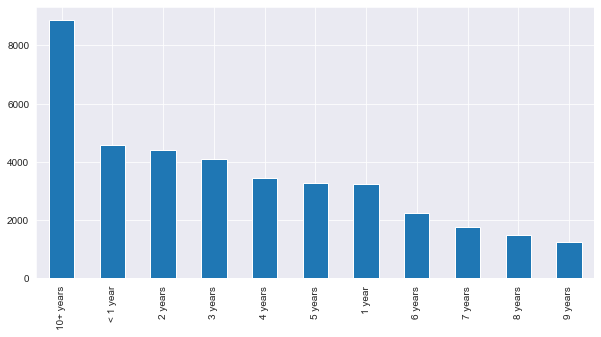

In [155]:
plt.figure(figsize=[10,5])
data.emp_length.value_counts().plot.bar()

#### Cleaning the term columns 

In [39]:
data['term']=data['term'].apply(lambda x:x.split(' ')[1]).astype(int)

<AxesSubplot:>

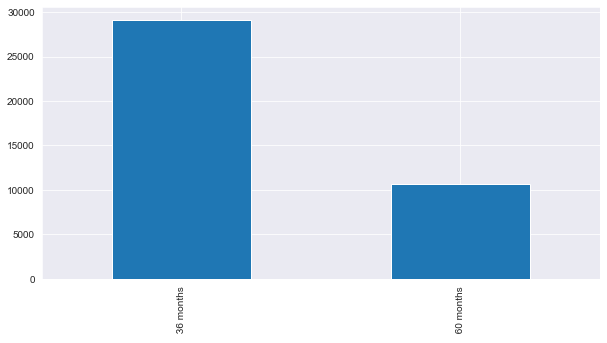

In [154]:
plt.figure(figsize=[10,5])
data.term.value_counts().plot.bar()

### earliest_cr_line:
##### The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_yea 

In [44]:
data['earliest_cr_line_month'] = data['earliest_cr_line'].dt.month
data['earliest_cr_line_year'] = data['earliest_cr_line'].dt.year

In [45]:
data

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0           5000         5000           4975.0    36     10.65       162.87   
1           2500         2500           2500.0    60     15.27        59.83   
2           2400         2400           2400.0    36     15.96        84.33   
3          10000        10000          10000.0    36     13.49       339.31   
4           3000         3000           3000.0    60     12.69        67.79   
...          ...          ...              ...   ...       ...          ...   
39562       4800         4800           1100.0    36     10.28       155.52   
39573       7000         7000           1000.0    36     10.59       227.82   
39623       9000         9000            700.0    36     12.49       301.04   
39666      15450        15450            600.0    36     11.22       507.46   
39680       3000         3000            525.0    36     11.86        99.44   

      grade sub_grade  emp_length home_ownership  annual_inc  \
0         B        B2          10           RENT     24000.0   
1         C        C4           0           RENT     30000.0   
2         C        C5          10           RENT     12252.0   
3         C        C1          10           RENT     49200.0   
4         B        B5           1           RENT     80000.0   
...     ...       ...         ...            ...         ...   
39562     C        C1           1           RENT     35000.0   
39573     C        C2           3       MORTGAGE     63500.0   
39623     D        D3           8       MORTGAGE     39000.0   
39666     C        C4           2       MORTGAGE     40000.0   
39680     D        D1           2       MORTGAGE     36153.0   

      verification_status    issue_d  loan_status             purpose  \
0                Verified 2011-12-01   Fully Paid         credit_card   
1         Source Verified 2011-12-01  Charged Off                 car   
2            Not Verified 2011-12-01   Fully Paid      small_business   
3         Source Verified 2011-12-01   Fully Paid               other   
4         Source Verified 2011-12-01      Current               other   
...                   ...        ...          ...                 ...   
39562        Not Verified 2007-11-01   Fully Paid  debt_consolidation   
39573        Not Verified 2007-11-01   Fully Paid  debt_consolidation   
39623        Not Verified 2007-10-01  Charged Off  debt_consolidation   
39666        Not Verified 2007-08-01  Charged Off  debt_consolidation   
39680        Not Verified 2007-08-01   Fully Paid  debt_consolidation   

                                        title addr_state    dti  delinq_2yrs  \
0                                    Computer         AZ  27.65            0   
1                                        bike         GA   1.00            0   
2                        real estate business         IL   8.72            0   
3                                    personel         CA  20.00            0   
4                                    Personal         OR  17.94            0   
...                                       ...        ...    ...          ...   
39562      Want to pay off high intrest cards         VA   7.51            0   
39573  Taking the First Step by Consolidating         AZ   8.50            0   
39623                            Pay off debt         MD   5.08            0   
39666    paying credit cards and doctor bill.         VA  13.50            0   
39680  Merging 2 Accounts into one to save $$         IN   7.47            0   

      earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0           1985-01-01               1         3        0      13648   
1           1999-04-01               5         3        0       1687   
2           2001-11-01               2         2        0       2956   
3           1996-02-01               1        10        0       5598   
4           1996-01-01               0        15        0      27783   
...                

### From the problem statement we know that the year range should be less than 2011

In [47]:
data[data['earliest_cr_line_year']>2011].shape

(59, 41)

### As we can cleary see that there are certain rows which have incorrect data, which might be caused due to y2k 

In [64]:
data['earliest_cr_line_year']=data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x).dt.year

#### adding month and year from issue_d into the dataframe which tells us when was the loan funded 

In [68]:
data['issue_d_month'] = data['issue_d'].dt.month
data['issue_d_year'] = data['issue_d'].dt.year

In [71]:
data.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   
2       2400         2400           2400.0    36     15.96        84.33     C   
3      10000        10000          10000.0    36     13.49       339.31     C   
4       3000         3000           3000.0    60     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2          10           RENT     24000.0            Verified   
1        C4           0           RENT     30000.0     Source Verified   
2        C5          10           RENT     12252.0        Not Verified   
3        C1          10           RENT     49200.0     Source Verified   
4        B5           1           RENT     80000.0     Source Verified   

     issue_d  loan_status         purpose                 title addr_state  \
0 2011-12-01   Fully Paid     credit_card              Computer         AZ   
1 2011-12-01  Charged Off             car                  bike         GA   
2 2011-12-01   Fully Paid  small_business  real estate business         IL   
3 2011-12-01   Fully Paid           other              personel         CA   
4 2011-12-01      Current           other              Personal         OR   

     dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
0  27.65            0       1985-01-01               1         3        0   
1   1.00            0       1999-04-01               5         3        0   
2   8.72            0       2001-11-01               2         2        0   
3  20.00            0       1996-02-01               1        10        0   
4  17.94            0       1996-01-01               0        15        0   

   revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
0      13648        83.7          9       0.00           0.00      5863.16   
1       1687         9.4          4       0.00           0.00      1008.71   
2       2956        98.5         10       0.00           0.00      3005.67   
3       5598        21.0         37       0.00           0.00     12231.89   
4      27783        53.9         38     524.06         524.06      3513.33   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00   2015-01-01           171.62   
1      117.08                     1.11   2013-04-01           119.66   
2        0.00                     0.00   2014-06-01           649.91   
3        0.00                     0.00   2015-01-01           357.48   
4        0.00                     0.00   2016-05-01            67.79   

  last_credit_pull_d  pub_rec_bankruptcies  earliest_cr_line_month  \
0         2016-05-01                   0.0                       1   
1         2013-09-01                   0.0                       4   
2         2016-05-01                   0.0                      11   
3         2016-04-01                   0.0                       2   
4         2016-05-01                   0.0                       1   

   earliest_cr_line_year  issue_d_month  issue_d_year  
0                   1985             12          2011  
1                   1999             12          2011  
2                   2001             12          2011  
3                   1996             12          2011  
4                   1996             12          2011

In [72]:
data.to_csv('Clean_data.csv', index=False)

# DATA VISUALISATION AND ANALYSIS 

In [5]:
master = pd.read_csv('Clean_data.csv')

### we will only consider the Fully paid and charged off loan status 

In [6]:
master = master[master['loan_status'].isin(['Fully Paid','Charged Off'])]

In [7]:
master

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0           5000         5000           4975.0    36     10.65       162.87   
1           2500         2500           2500.0    60     15.27        59.83   
2           2400         2400           2400.0    36     15.96        84.33   
3          10000        10000          10000.0    36     13.49       339.31   
5           5000         5000           5000.0    36      7.90       156.46   
...          ...          ...              ...   ...       ...          ...   
37820       4800         4800           1100.0    36     10.28       155.52   
37821       7000         7000           1000.0    36     10.59       227.82   
37822       9000         9000            700.0    36     12.49       301.04   
37823      15450        15450            600.0    36     11.22       507.46   
37824       3000         3000            525.0    36     11.86        99.44   

      grade sub_grade  emp_length home_ownership  annual_inc  \
0         B        B2          10           RENT     24000.0   
1         C        C4           0           RENT     30000.0   
2         C        C5          10           RENT     12252.0   
3         C        C1          10           RENT     49200.0   
5         A        A4           3           RENT     36000.0   
...     ...       ...         ...            ...         ...   
37820     C        C1           1           RENT     35000.0   
37821     C        C2           3       MORTGAGE     63500.0   
37822     D        D3           8       MORTGAGE     39000.0   
37823     C        C4           2       MORTGAGE     40000.0   
37824     D        D1           2       MORTGAGE     36153.0   

      verification_status     issue_d  loan_status             purpose  \
0                Verified  2011-12-01   Fully Paid         credit_card   
1         Source Verified  2011-12-01  Charged Off                 car   
2            Not Verified  2011-12-01   Fully Paid      small_business   
3         Source Verified  2011-12-01   Fully Paid               other   
5         Source Verified  2011-12-01   Fully Paid             wedding   
...                   ...         ...          ...                 ...   
37820        Not Verified  2007-11-01   Fully Paid  debt_consolidation   
37821        Not Verified  2007-11-01   Fully Paid  debt_consolidation   
37822        Not Verified  2007-10-01  Charged Off  debt_consolidation   
37823        Not Verified  2007-08-01  Charged Off  debt_consolidation   
37824        Not Verified  2007-08-01   Fully Paid  debt_consolidation   

                                        title addr_state    dti  delinq_2yrs  \
0                                    Computer         AZ  27.65            0   
1                                        bike         GA   1.00            0   
2                        real estate business         IL   8.72            0   
3                                    personel         CA  20.00            0   
5       My wedding loan I promise to pay back         AZ  11.20            0   
...                                       ...        ...    ...          ...   
37820      Want to pay off high intrest cards         VA   7.51            0   
37821  Taking the First Step by Consolidating         AZ   8.50            0   
37822                            Pay off debt         MD   5.08            0   
37823    paying credit cards and doctor bill.         VA  13.50            0   
37824  Merging 2 Accounts into one to save $$         IN   7.47            0   

      earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0           1985-01-01               1         3        0      13648   
1           1999-04-01               5         3        0       1687   
2           2001-11-01               2         2        0       2956   
3           1996-02-01               1        10        0       5598   
5           2004-11-01               3         9        0       7963   
...    

### Defining Helper function to plot graphs 

In [109]:
def showLabels(ax, d=None):
    '''
    This function will put labels to the bar plots
    '''
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value
    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = 4
        va = 'bottom'
        
        if y_value < 0:
    
            space *= -1          
            va = 'top'
        
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nor " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        i = i+1
        # Create annotation
        plt.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      

In [108]:
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
#     print(cnt)
    percentages = grp.unstack() * 100 / cnt.T
#     plt.figure(dpi=120)
    
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('GnBu_d', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
#     print(cnt.to_dict())
    showLabels(ax, grp[loanstatus].to_dict())
    
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [10]:
def plot_distribution(dataframe, col):
    plt.figure(figsize=(25,10), dpi=150)
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [11]:
def plot_percentages(dataframe, by, sortbyindex=False):
    '''
    This method prints two plots side by side 
    Left one is percentage of a categorical variable in the entire dataset 
    Right one is percentage for Charged Off loans 
    Significant changes in percentage from left to right can indicate a value of interest
    '''
#     plt.figure(figsize=[20,10], dpi=120)
    plt.subplot(1, 2, 1)
    values = (master[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('GnBu_d', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    
    values = (master.loc[master['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('GnBu_d', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    
    showLabels(ax)

### Variable: loan_amnt

C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


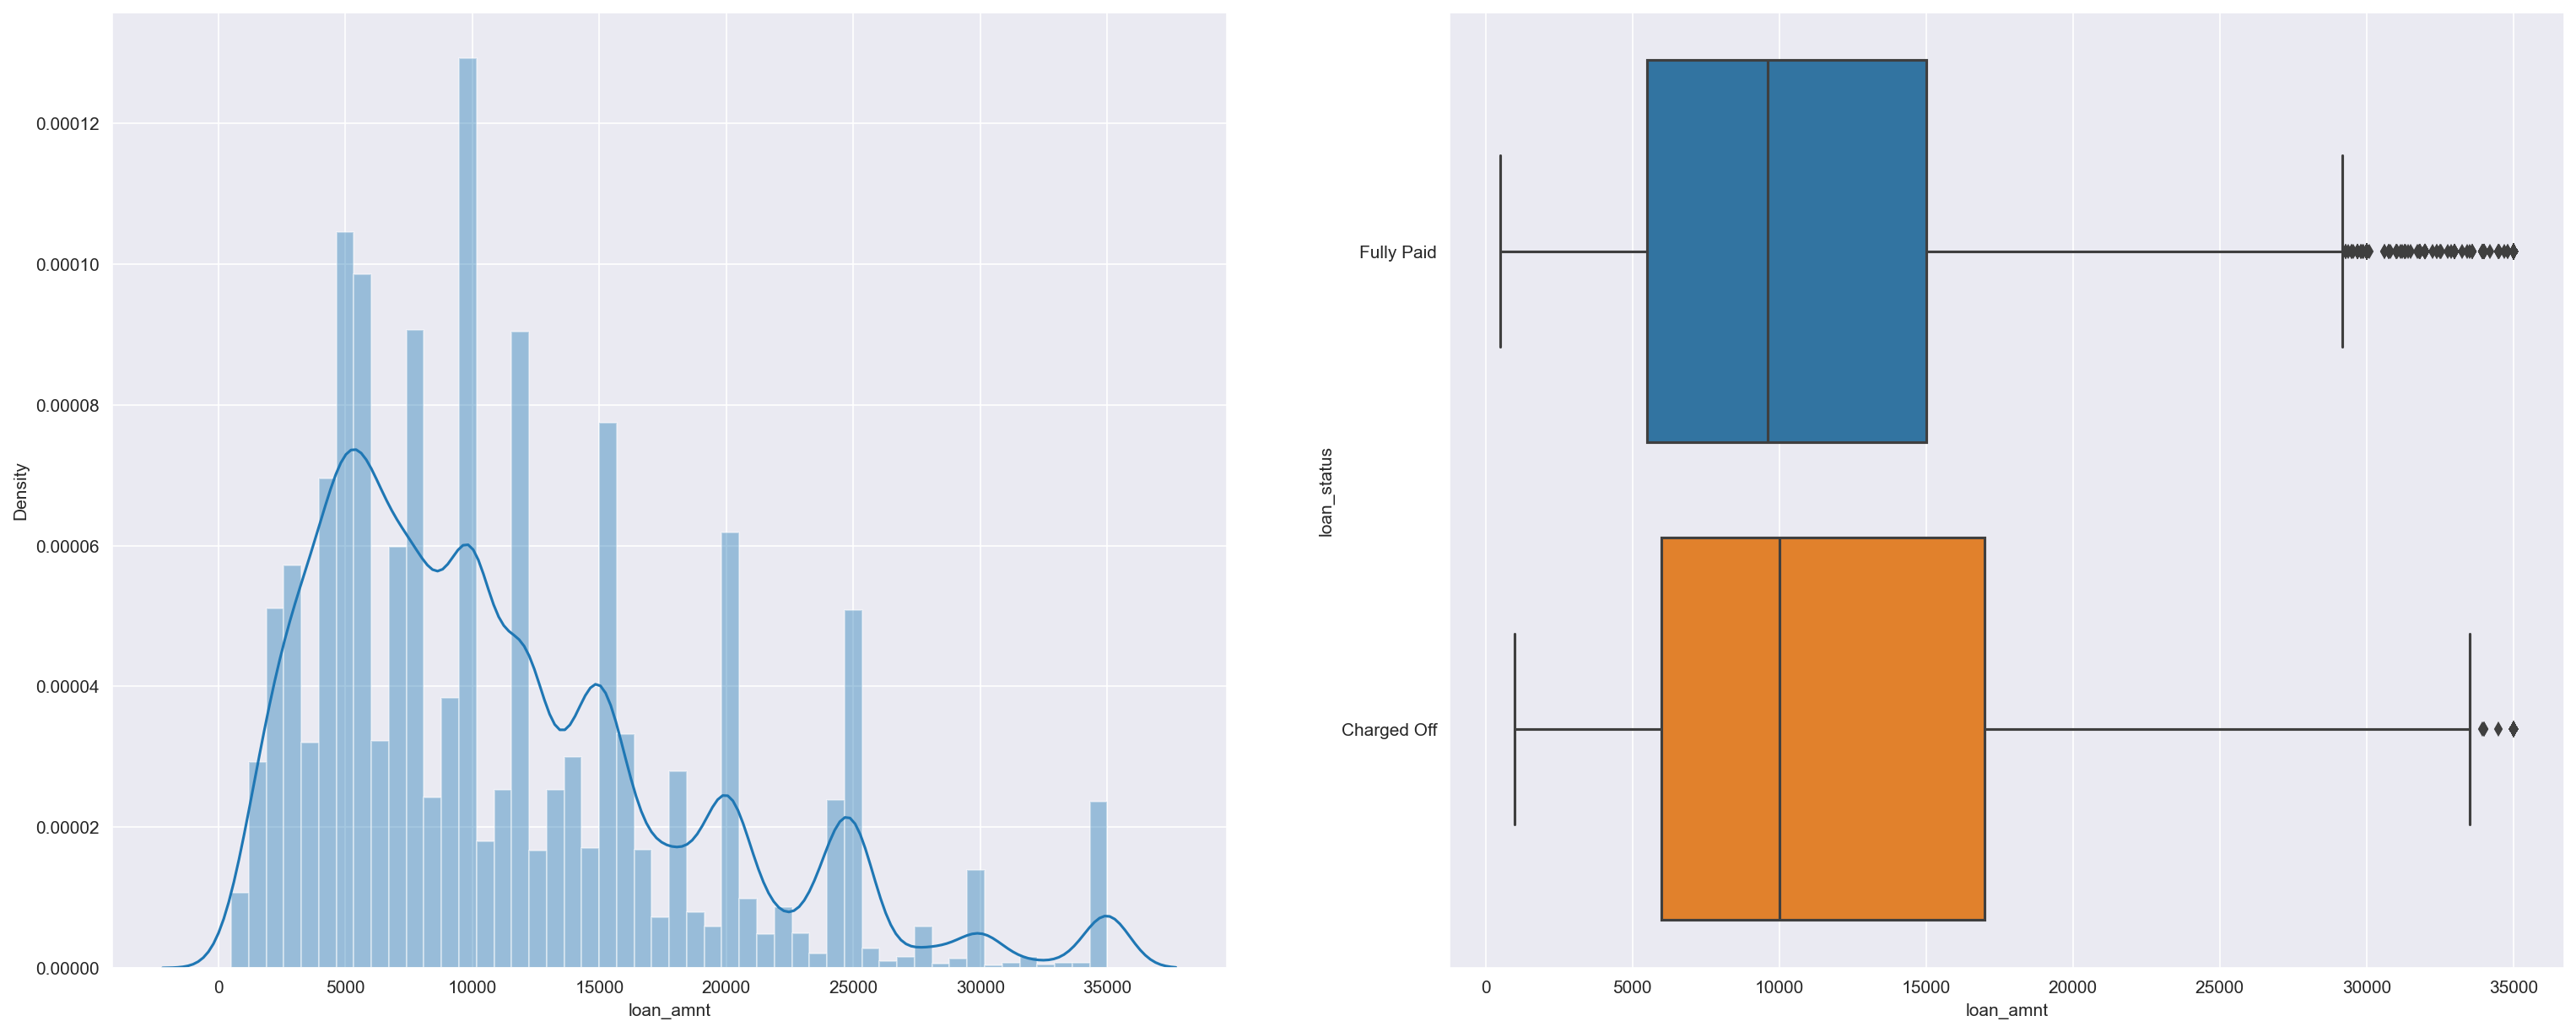

In [12]:
plot_distribution(master, 'loan_amnt')

We can see that the graph is right skwed, most loan granted are below 15000 

In [13]:
master.groupby(['loan_status'])['loan_amnt'].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   5202.0  12294.040754  8096.074341  1000.0  6000.0  10000.0   
Fully Paid   31525.0  10965.614592  7224.125820   500.0  5500.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  17000.0  35000.0  
Fully Paid   15000.0  35000.0

Funding amounts see a spike around each 5000 boundary.<br>
Charged off loans are shifted towards higher average loan amount request.

### Varibale: loan_status 

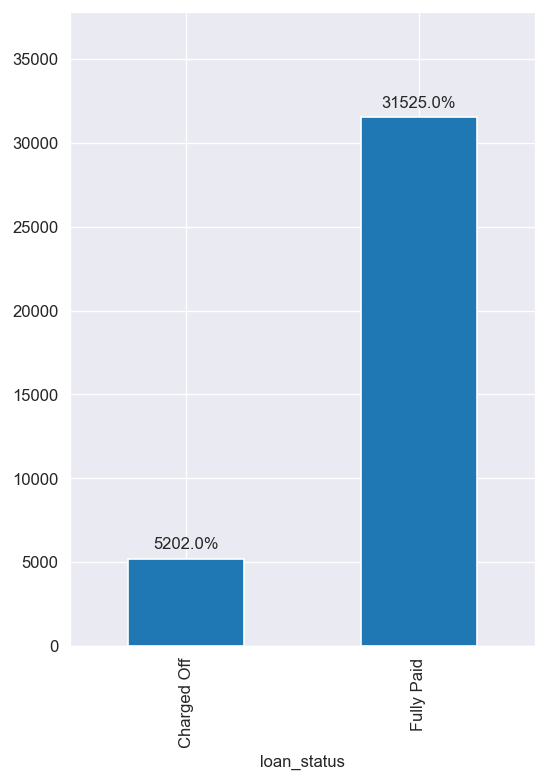

In [14]:
plt.figure(figsize=(5,7), dpi=120)
ax = master.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)

In [15]:
print("%.2f" % (master.loc[master['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(master)))

14.16


we can see that approximately 14.1% people default on their loans

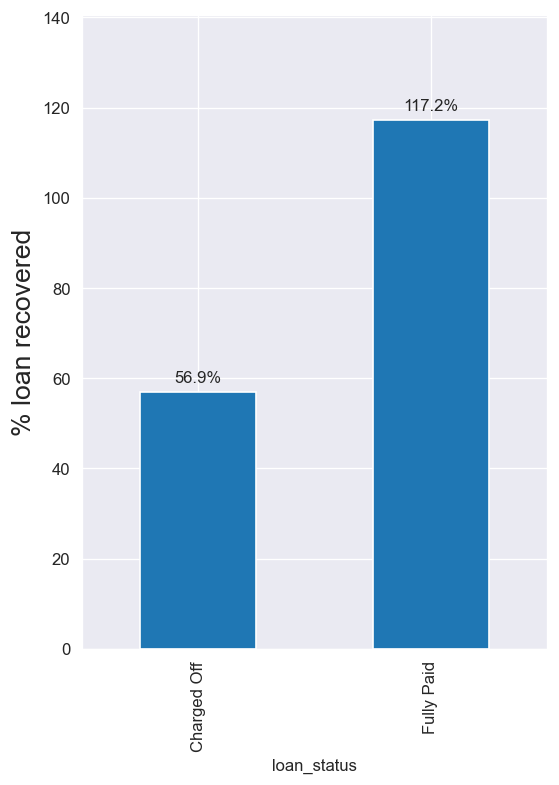

In [16]:
plt.figure(figsize=(5,7), dpi=120)
ax = (master.groupby('loan_status').total_pymnt.sum() * 100 / master.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

Lending company is able to recover 56.9% loans from defaulter and it is able to generate a profit of 17.2% on fully paid loans

### Variable: loan_amt 

In [17]:
master['loan_amnt_bin'] = pd.cut(master['loan_amnt'],
                                      [x for x in range(0, 36000, 5000)],
                                      labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

<AxesSubplot:xlabel='loan_amnt_bin', ylabel='% of loans Charged Off'>

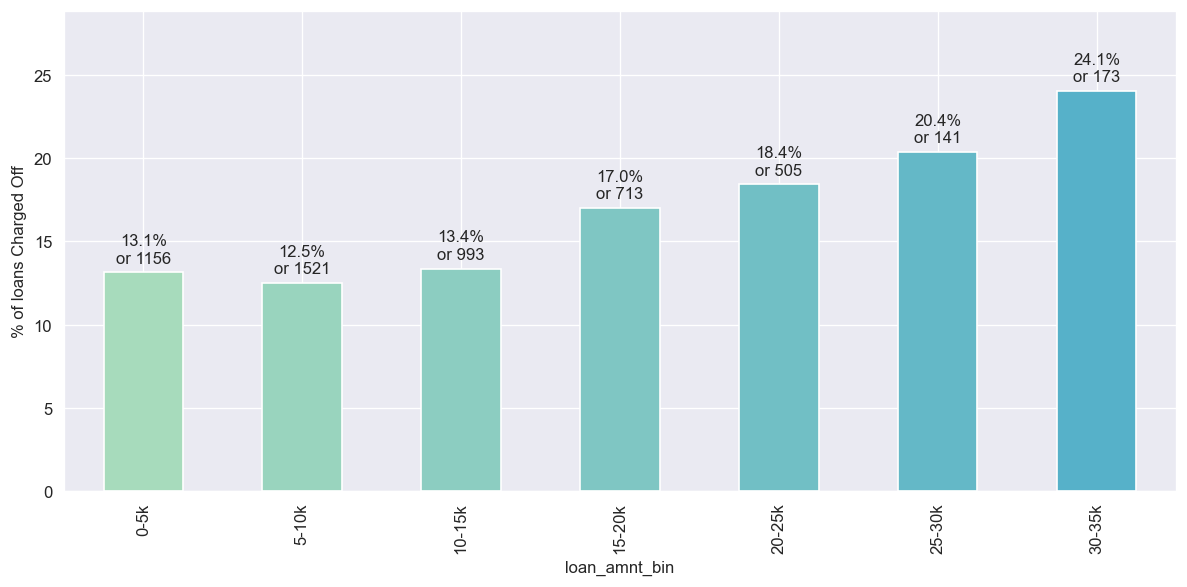

In [110]:
plt.figure(figsize=[10,5], dpi=120)
plotLoanStatus(master, 'loan_amnt_bin')

It is prettry clearly visible that as the amount of loan increases the % of defaulter increases and the count goes down

### Variable: Term 

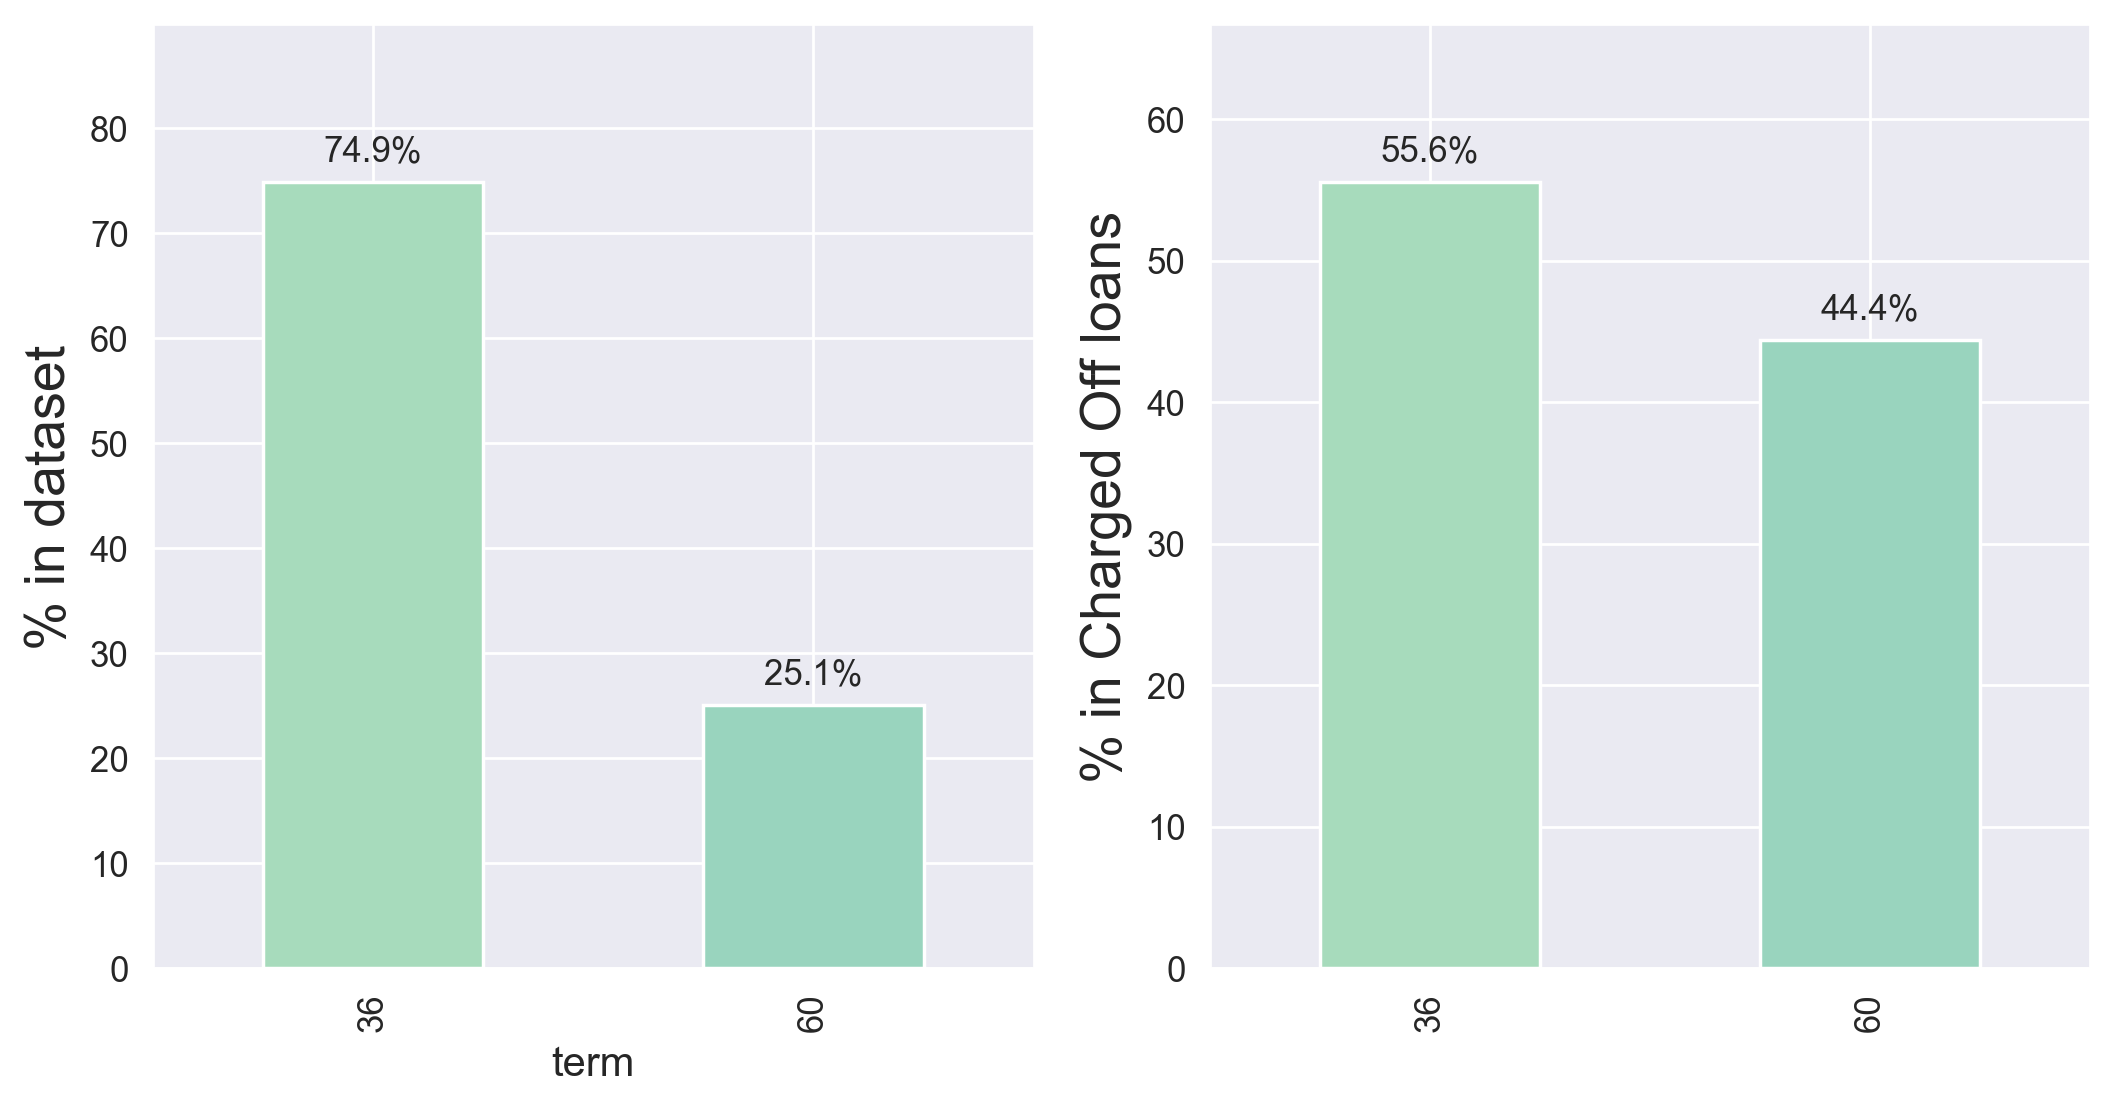

In [310]:
plt.figure(figsize=[10,5], dpi=250)
plot_percentages(master, 'term')

In [311]:
# plt.figure(figsize=[20,10], dpi=120)
# plot_percentages(master, 'term')

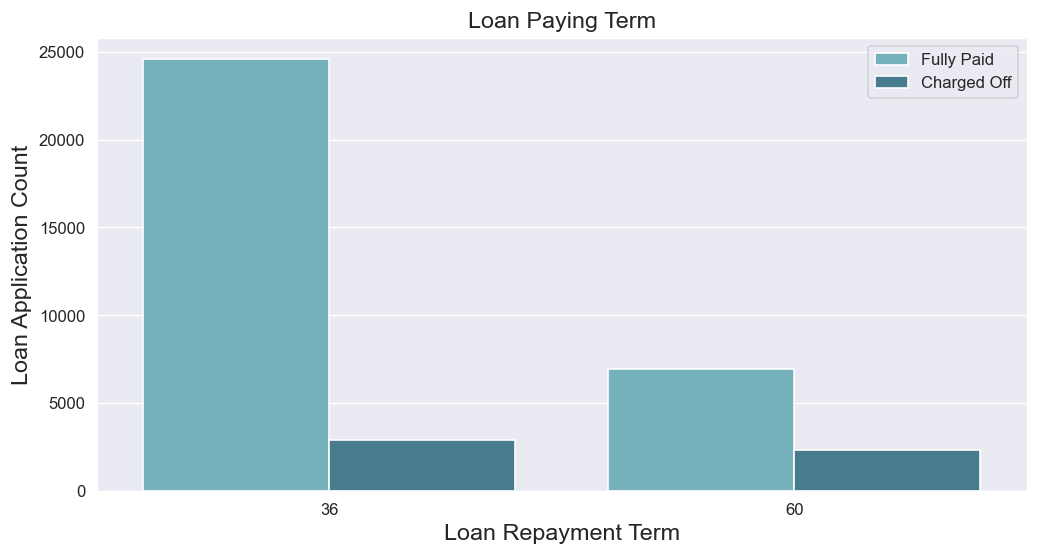

In [20]:
plt.figure(figsize=[10,5], dpi = 120)
ax = sns.countplot(x="term",data=master,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14)
ax.set_xlabel('Loan Repayment Term',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

1. We can clearly see that the 36 month old loans are paid off more than that of 60 months, in the dataset there are 74.9% of total loans of loans are given 
   for 36 months and 25% is given for 60 months
2. Although the number of loans approved for 60 months are less but the default rate is 11% less than that if 36 month loans

### Variable: int_rate 

C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 600x600 with 0 Axes>

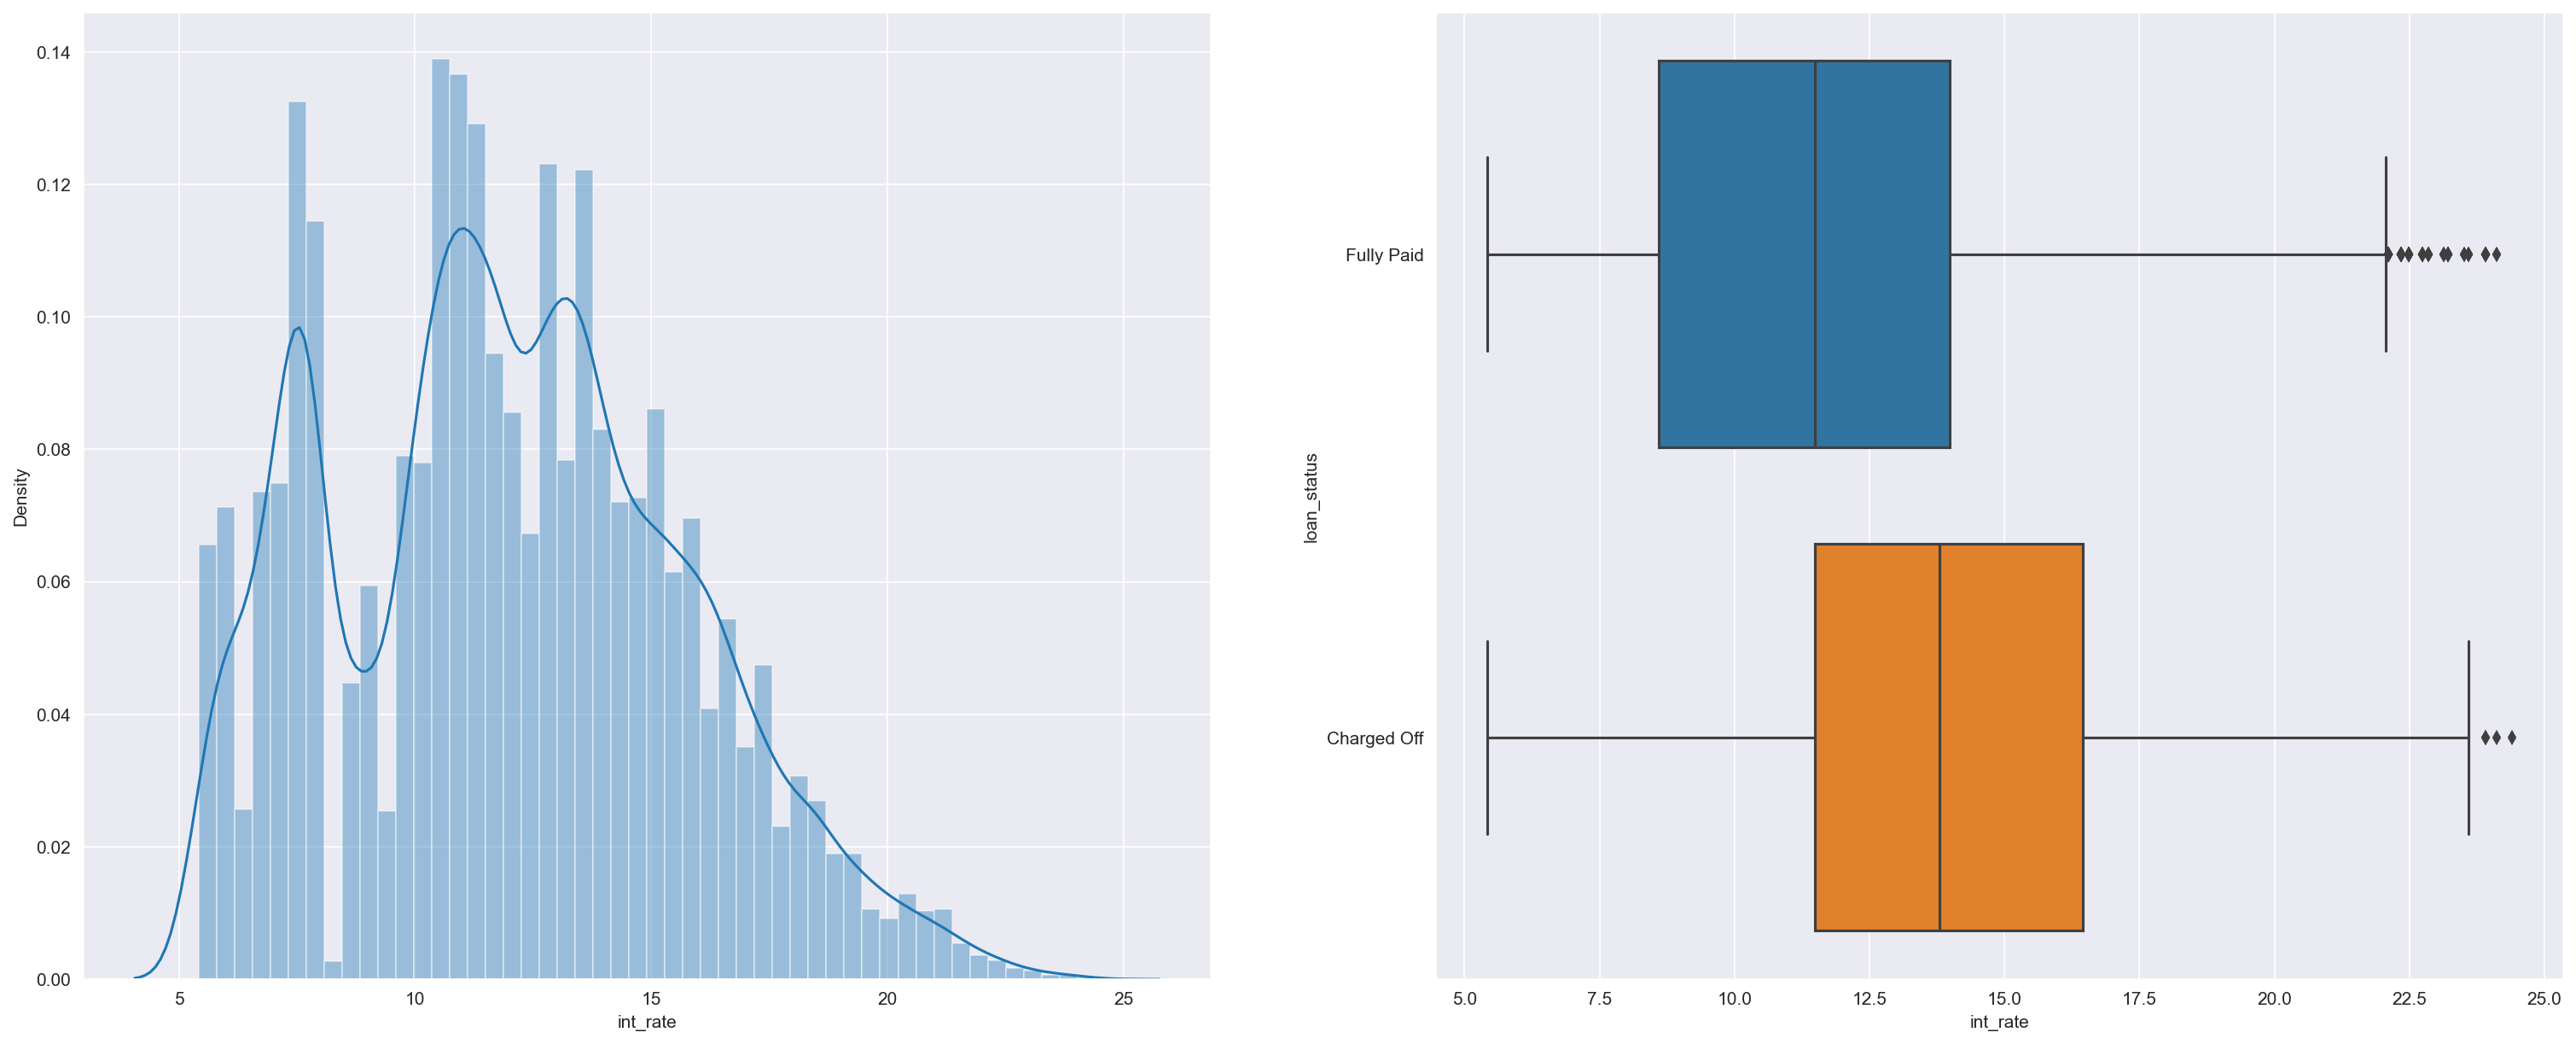

In [21]:
plt.figure(figsize=[5,5], dpi = 120)
plot_distribution(master, 'int_rate')

In [22]:
master.groupby(['loan_status'])['int_rate'].describe()

count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   5202.0  13.925054  3.656880  5.42  11.49  13.79  16.45  24.40
Fully Paid   31525.0  11.659022  3.608944  5.42   8.59  11.49  13.99  24.11

In [23]:
master['int_rate_buckets'] = round(master.int_rate)

<AxesSubplot:xlabel='int_rate_buckets', ylabel='% of loans Charged Off'>

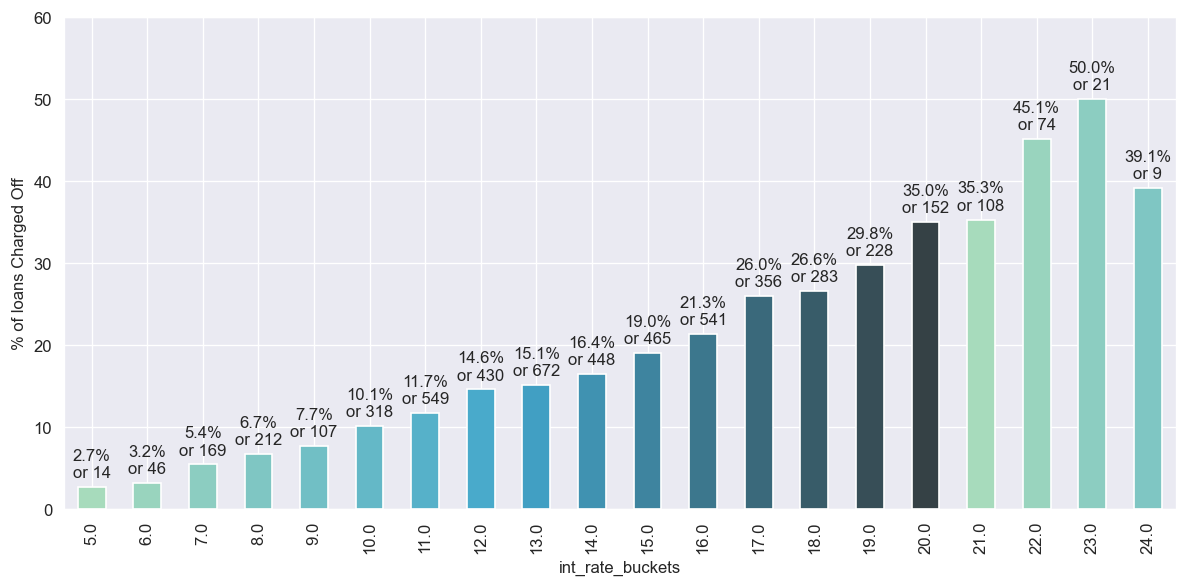

In [111]:
plt.figure(figsize=[10,5], dpi = 120)
plotLoanStatus(master, 'int_rate_buckets')

In [25]:
master.int_rate.describe()

count    36727.000000
mean        11.979982
std          3.701048
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

<AxesSubplot:title={'center':'int_rate'}, xlabel='grade', ylabel='int_rates'>

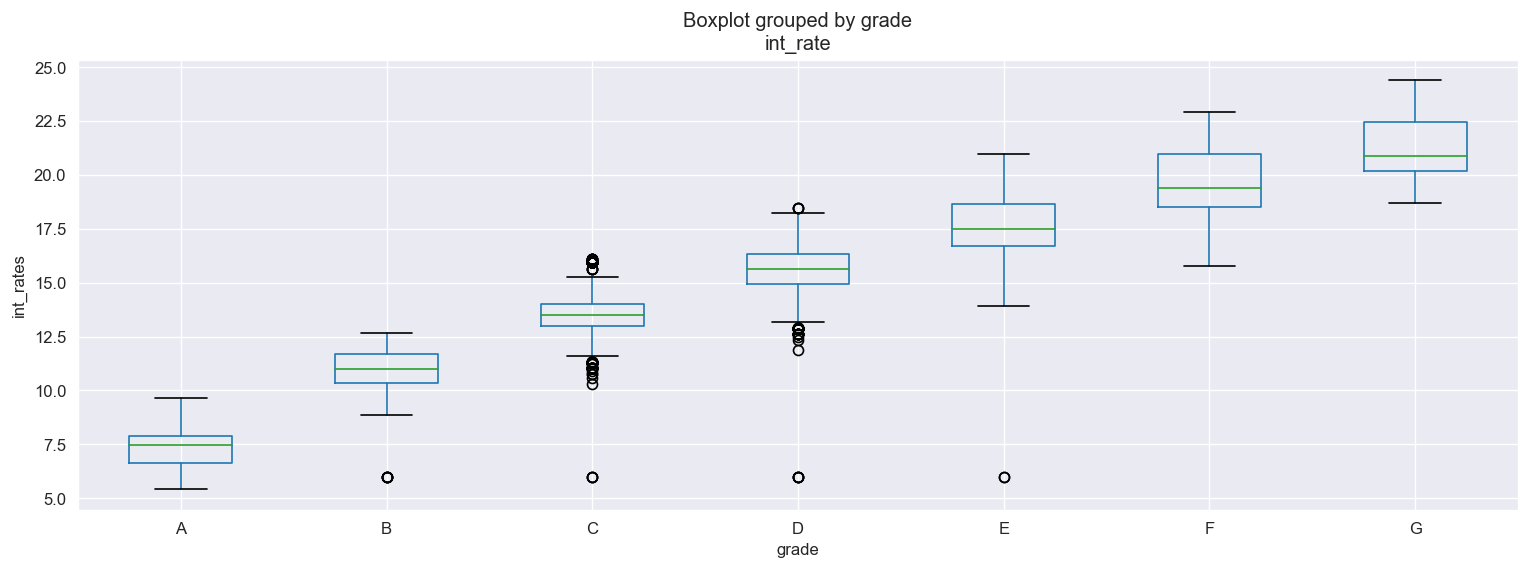

In [118]:
fig,ax=plt.subplots(figsize=[15,5], dpi = 120)
ax.set_ylabel('int_rates')
master.boxplot(column=['int_rate'], by='grade', ax=ax)

1. We can see that the intrest rates varies from 5.42% to 24.4%
2. the intrest rate for charged off is 2% approx more than fully paid
3. The intrest rates are higher for lower grades

### Variabel: Purpose 

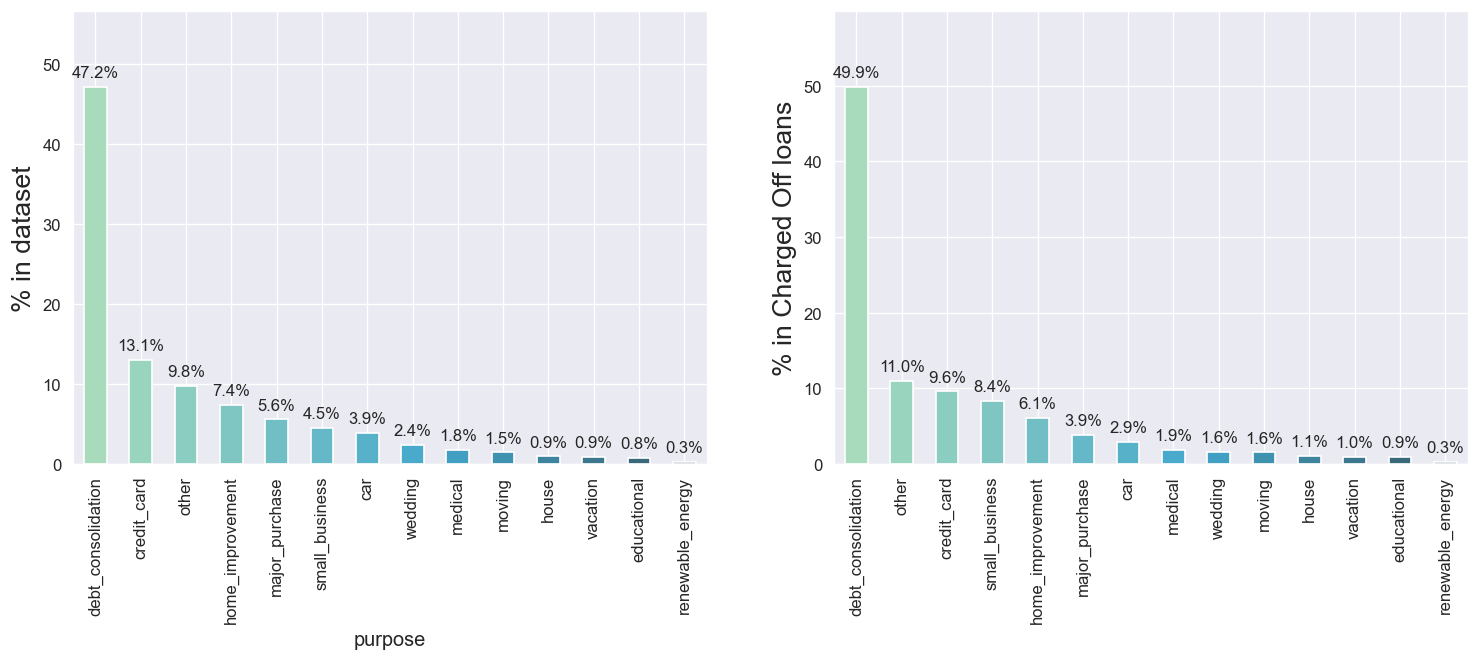

In [101]:
plt.figure(figsize=[15,5], dpi = 120)
plot_percentages(master, 'purpose')

<AxesSubplot:xlabel='purpose', ylabel='% of loans Charged Off'>

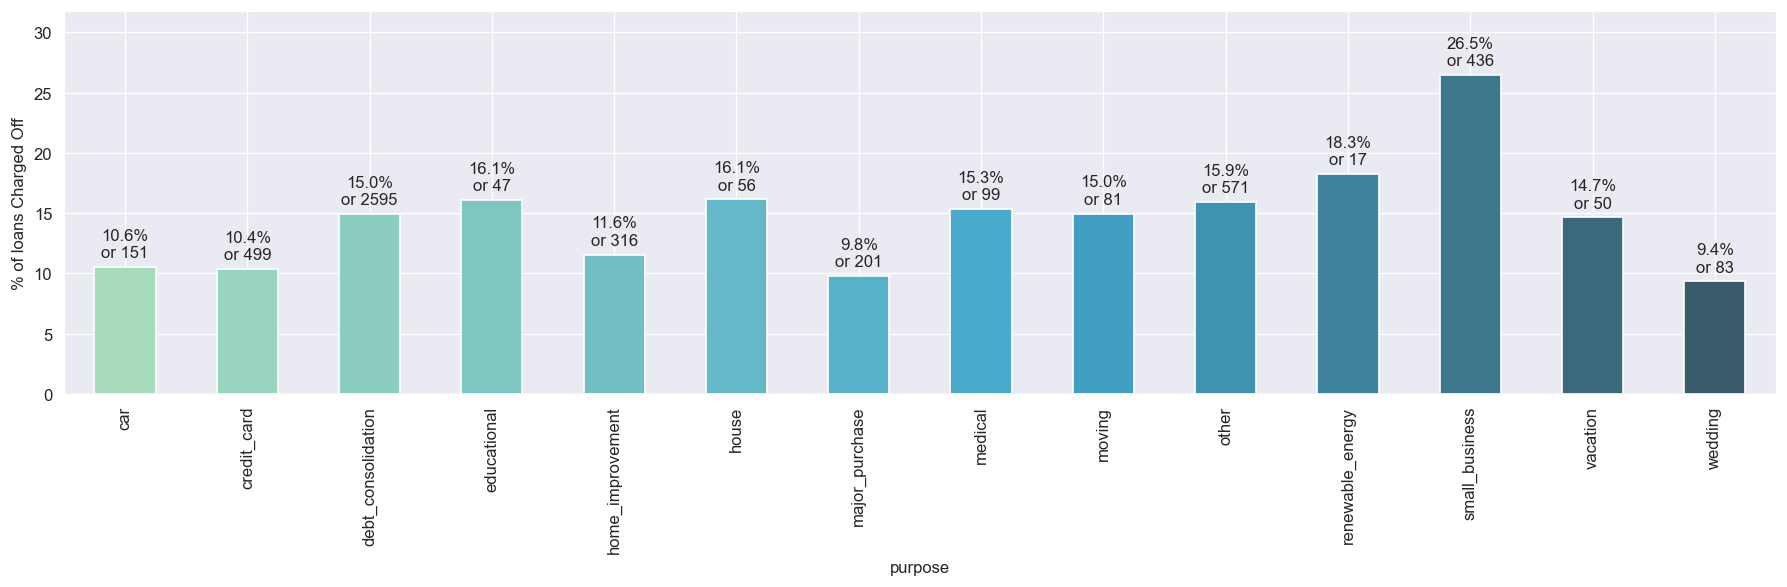

In [112]:
plt.figure(figsize=[15,5], dpi = 120)
plotLoanStatus(master, 'purpose')

1. we can see that the most of the loans taken for the purpose of small_business are charged off mostly 
2. Approximately 49% of the people have taken loans for dept consolidation

### Variable: grade and sub_grade 

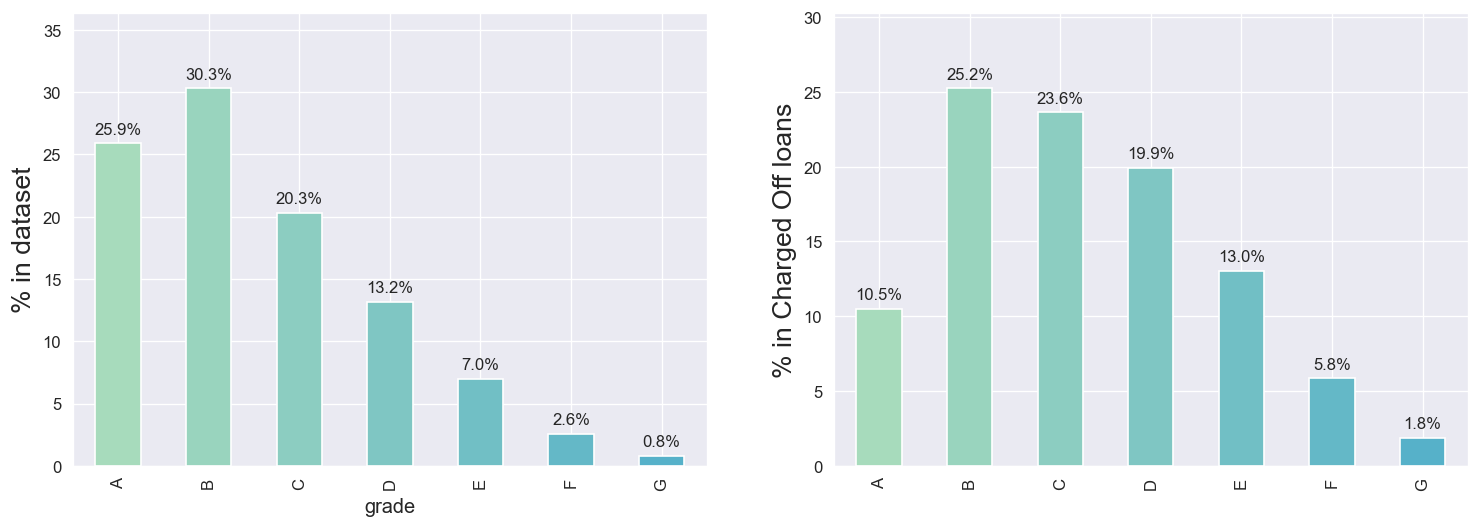

In [37]:
plt.figure(figsize=[15,5], dpi = 120)
plot_percentages(master, 'grade', True)

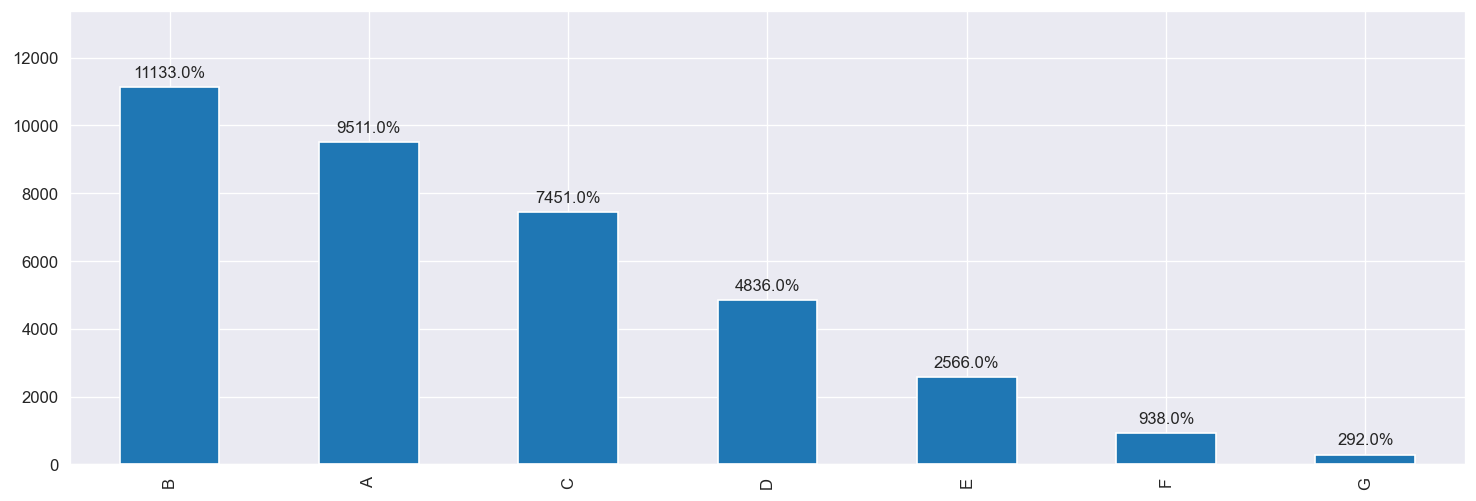

In [43]:
plt.figure(figsize=[15,5], dpi = 120)
ax=master.grade.value_counts().sort_values(ascending=False).plot.bar()
showLabels(ax)

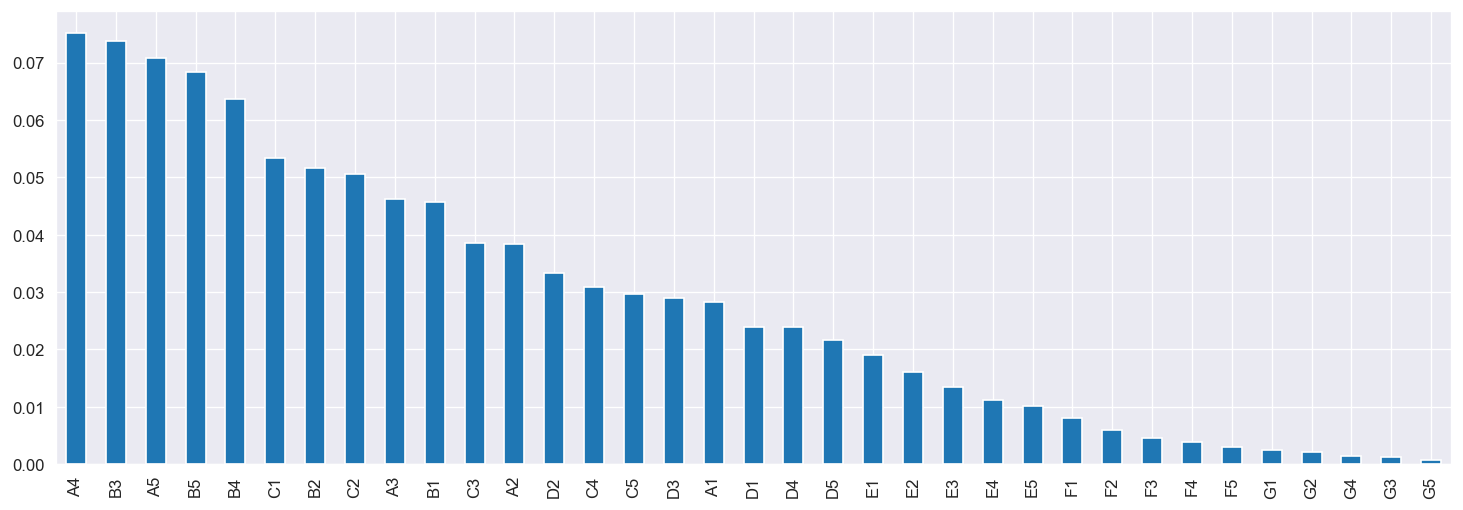

In [49]:
plt.figure(figsize=[15,5], dpi = 120)
ax=master.sub_grade.value_counts(normalize=True).sort_values(ascending=False).plot.bar()

C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

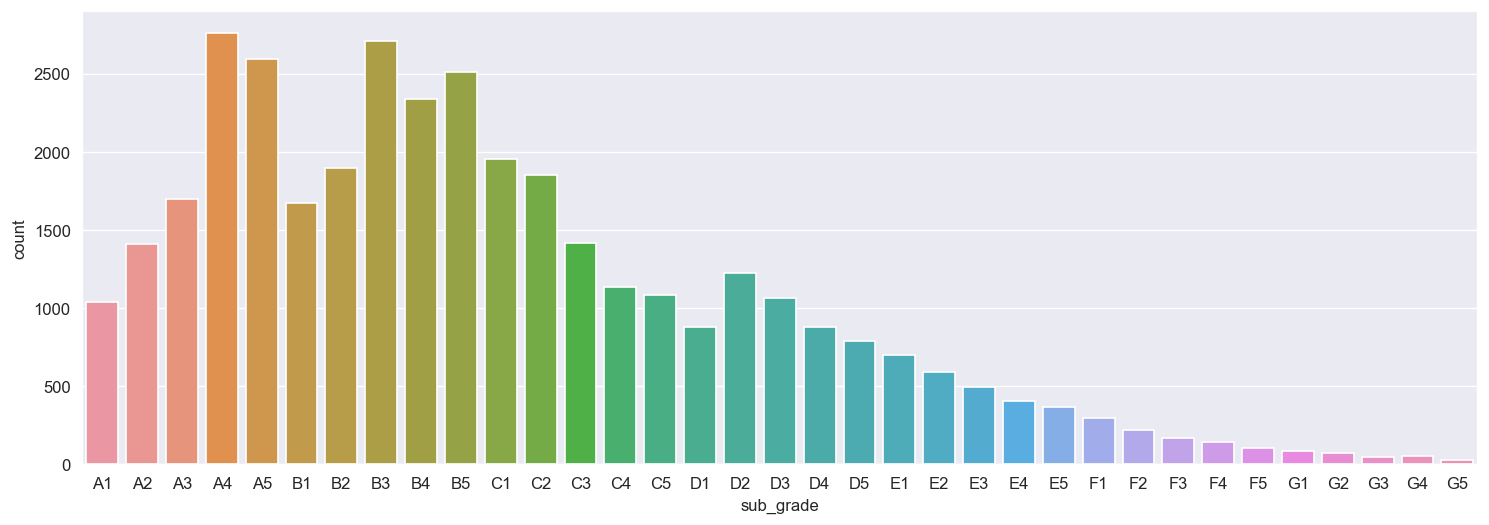

In [47]:
plt.figure(figsize=[15,5], dpi = 120)
sns.countplot(master['sub_grade'], order=sorted(master.sub_grade.unique()))

<AxesSubplot:xlabel='grade', ylabel='% of loans Charged Off'>

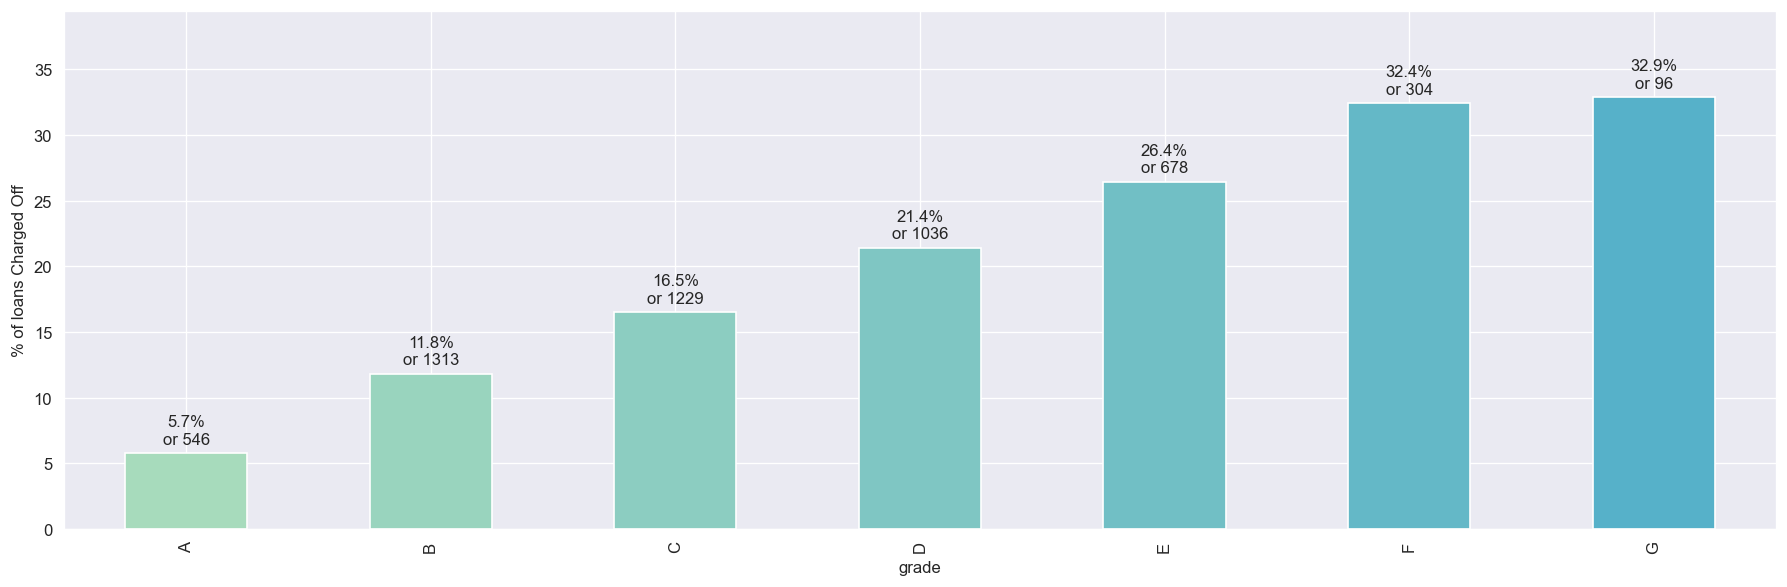

In [113]:
plt.figure(figsize=[15,5], dpi = 120)
plotLoanStatus(master, 'grade')

1. The loan for Grade A and B are higher because the % of charge off is less
2. A4 and B3 are the highest sub-categories of sub-grade
3. F and G grade have the highest charge off 

### Variable: emp_length 

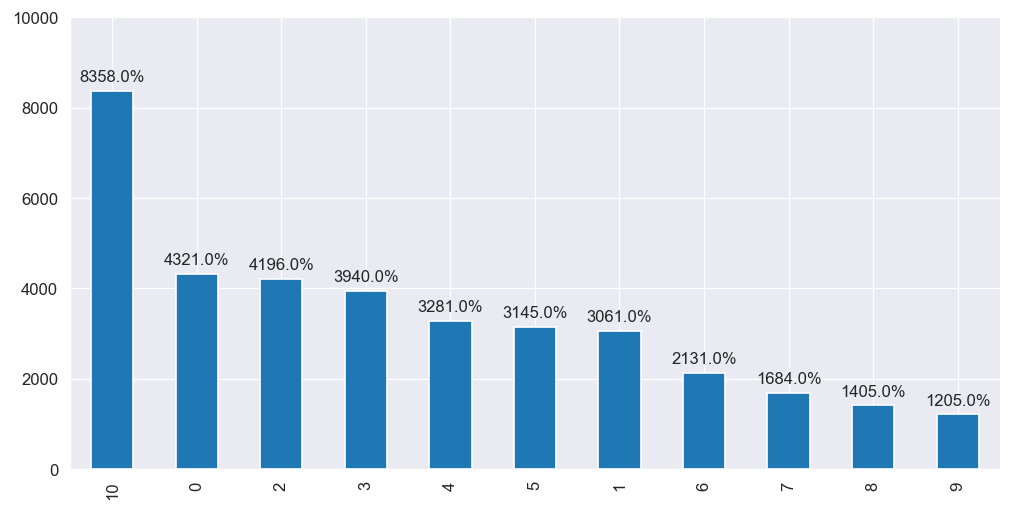

In [67]:
plt.figure(figsize=[10,5], dpi=120)
ax=master.emp_length.value_counts().plot.bar()
showLabels(ax)

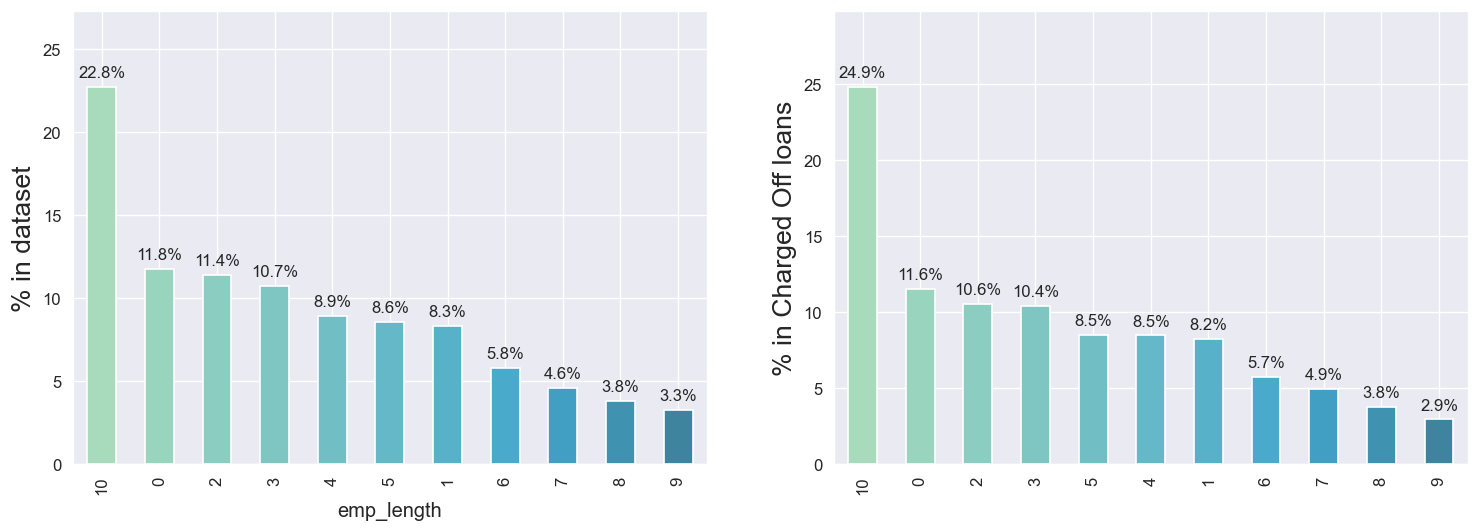

In [72]:
plt.figure(figsize=[15,5], dpi=120)
plot_percentages(master, 'emp_length')

<AxesSubplot:xlabel='emp_length', ylabel='% of loans Charged Off'>

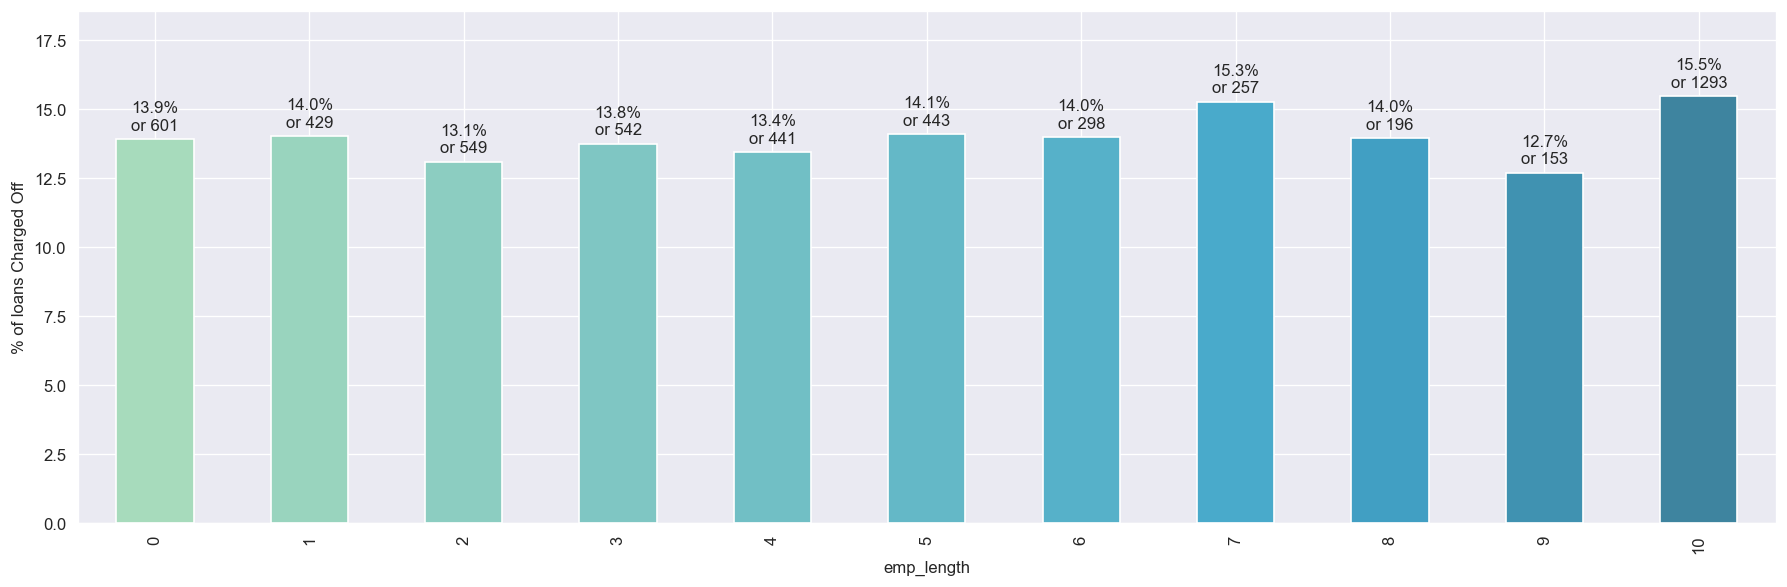

In [114]:
plt.figure(figsize=[15,5], dpi=120)
plotLoanStatus(master, 'emp_length')

1. Majority of the loan takers are having employment length of over 10 years but they are the one who have most charged off rate as well
2. people having experince of 10 years or more and 0 or less year emp_length people have highest charged off numbers

### variable: annual_inc 

In [124]:
master.annual_inc.describe()

count    3.672700e+04
mean     6.947194e+04
std      6.406963e+04
min      4.000000e+03
25%      4.120000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

We can see that there is a lot of difference between the 75% and max, which indicates outliers let's check for them

Text(0, 0.5, 'annual income 1e-6')

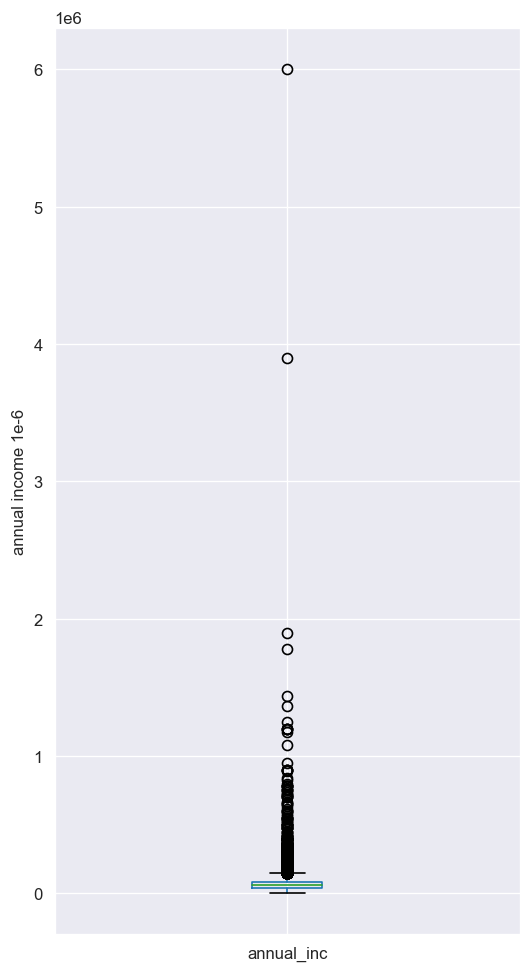

In [134]:
plt.figure(figsize=[5,10], dpi=120)
ax=master.annual_inc.plot.box()
ax.set_ylabel('annual income 1e-6')

Removing Outliers

In [135]:
#  only the ones that are within +3 to -3 standard deviations are kept
df = master[np.abs(master.annual_inc-master.annual_inc.mean()) <= (3*master.annual_inc.std())]

C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x260945f7e48>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

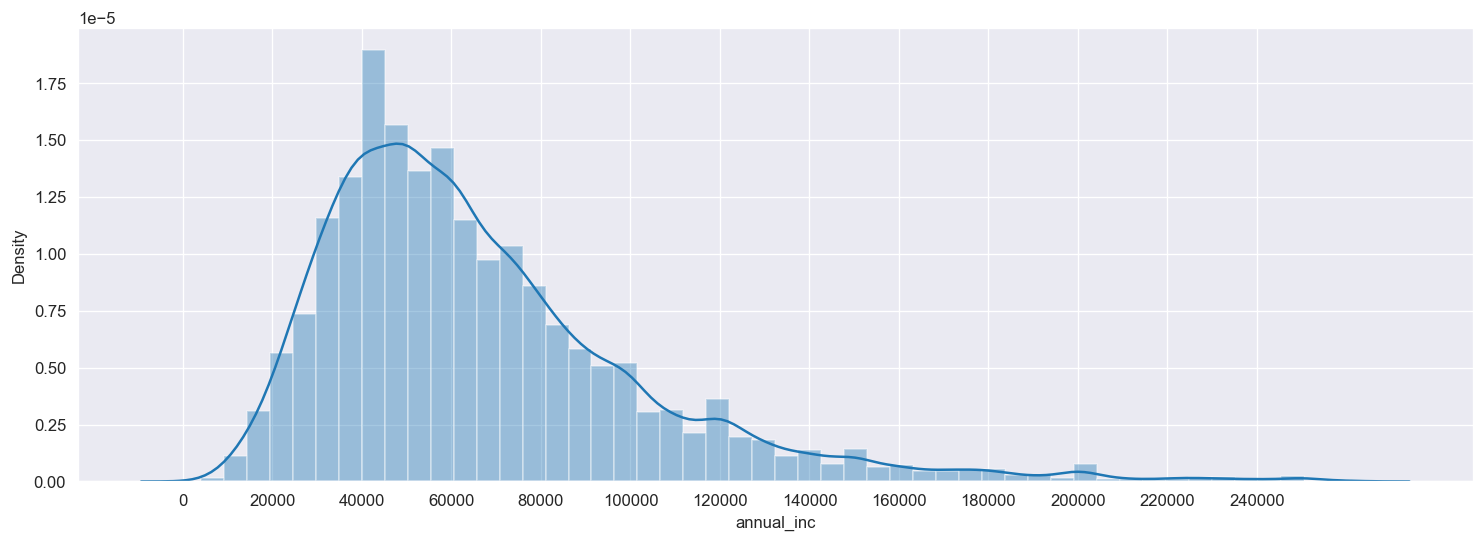

In [138]:
plt.figure(figsize=(15, 5), dpi=120)
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))

In [139]:
#Create Derived categorical variable
master['income_bin'] = master['annual_inc']/20000
master['income_bin'] = master['income_bin'].astype(int)

[Text(0, 0, '0-10k'),
 Text(1, 0, '10-20k'),
 Text(2, 0, '20-30k'),
 Text(3, 0, '30-40k'),
 Text(4, 0, '40-50k'),
 Text(5, 0, '50-60k'),
 Text(6, 0, '60-70k'),
 Text(7, 0, '70-80k'),
 Text(8, 0, '80-90k'),
 Text(9, 0, '90-100k'),
 Text(10, 0, '100-110k'),
 Text(11, 0, '110-120k'),
 Text(12, 0, '120-130k'),
 Text(13, 0, '130-140k'),
 Text(14, 0, '140-150k'),
 Text(15, 0, '150-160k'),
 Text(16, 0, '160-170k'),
 Text(17, 0, '170-180k'),
 Text(18, 0, '180-190k'),
 Text(19, 0, '190-200k'),
 Text(20, 0, '200-210k')]

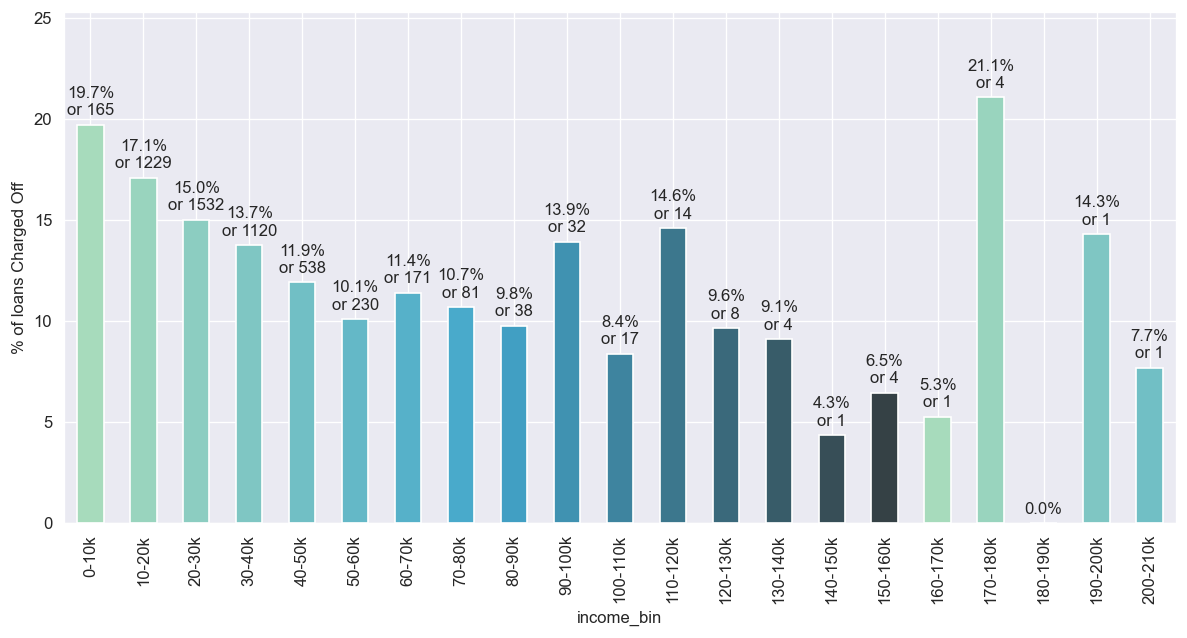

In [142]:
# From the above analysis we have decided that 10k is good bucket size for income
plt.figure(figsize=(10,5), dpi=120)
ax = plotLoanStatus(master.loc[master['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])

We will analyse this more in bivariate analysis

### Variable: verification status

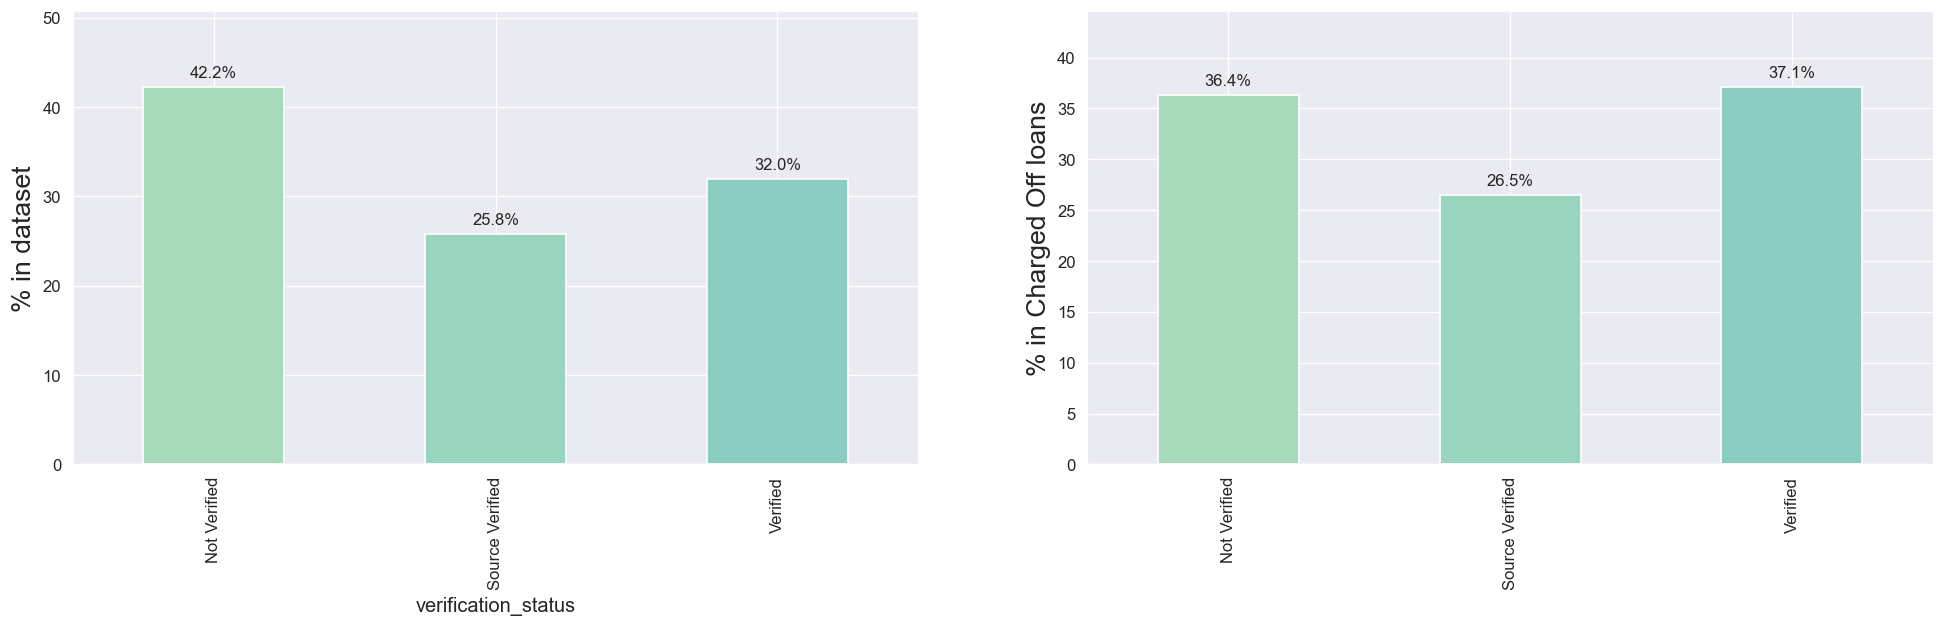

In [144]:
plt.figure(figsize=(20,5), dpi=120)
plot_percentages(master, 'verification_status', True)

<AxesSubplot:>

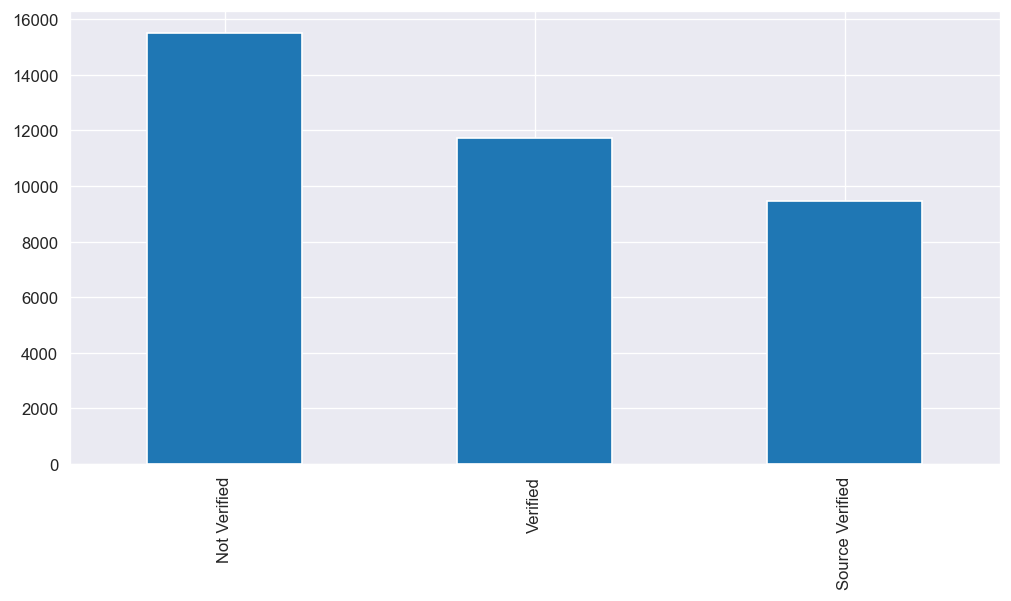

In [151]:
plt.figure(figsize=[10,5], dpi=120)
master.verification_status.value_counts().plot.bar()

1. we see that 42.2% of loan not veried that higher than verified and source verified
2. We will analyse this more in bivariate analysis

### variable: issued_d  

C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='issue_d_year', ylabel='% of loans Charged Off'>

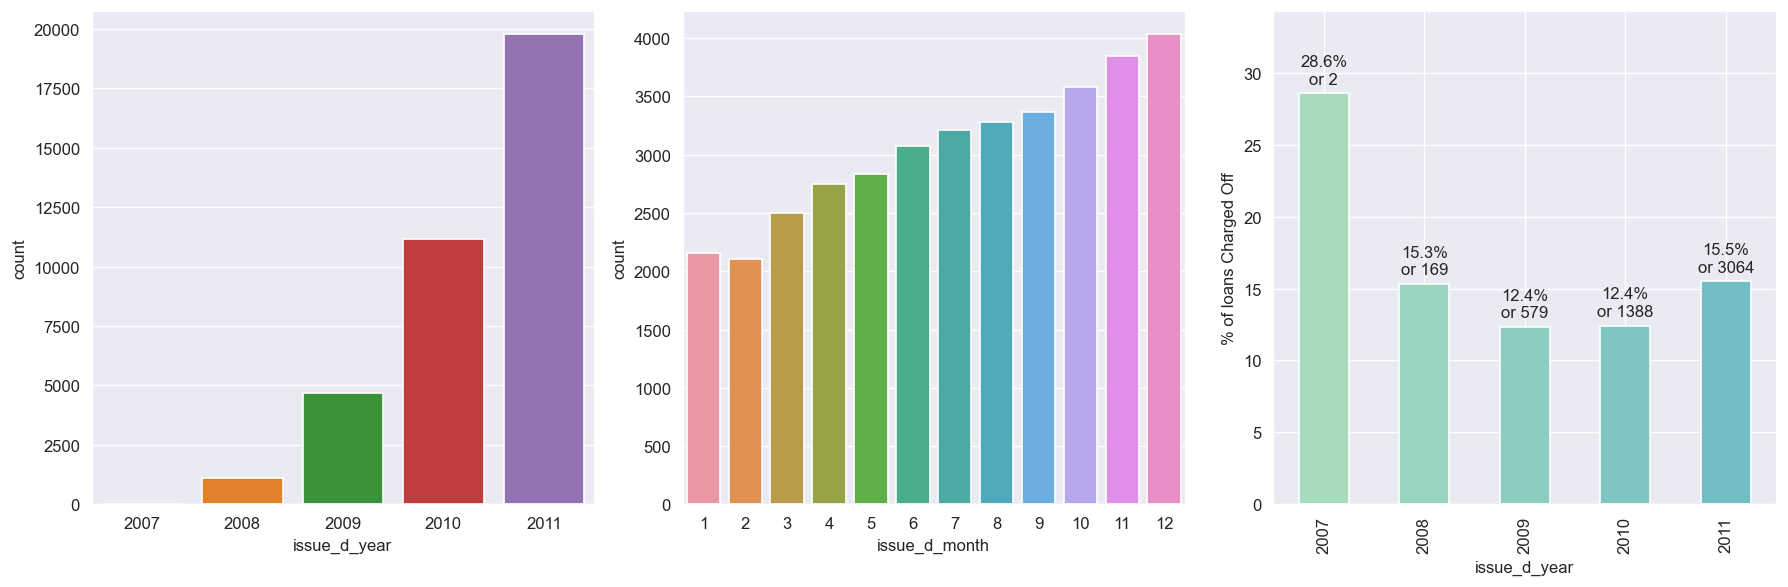

In [152]:
plt.figure(figsize=(15,5), dpi=120)
plt.subplot(1, 3, 1)
sns.countplot(master['issue_d_year'], order=sorted(master.issue_d_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(master['issue_d_month'], order=sorted(master.issue_d_month.unique()))

#Fraction of loans charged off and fully Paid
plt.subplot(1, 3, 3)
plotLoanStatus(master, 'issue_d_year')


<AxesSubplot:xlabel='issue_d_month', ylabel='% of loans Charged Off'>

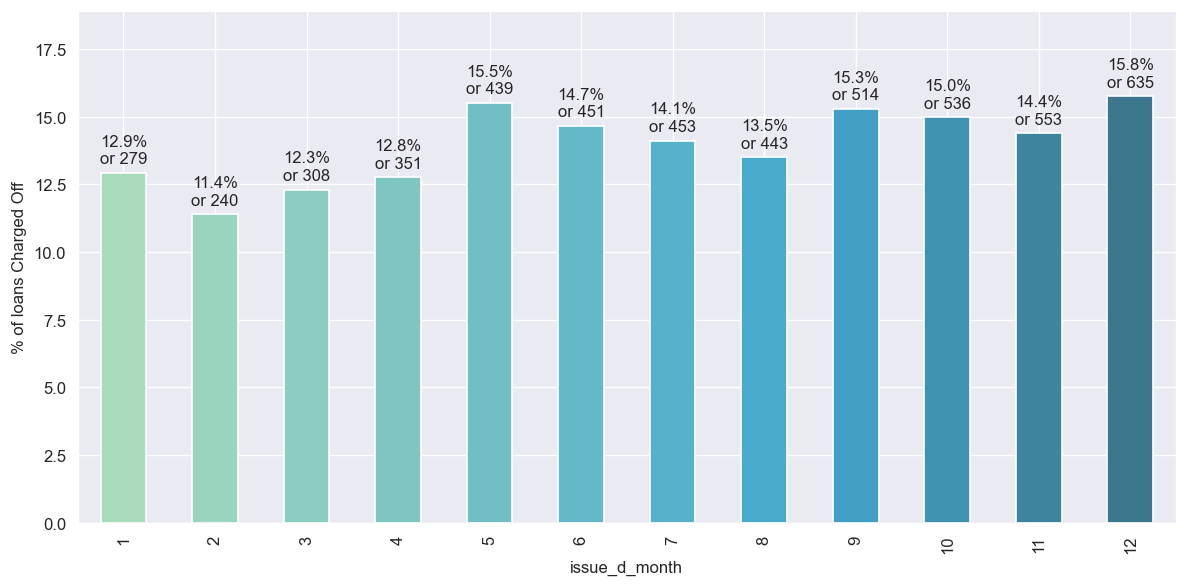

In [156]:
plt.figure(figsize=(10, 5), dpi=120)
plotLoanStatus(master, 'issue_d_month')

1. we can clearly see that the amount of loans given has increased significantly from 2008 to 2011
2. We can see that there is significant increase in the amont of loans given in each month
3. except for 2007 the defaulter rate is between 12.4% to 15.5%
4. There is not much relation between defaulters and number of month

### Variable: Title 

In [165]:
words = ''
stopwords = set(STOPWORDS)
for val in master.title:
    
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    words += " ".join(tokens)+" "

In [167]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

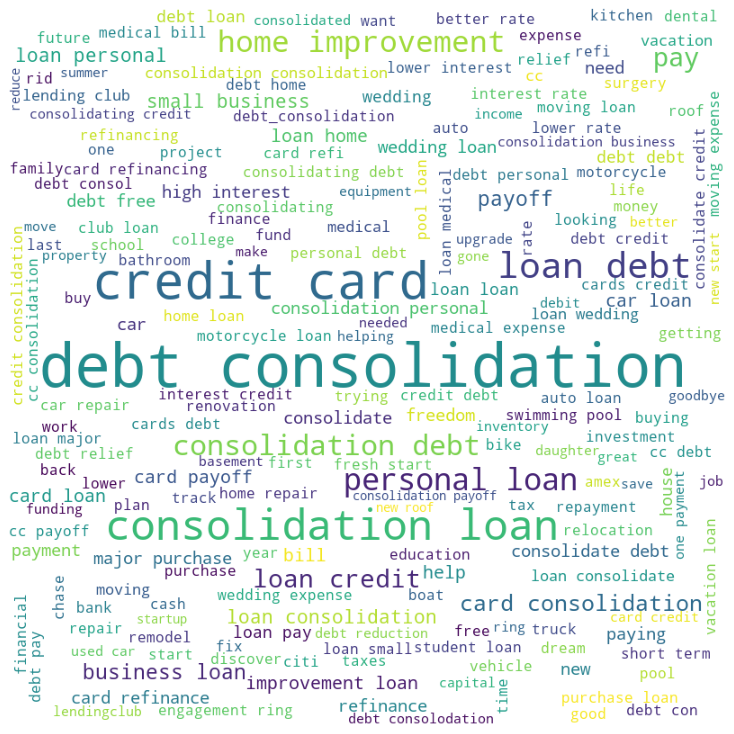

In [170]:
plt.figure(figsize = (10, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

1. We can see that debt consolidation is the most occouring term, and we had already captured this information with purpose column

### Variable: pub_rec_bankruptcy 

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

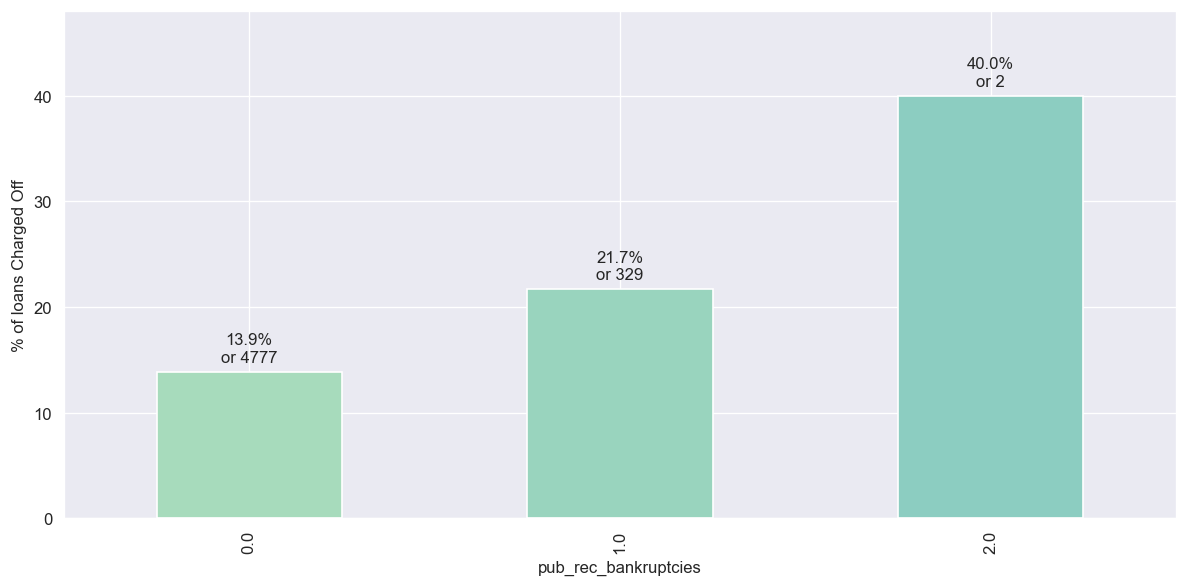

In [292]:
plt.figure(figsize=(10,5), dpi=120)
plotLoanStatus(master, 'pub_rec_bankruptcies')

1. mostly people don't have any previous bankruptcy

### Variable: pub_rec

C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pub_rec', ylabel='% of loans Charged Off'>

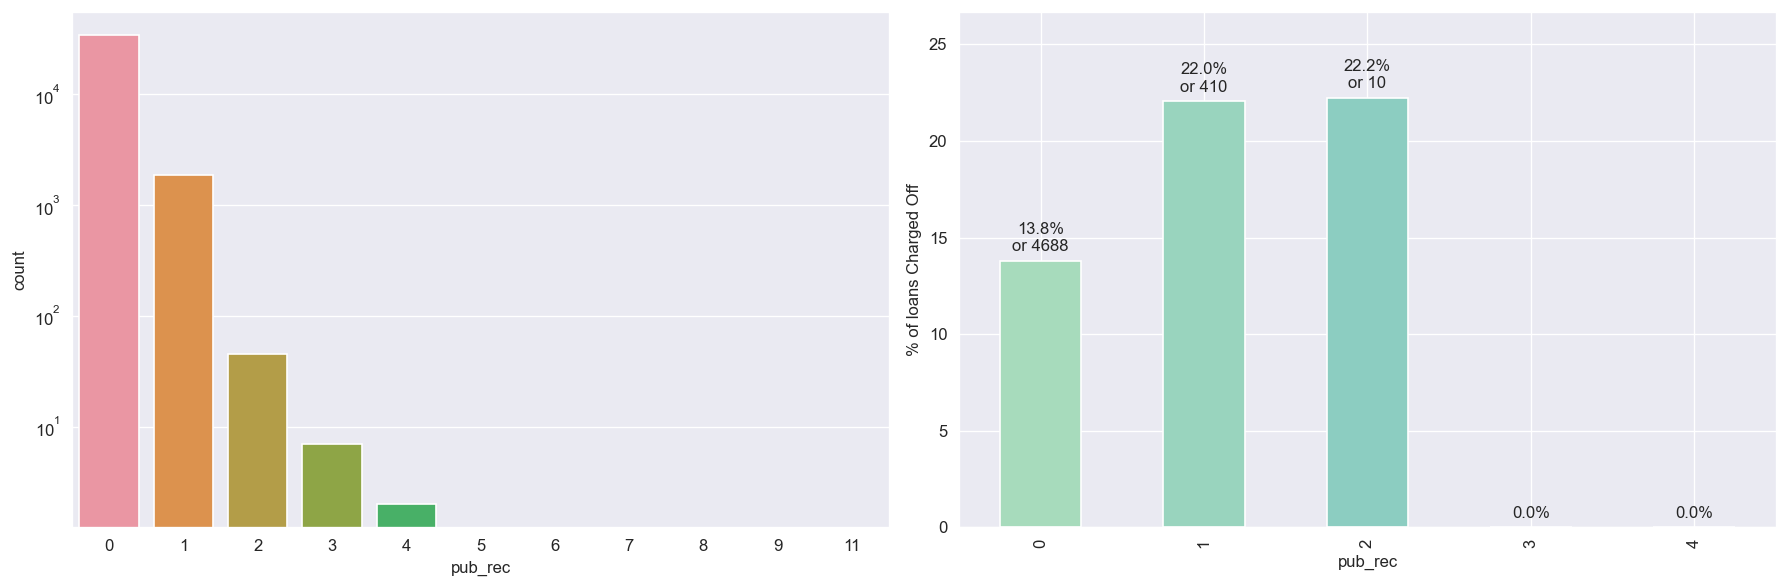

In [294]:
plt.figure(figsize=(15,5), dpi=120)
plt.subplot(1, 2, 1)
c=sns.countplot(master['pub_rec'], order=sorted(master.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(1, 2, 2)
plotLoanStatus(master, 'pub_rec')

1. 94% have no Public derogatory records. 5% have 1 derogatory record.
2. Having even 1 derogatory record increases the chances of Charge Off significantly.

### Variable: addr_state

C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'portion of Loans Charged-off')

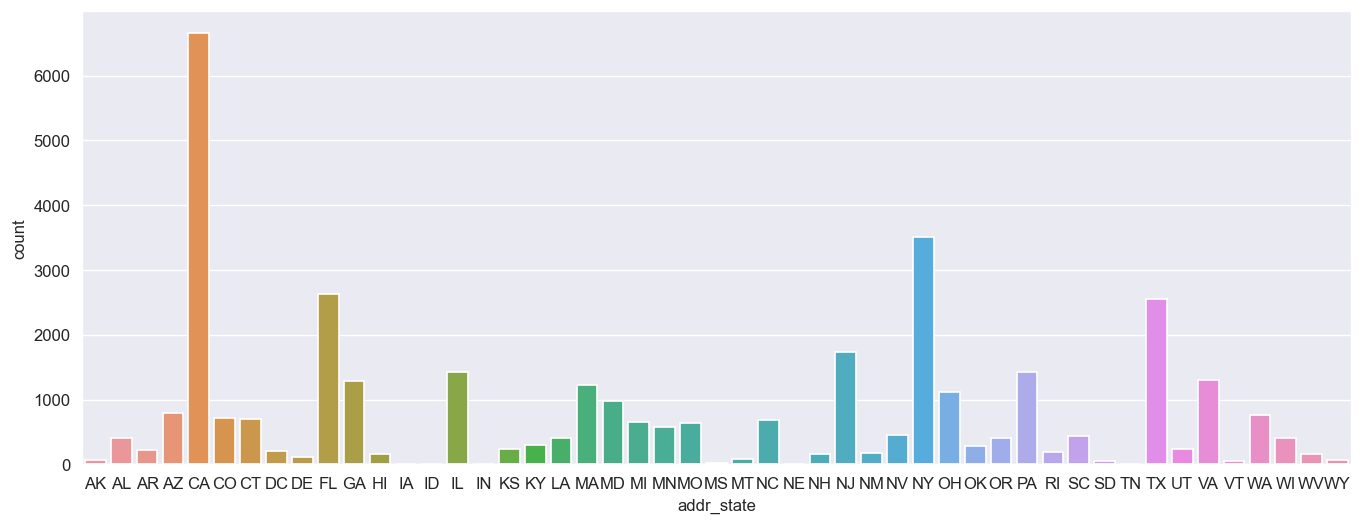

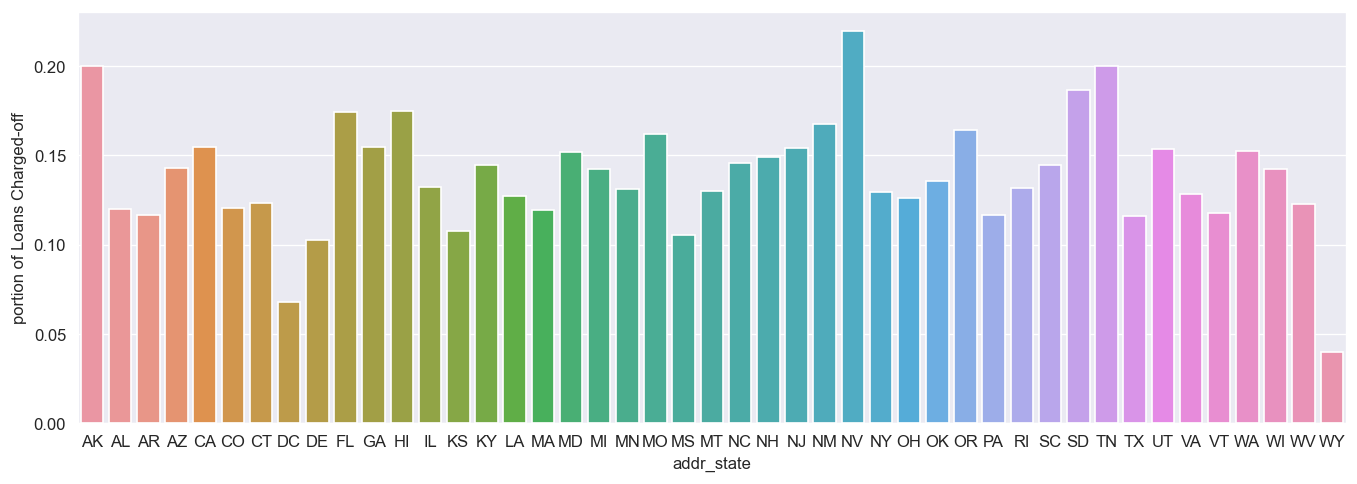

In [173]:
plt.figure(figsize=(30,5), dpi=120)
plt.subplot(1, 2, 1)
sns.countplot(master['addr_state'], order=sorted(master.addr_state.unique()))

#Fraction of loans charged off and fully Paid
charge_off_count = master.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = master.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  

plt.figure(figsize=(30,10), dpi=120)
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')


1. we can see that the states having the most population have the highest count of loans
2. The percentage of defaulters from states having low count of loans is higher so we should not focus on them

### Variable: Dti = a ration calculated using borrower total monthly debt payment on the local obligations, excluding mortgage and the requested LC loan, divided by borrower's self-reported monthly income 

C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1200x600 with 0 Axes>

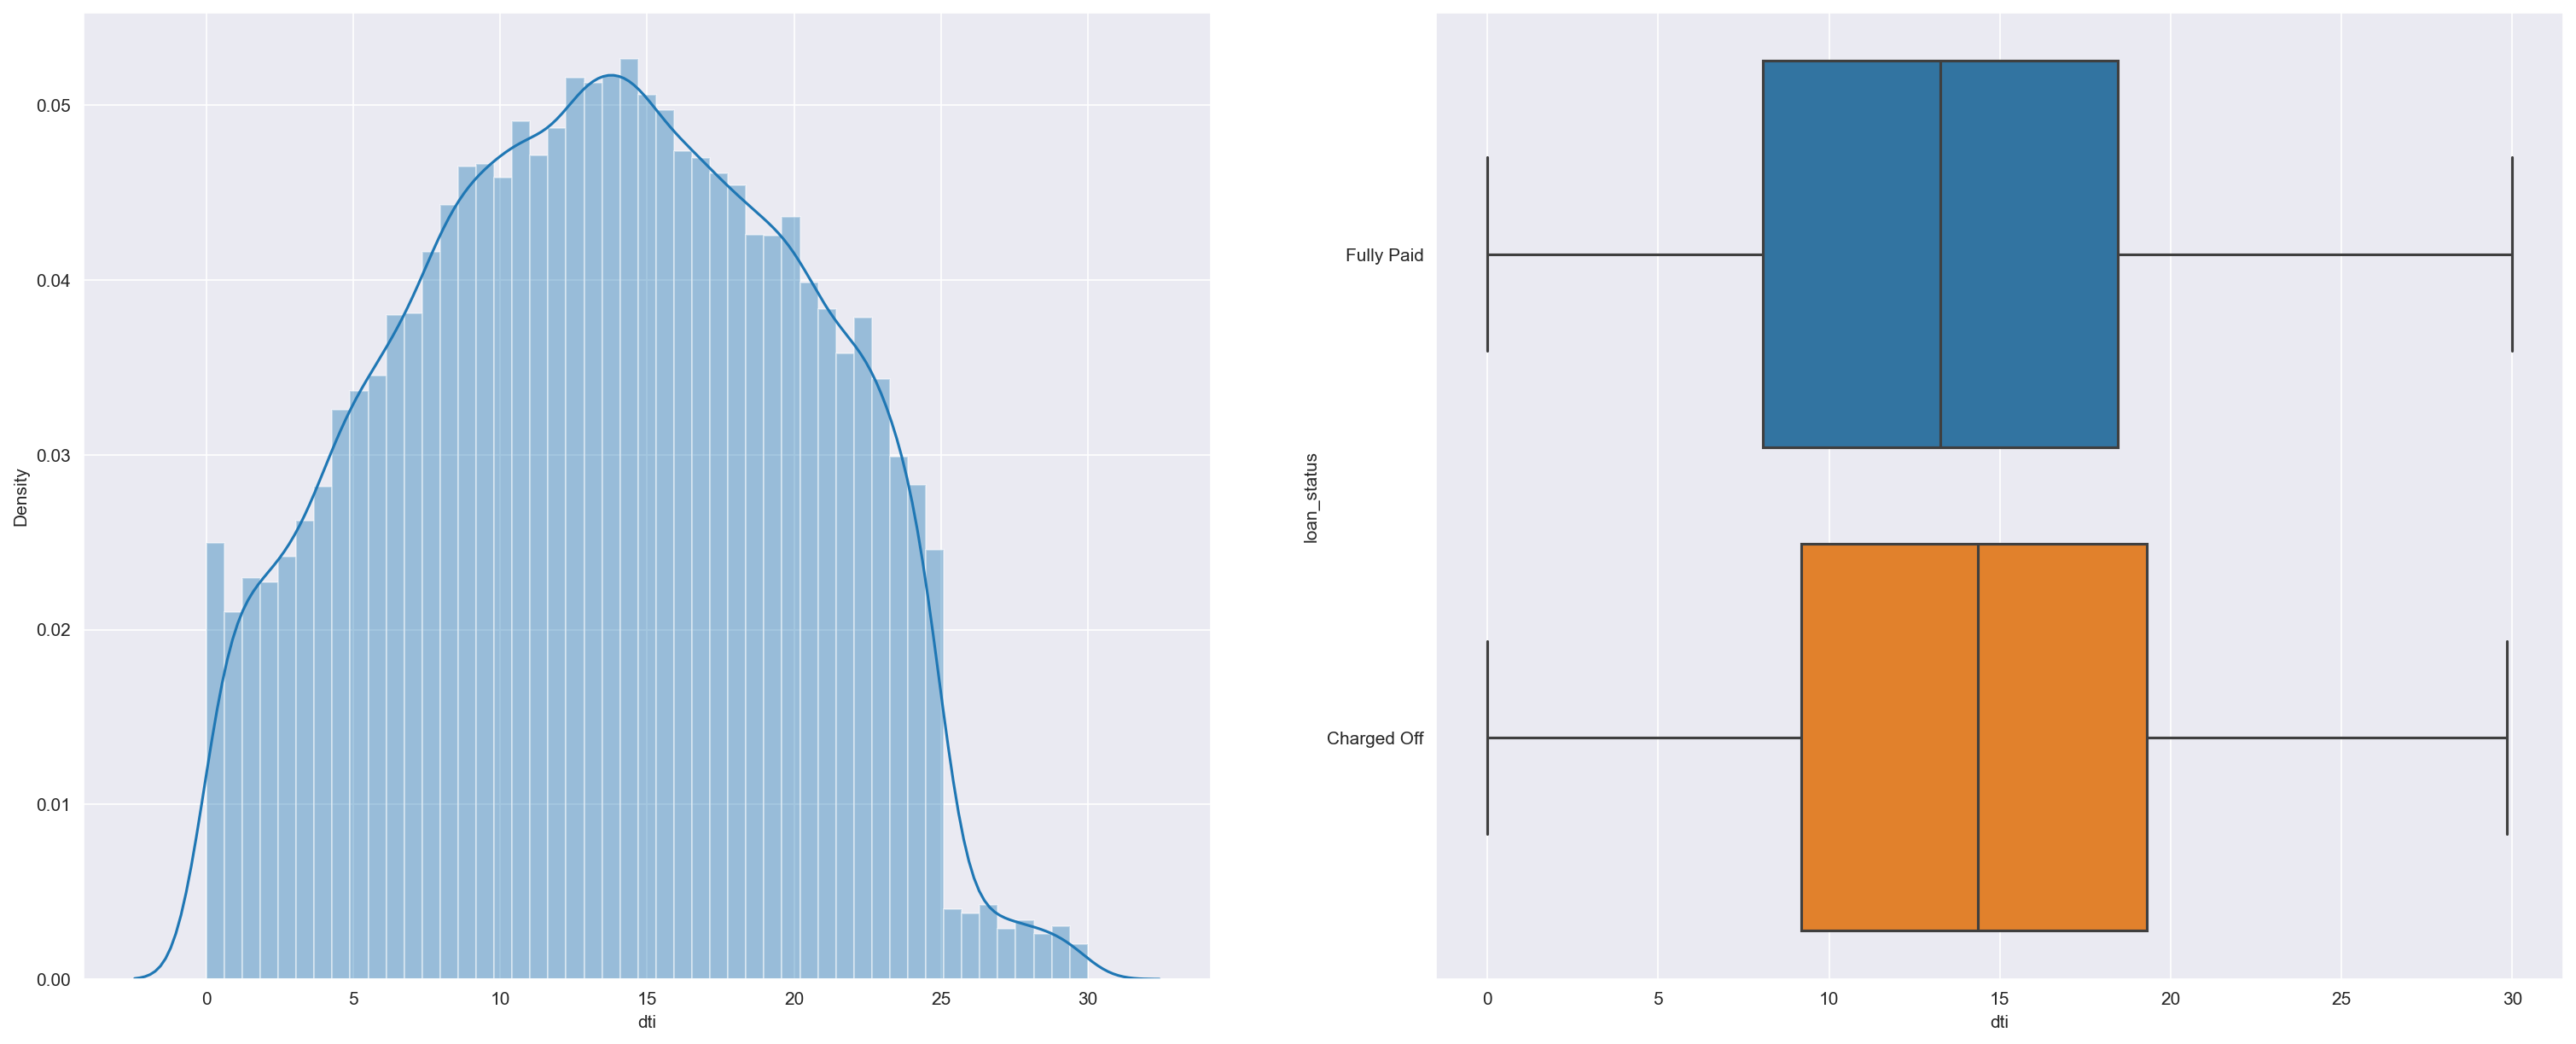

In [174]:
plt.figure(figsize=(10,5), dpi=120)
plot_distribution(master, 'dti')

In [175]:
master.dti.describe()

count    36727.000000
mean        13.337557
std          6.649275
min          0.000000
25%          8.220000
50%         13.430000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

we can see that the range of dti is 0-30

In [177]:
#  creating the bins for the dti with the range of 5
master['dti_bin'] =pd.cut(master['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

<AxesSubplot:xlabel='dti_bin', ylabel='% of loans Charged Off'>

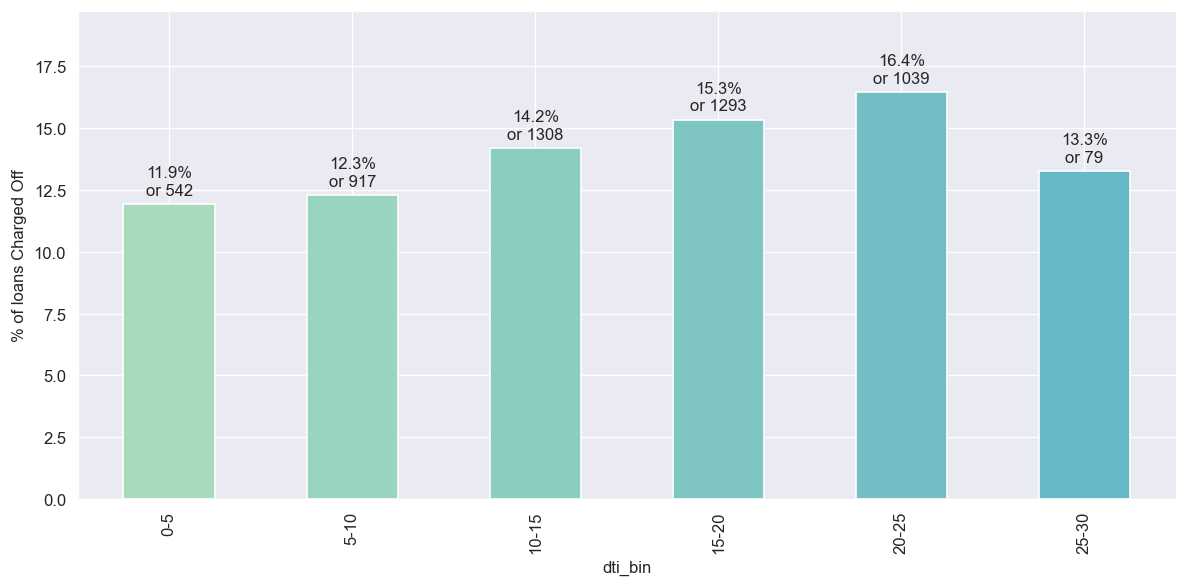

In [179]:
plt.figure(figsize=[10,5], dpi=120)
plotLoanStatus(master, 'dti_bin')

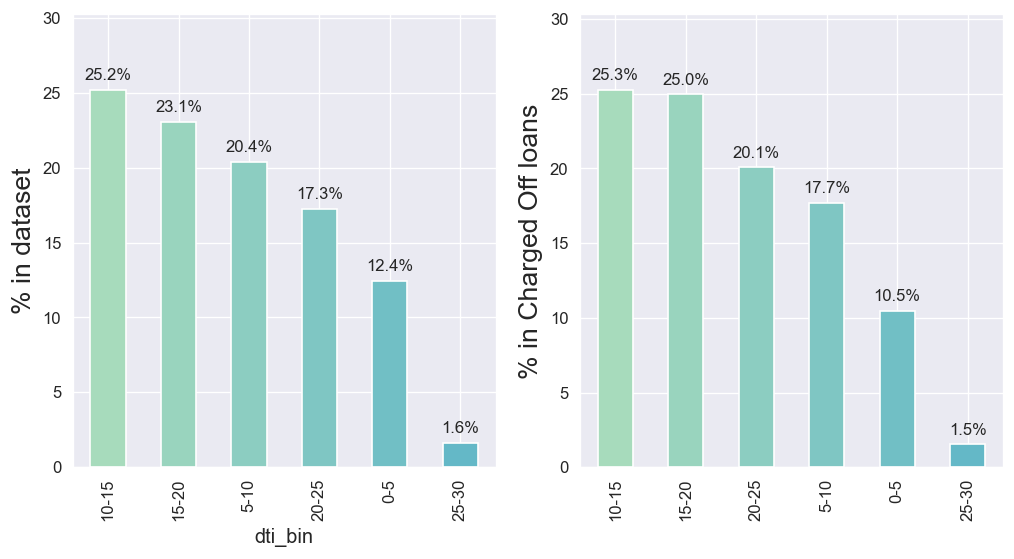

In [181]:
plt.figure(figsize=[10,5], dpi=120)
plot_percentages(master, 'dti_bin')

1. We can cleary see that the higher the dpi higher the charge off

### variable: revol_bal 

In [184]:
master.revol_bal.describe()

count     36727.000000
mean      13386.726958
std       15857.420519
min           0.000000
25%        3735.000000
50%        8881.000000
75%       17040.000000
max      149588.000000
Name: revol_bal, dtype: float64

We can see that there is outliers present in this

In [187]:
# keep only the ones that are within +3 to -3 standard deviations
master = master[np.abs(master.revol_bal-master.revol_bal.mean()) <= (3*master.revol_bal.std())]

In [188]:
master['revol_bal_log'] = master['revol_bal'].apply(lambda x : np.log(x+1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


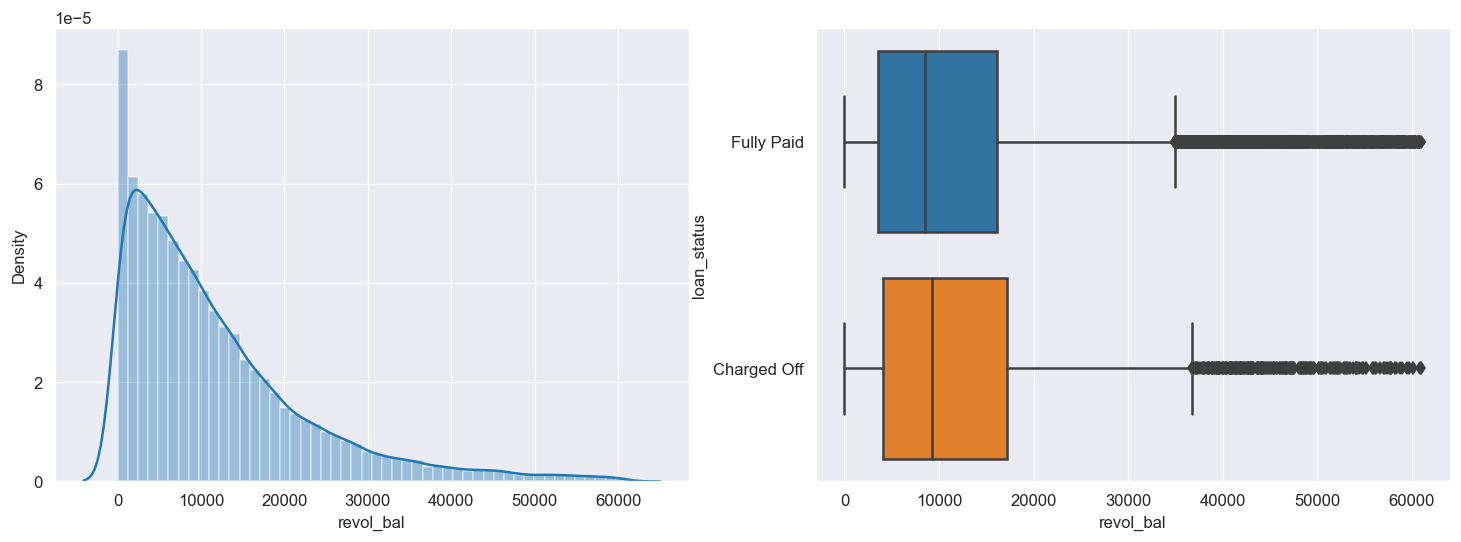

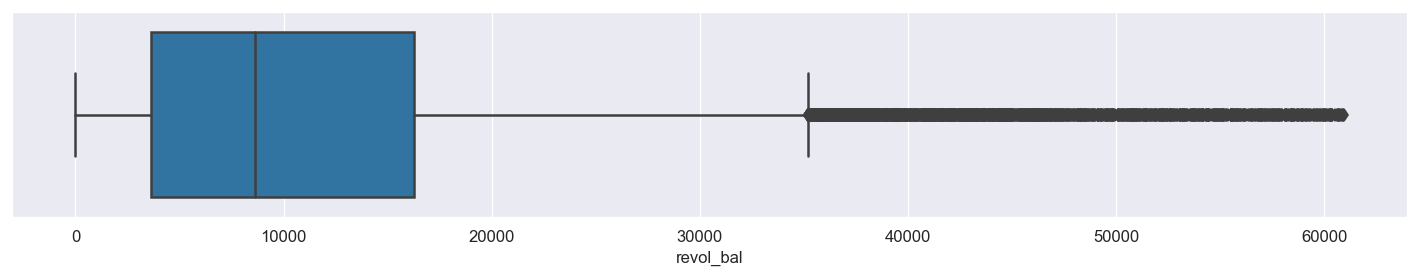

In [193]:
plt.figure(figsize=(15,5), dpi=120)

plt.subplot(1, 2, 1)
sns.distplot(master['revol_bal'])
plt.subplot(1, 2, 2)
sns.boxplot(x=master['revol_bal'], y=master['loan_status'], data=master)
#sns.barplot(x='loan_status', y='annual_inc_log',data= master_loan)
plt.show()
plt.figure(figsize=(15,5), dpi=120)

plt.subplot(2, 1, 1)
sns.boxplot(x=master['revol_bal'], data=master)
plt.show()

In [194]:
master.groupby('loan_status')['revol_bal'].describe()

count          mean           std  min     25%     50%  \
loan_status                                                             
Charged Off   5108.0  12392.771926  11339.743146  0.0  4049.5  9252.0   
Fully Paid   30813.0  11632.088210  11038.652373  0.0  3570.0  8531.0   

                 75%      max  
loan_status                    
Charged Off  17137.5  60936.0  
Fully Paid   16119.0  60914.0

1. There is no large difference in revolving balance mean for charged off an fully Paid loans

### Varibale: revol_util 

<AxesSubplot:title={'center':'revol_util'}, xlabel='loan_status'>

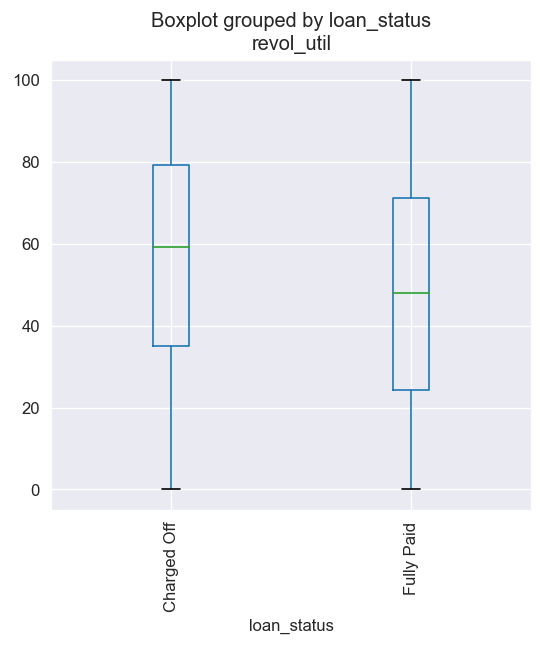

In [196]:
fig, ax = plt.subplots(figsize=(5,5), dpi=120)
df.boxplot(column=['revol_util'],by='loan_status', ax=ax, rot=90)

In [198]:
master.revol_util.describe()

count    35921.000000
mean        48.753900
std         28.291996
min          0.000000
25%         25.300000
50%         49.200000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64

In [199]:
master.groupby(['loan_status'])['revol_util'].describe()

count       mean        std  min   25%    50%   75%   max
loan_status                                                             
Charged Off   5108.0  55.880033  27.829984  0.0  34.8  59.05  79.0  99.9
Fully Paid   30813.0  47.572571  28.194796  0.0  24.0  47.60  70.7  99.9

1. We can see that the avg utilization rate is around 49% also utilization rate of Charged off is hugher than that of Fully Paid

In [201]:
master['revol_util_bin'] = round(master['revol_util']/5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[Text(0, 0, '0.0%'),
 Text(1, 0, '5.0%'),
 Text(2, 0, '10.0%'),
 Text(3, 0, '15.0%'),
 Text(4, 0, '20.0%'),
 Text(5, 0, '25.0%'),
 Text(6, 0, '30.0%'),
 Text(7, 0, '35.0%'),
 Text(8, 0, '40.0%'),
 Text(9, 0, '45.0%'),
 Text(10, 0, '50.0%'),
 Text(11, 0, '55.0%'),
 Text(12, 0, '60.0%'),
 Text(13, 0, '65.0%'),
 Text(14, 0, '70.0%'),
 Text(15, 0, '75.0%'),
 Text(16, 0, '80.0%'),
 Text(17, 0, '85.0%'),
 Text(18, 0, '90.0%'),
 Text(19, 0, '95.0%'),
 Text(20, 0, '100.0%')]

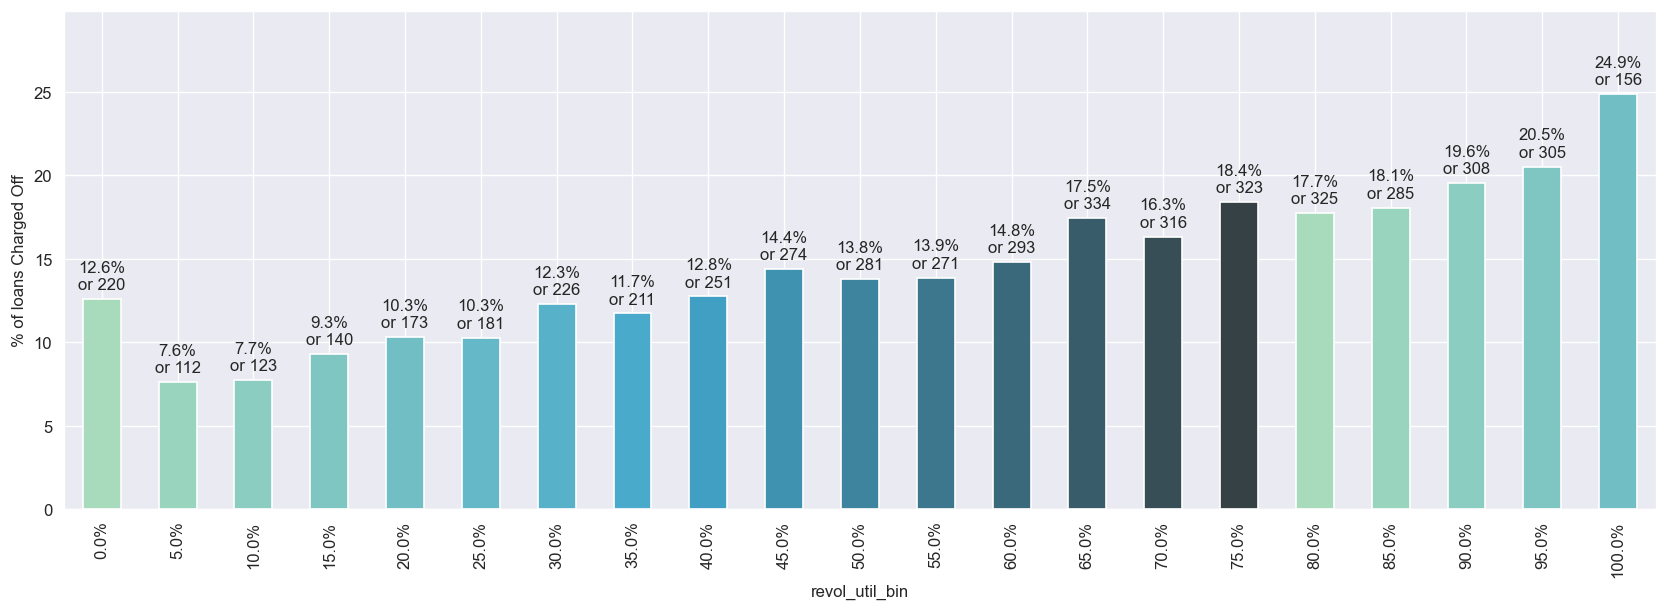

In [203]:
plt.figure(figsize=(14,5), dpi=120)
ax = plotLoanStatus(master, 'revol_util_bin')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])

1. we can cleary see that the utilization is directly propotional to defaulting on the loan

## We are not considering the loan status = current so for that reason we will drop out_prncp and out_prncp_inv 

In [205]:
master.drop(['out_prncp_inv','out_prncp'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Now we will drop some columns which we will not have during the time of giving the loan or they are too insignificant to do analysis on

In [209]:
master=master.drop(['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee'], axis=1)

In [210]:
master

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0           5000         5000           4975.0    36     10.65       162.87   
1           2500         2500           2500.0    60     15.27        59.83   
2           2400         2400           2400.0    36     15.96        84.33   
3          10000        10000          10000.0    36     13.49       339.31   
5           5000         5000           5000.0    36      7.90       156.46   
...          ...          ...              ...   ...       ...          ...   
37820       4800         4800           1100.0    36     10.28       155.52   
37821       7000         7000           1000.0    36     10.59       227.82   
37822       9000         9000            700.0    36     12.49       301.04   
37823      15450        15450            600.0    36     11.22       507.46   
37824       3000         3000            525.0    36     11.86        99.44   

      grade sub_grade  emp_length home_ownership  annual_inc  \
0         B        B2          10           RENT     24000.0   
1         C        C4           0           RENT     30000.0   
2         C        C5          10           RENT     12252.0   
3         C        C1          10           RENT     49200.0   
5         A        A4           3           RENT     36000.0   
...     ...       ...         ...            ...         ...   
37820     C        C1           1           RENT     35000.0   
37821     C        C2           3       MORTGAGE     63500.0   
37822     D        D3           8       MORTGAGE     39000.0   
37823     C        C4           2       MORTGAGE     40000.0   
37824     D        D1           2       MORTGAGE     36153.0   

      verification_status     issue_d  loan_status             purpose  \
0                Verified  2011-12-01   Fully Paid         credit_card   
1         Source Verified  2011-12-01  Charged Off                 car   
2            Not Verified  2011-12-01   Fully Paid      small_business   
3         Source Verified  2011-12-01   Fully Paid               other   
5         Source Verified  2011-12-01   Fully Paid             wedding   
...                   ...         ...          ...                 ...   
37820        Not Verified  2007-11-01   Fully Paid  debt_consolidation   
37821        Not Verified  2007-11-01   Fully Paid  debt_consolidation   
37822        Not Verified  2007-10-01  Charged Off  debt_consolidation   
37823        Not Verified  2007-08-01  Charged Off  debt_consolidation   
37824        Not Verified  2007-08-01   Fully Paid  debt_consolidation   

                                        title addr_state    dti  delinq_2yrs  \
0                                    Computer         AZ  27.65            0   
1                                        bike         GA   1.00            0   
2                        real estate business         IL   8.72            0   
3                                    personel         CA  20.00            0   
5       My wedding loan I promise to pay back         AZ  11.20            0   
...                                       ...        ...    ...          ...   
37820      Want to pay off high intrest cards         VA   7.51            0   
37821  Taking the First Step by Consolidating         AZ   8.50            0   
37822                            Pay off debt         MD   5.08            0   
37823    paying credit cards and doctor bill.         VA  13.50            0   
37824  Merging 2 Accounts into one to save $$         IN   7.47            0   

      earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0           1985-01-01               1         3        0      13648   
1           1999-04-01               5         3        0       1687   
2           2001-11-01               2         2        0       2956   
3           1996-02-01               1        10        0       5598   
5           2004-11-01               3         9        0       7963   
...    

## Variable (derived): ratio of loan amount to annual income 

In [211]:
master['ratio'] = master['loan_amnt'] * 10 / master['annual_inc']

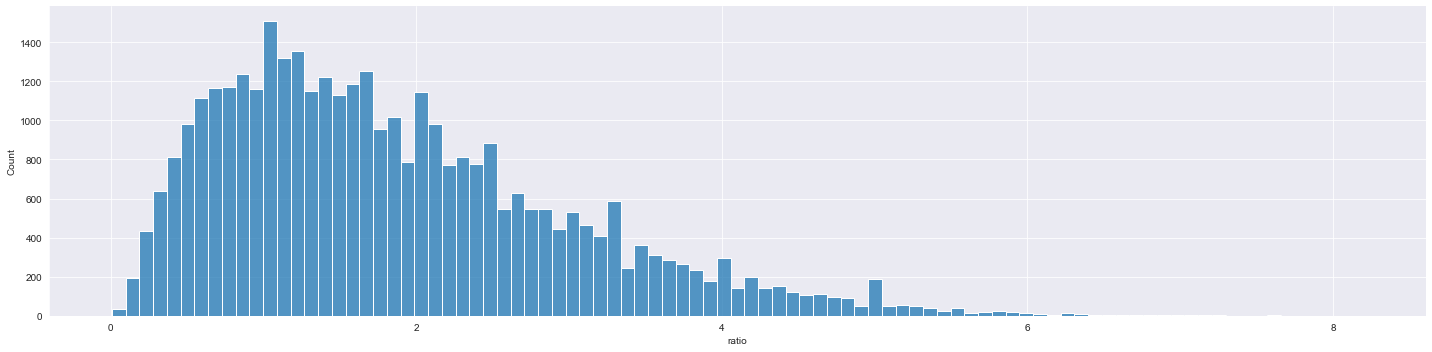

In [220]:
sns.displot(master.ratio, aspect=4)

In [221]:
master['ratio_bin'] = (master['ratio'].astype(int)) * 10

<AxesSubplot:xlabel='ratio_bin', ylabel='% of loans Charged Off'>

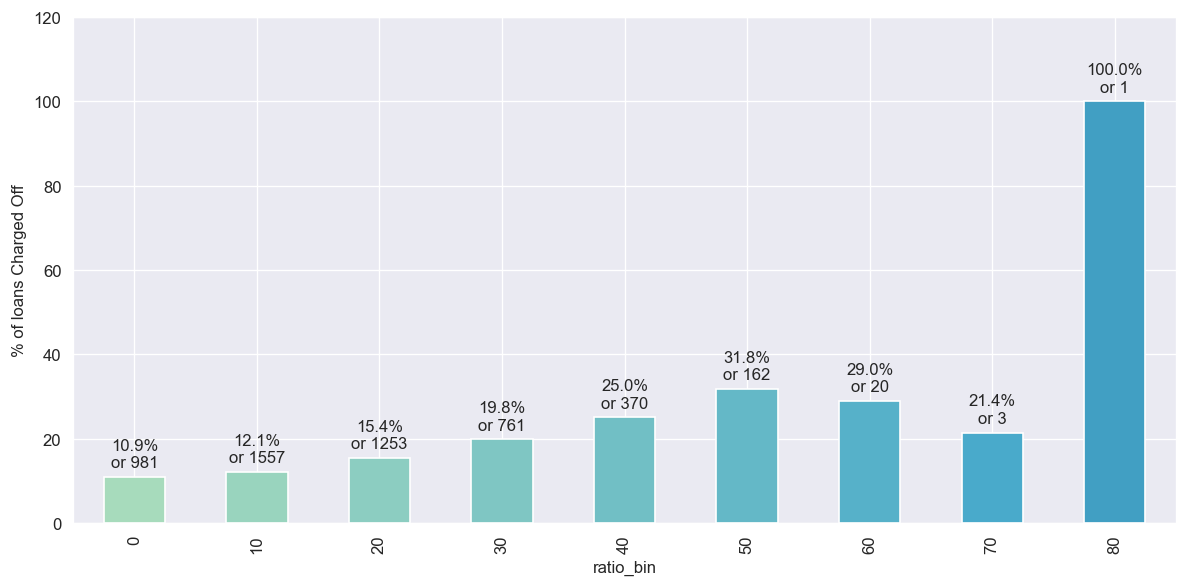

In [222]:
plt.figure(figsize=(10,5), dpi=120)
plotLoanStatus(master, 'ratio_bin')

1. The Loan amount should be less than 20% of total income

# BIVARIATE ANALYSIS

### variable: loan_amount and annual_inc 

C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


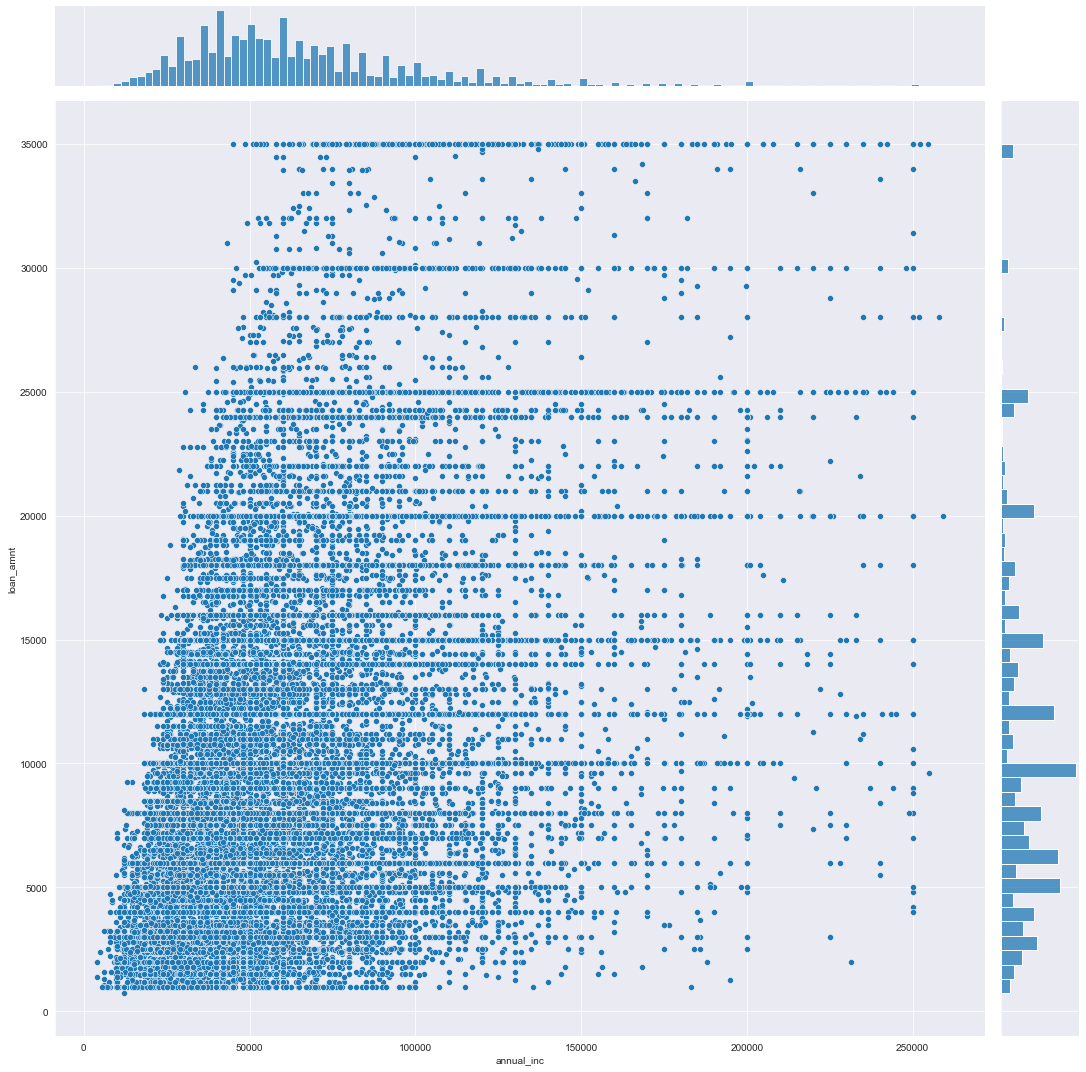

In [312]:
# plt.figure(figsize=[10,20], dpi=120)
sns.jointplot('annual_inc', 'loan_amnt', master.loc[master['annual_inc']<260000], height=15, ratio=10)

1. we can see that there are some people who have low annual income but still are taking loam of higher amount, these are risky loans

### loan_amnt vs over time and avg loan_amnt vs over time 

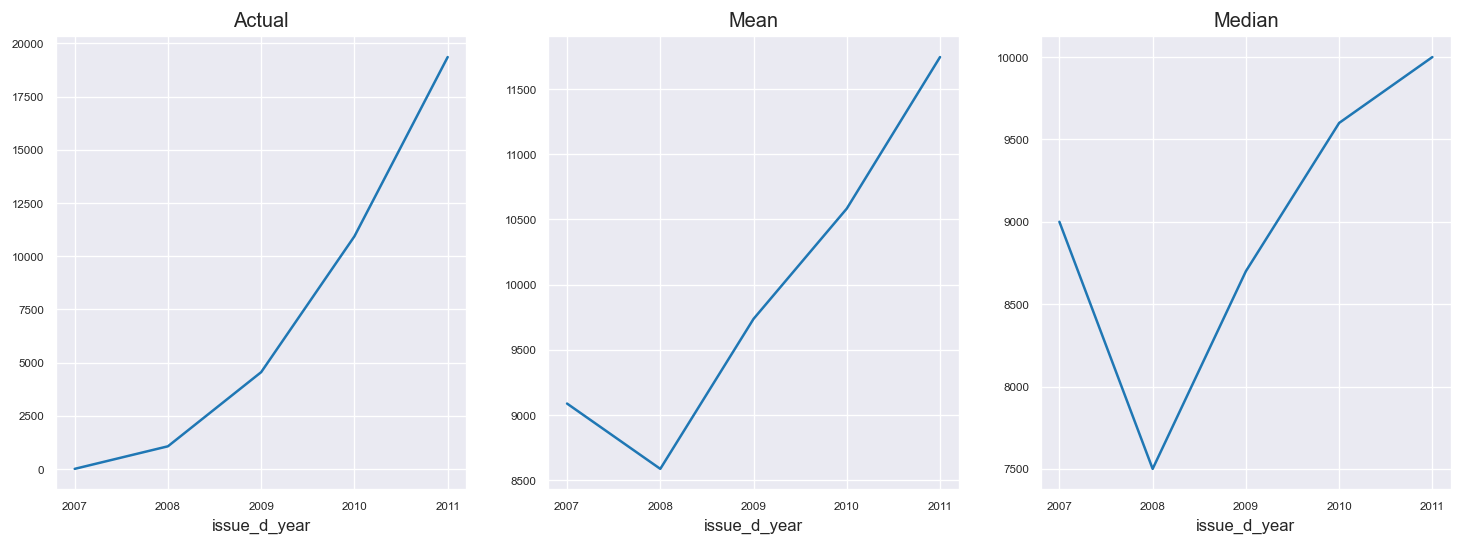

In [247]:
plt.figure(figsize=(15,5), dpi=120)
plt.subplot(1,3,1)
plt.title('Actual')
master.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.subplot(1,3,2)
plt.title('Mean')
master.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.subplot(1,3,3)
plt.title('Median')
master.groupby('issue_d_year').loan_amnt.median().plot(kind='line', fontsize=7)
plt.show()

1. We can clearly see that during the financial crises of 2008 the amount of loan issued significantly dropped down

### loan_amt vs Grade 

<AxesSubplot:title={'center':'loan_amnt'}, xlabel='grade'>

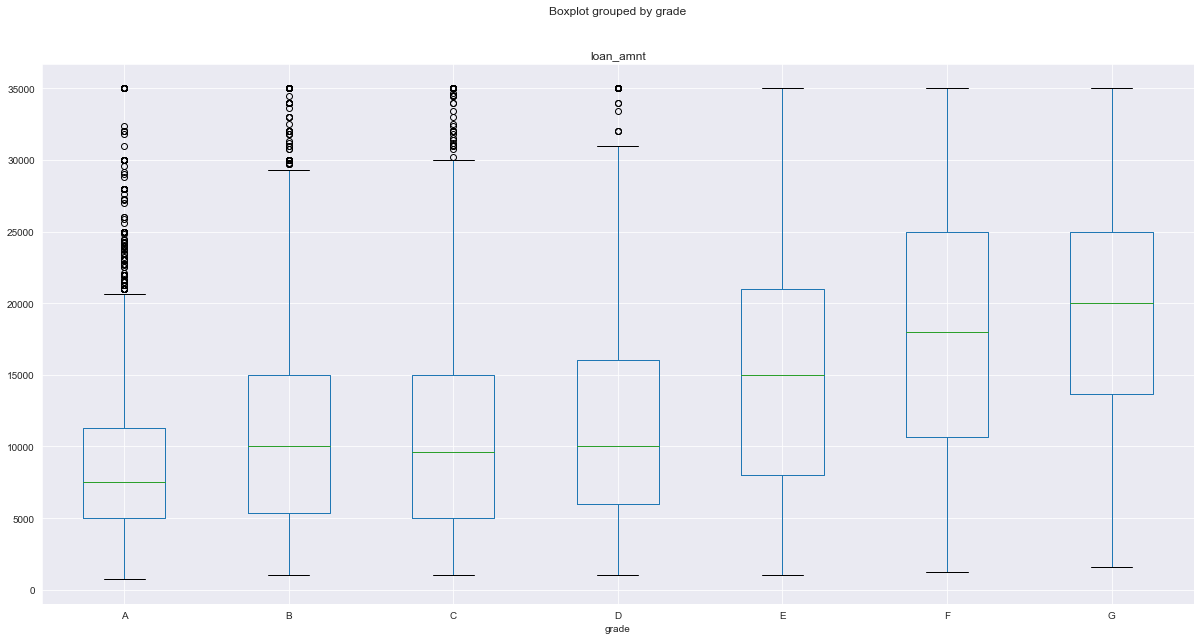

In [257]:
master.boxplot(column='loan_amnt', by='grade',figsize=[20,10])

1. The mean of grade G is the highest amont the all grades
2. G grade usually tend to default on the payment, that will explain this trend

### annual_inc vs grade 

<AxesSubplot:title={'center':'annual_inc'}, xlabel='grade'>

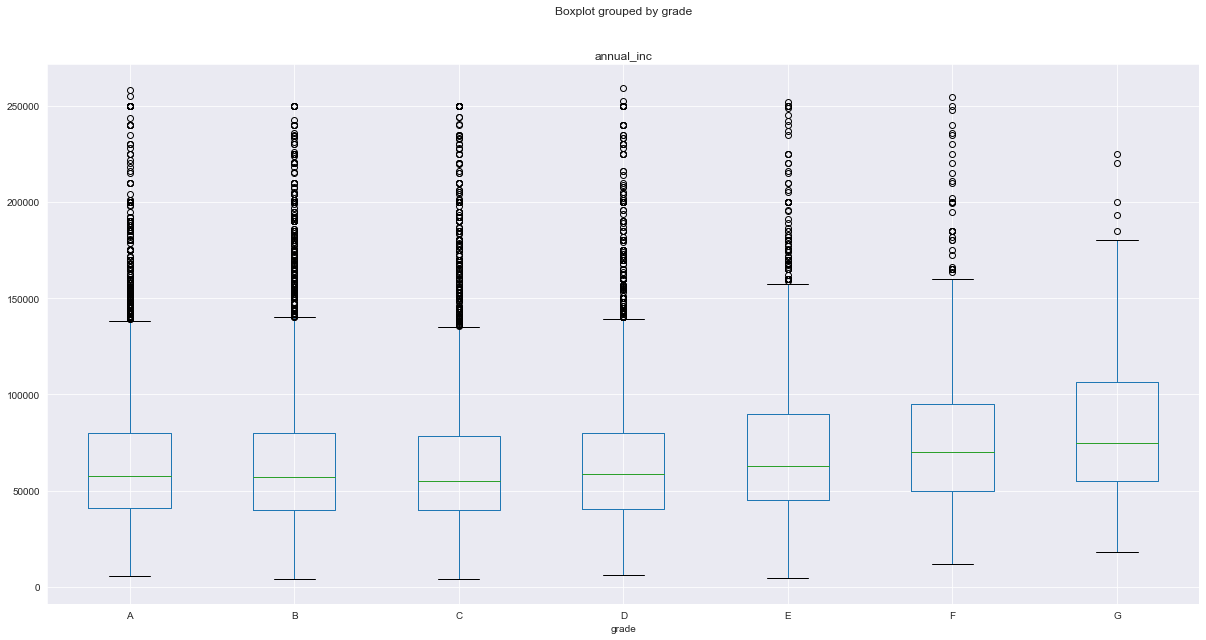

In [259]:
master.loc[master['annual_inc']<260000].boxplot(column='annual_inc', by='grade',figsize=[20,10])

1. We can see that grade G has the highest avg income but the number of people in G grade is low 

### intrest rate vs Term 

<AxesSubplot:title={'center':'int_rate'}, xlabel='term'>

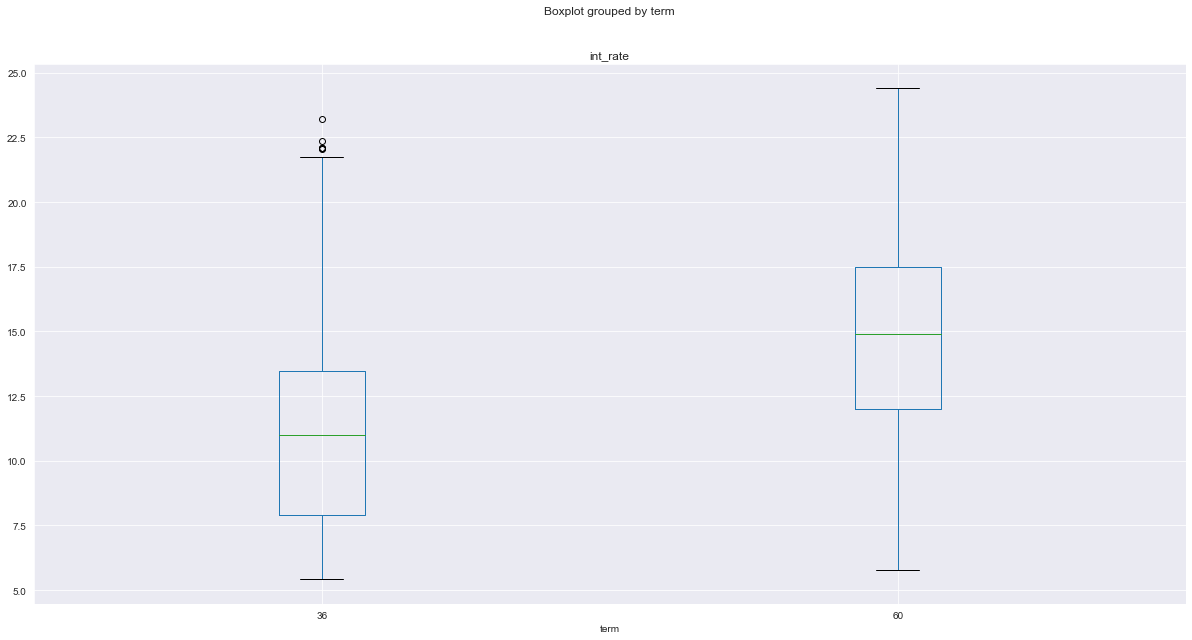

In [261]:
master.boxplot(column='int_rate', by='term',figsize=[20,10])

1. It is quite a natural trend as the intrest rate is directly propotional to the term so higher the term higher will be the intrest rate

### income_rate vs sub_grade

<AxesSubplot:title={'center':'int_rate'}, xlabel='sub_grade'>

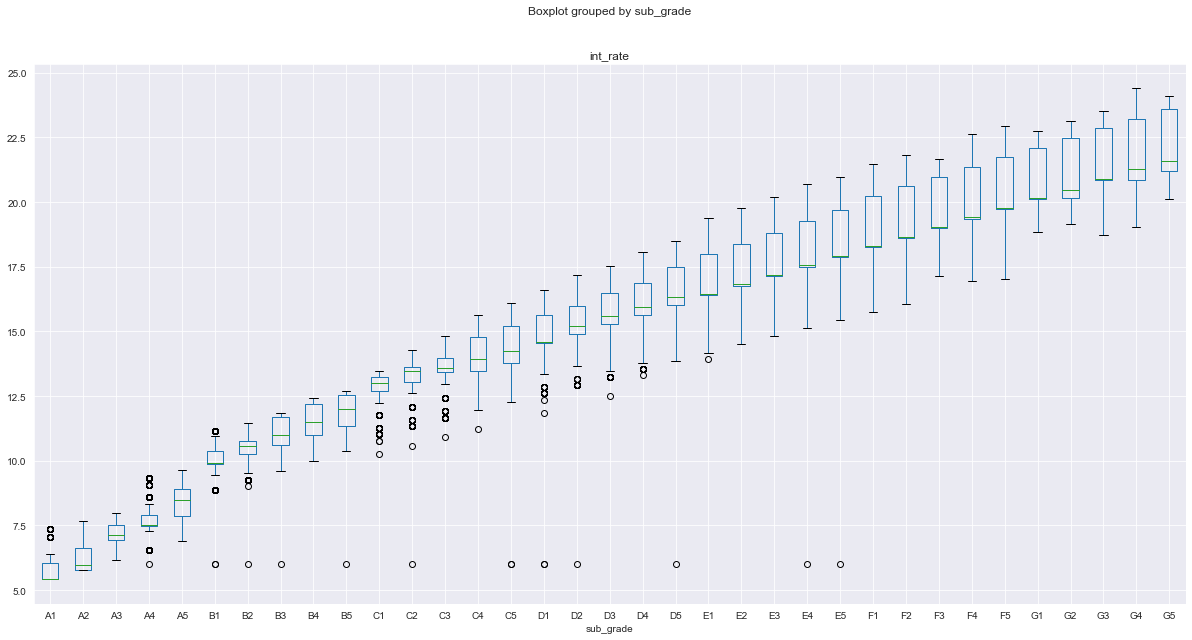

In [263]:
master.boxplot(column='int_rate', by='sub_grade',figsize=[20,10])

1. the amont of intrest reate is directly to the sub-grade, worst the or higher the sub grade more the amount of intrest

### intrest rate vs loan status 

<AxesSubplot:title={'center':'int_rate'}, xlabel='loan_status'>

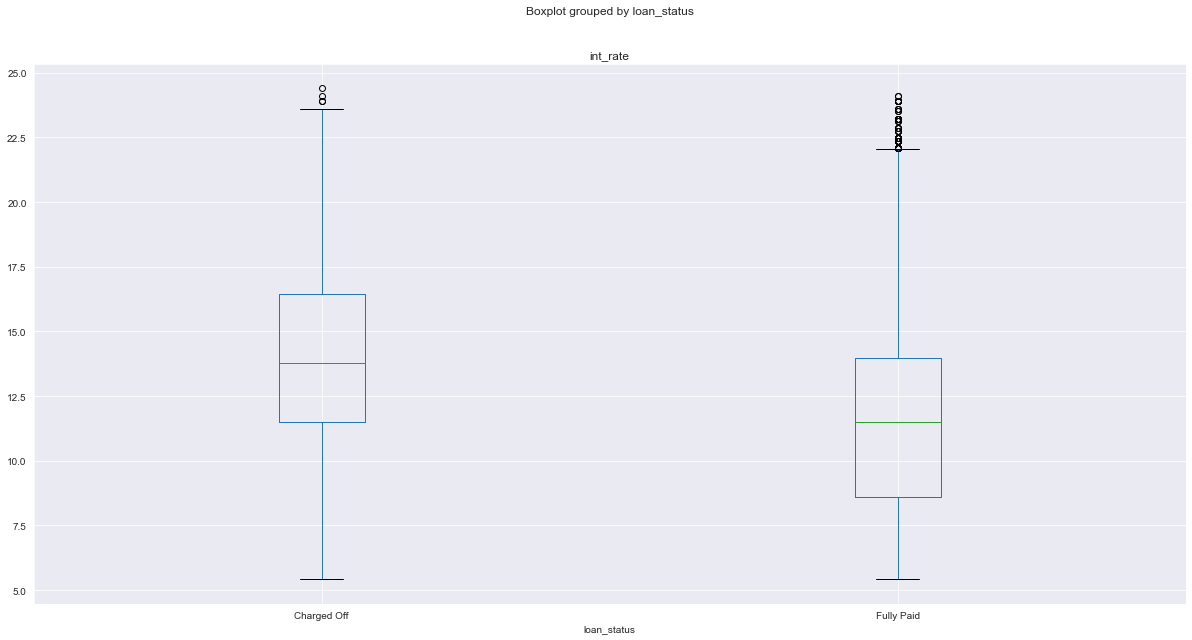

In [266]:
master.boxplot(column='int_rate', by = 'loan_status', figsize=[20,10])

1. Higher the intrest rate, higher the chances it will be charged off

### revol_util vs int_rate 

C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


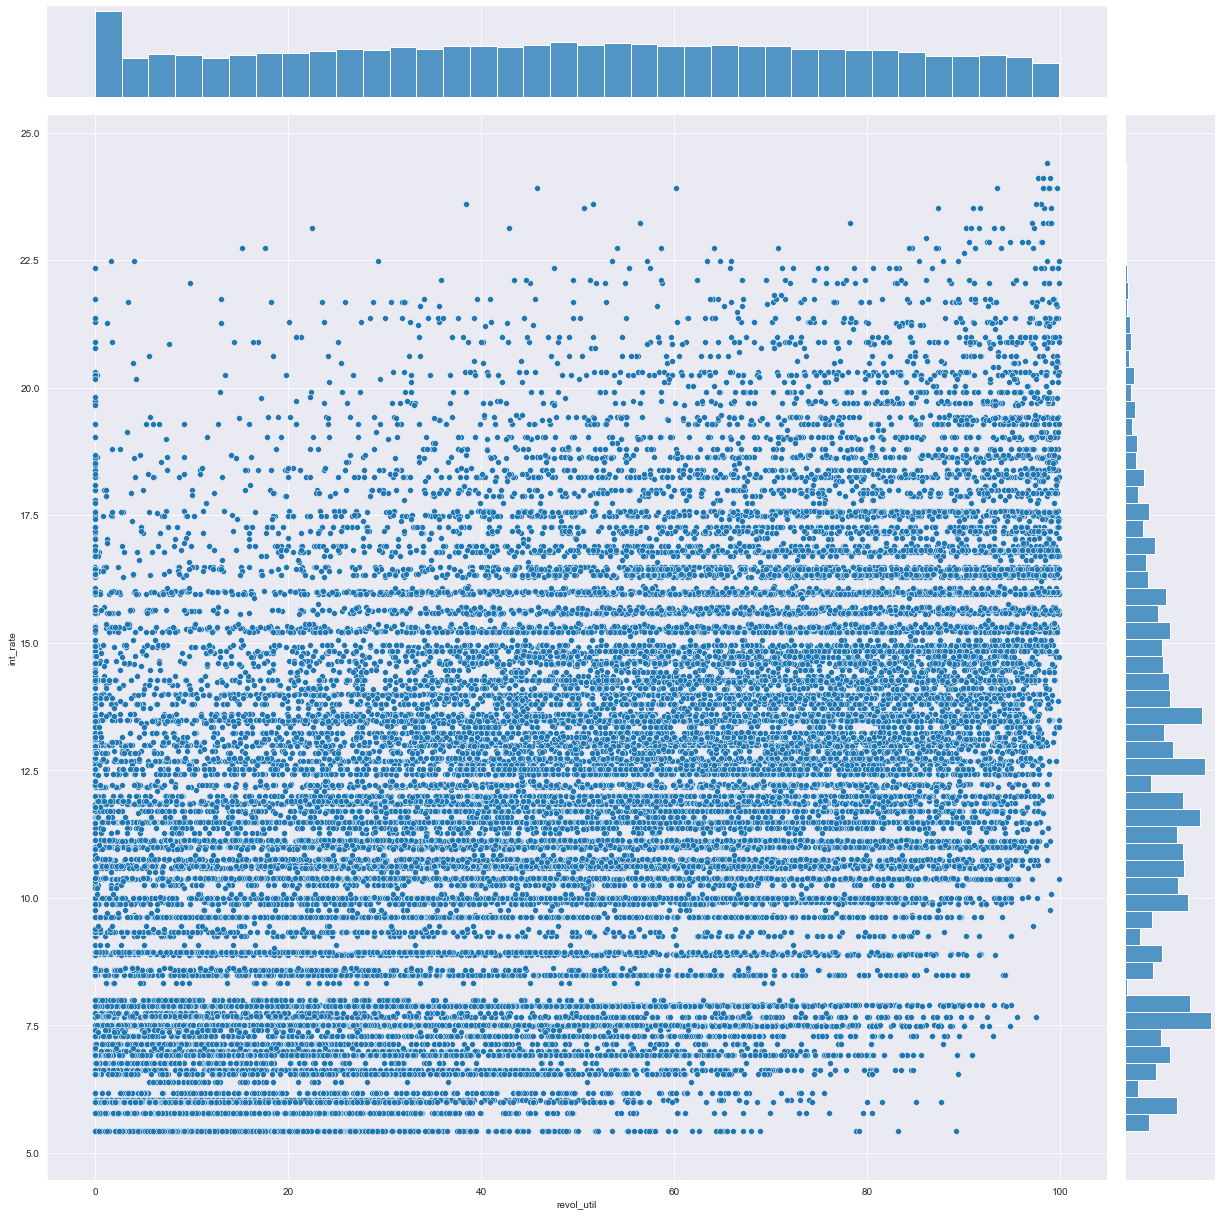

In [297]:
sns.jointplot('revol_util', 'int_rate', master ,height=17, ratio=10)

1. Nothing conclusive

### loan_amnt vs   revol_util 

C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


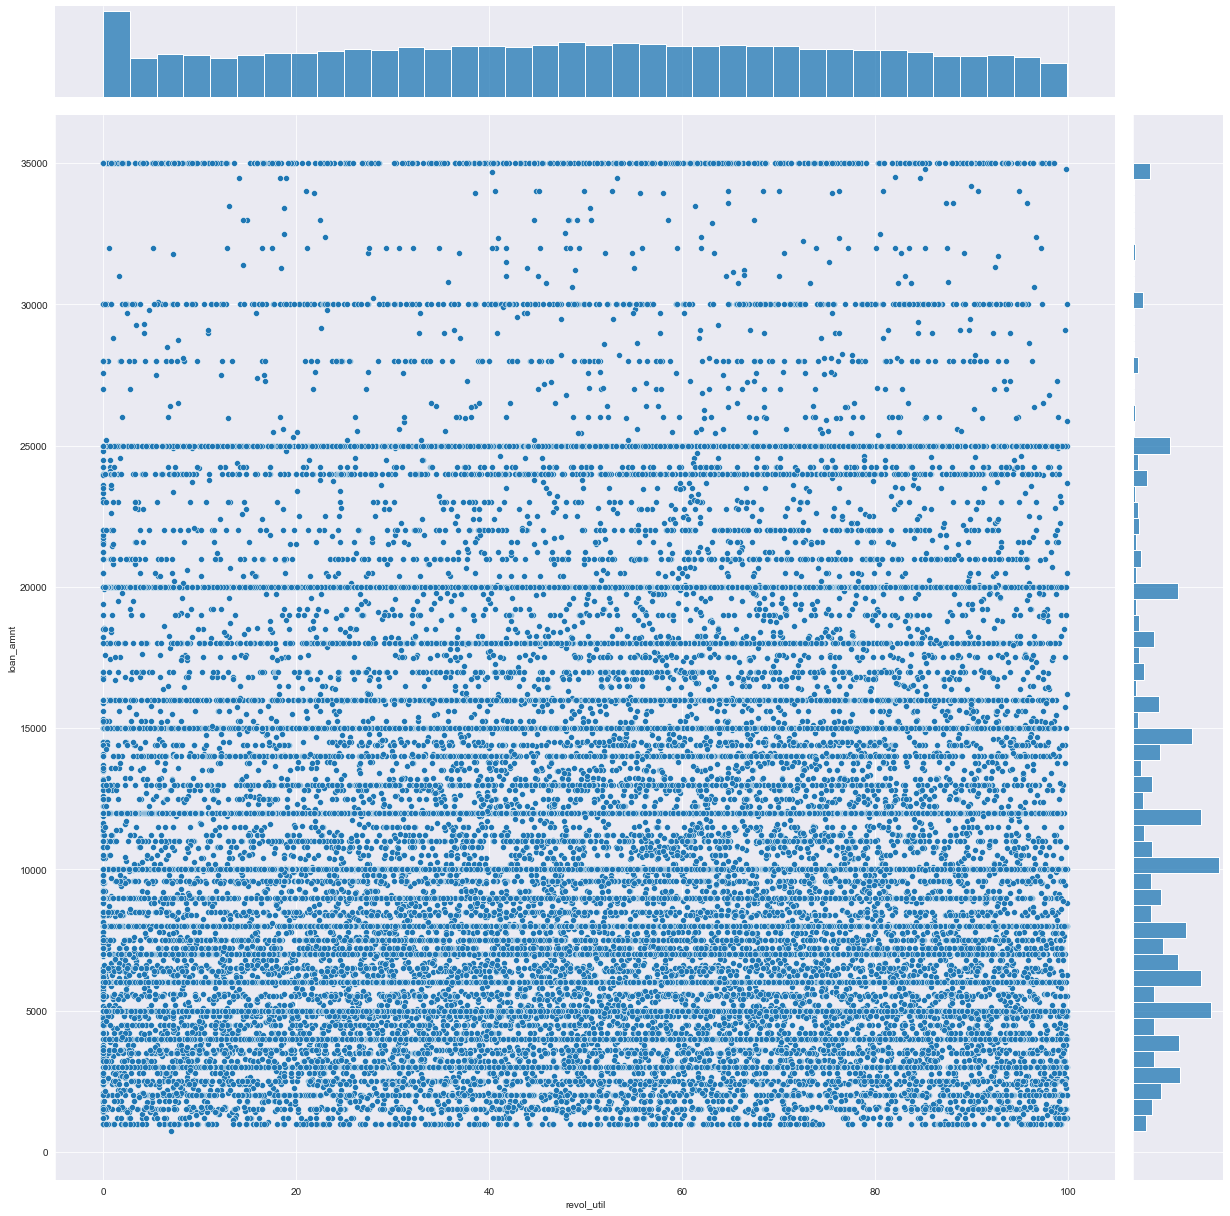

In [303]:
sns.jointplot('revol_util', 'loan_amnt', master ,height=17, ratio=10)

### loan_amt vs int_rate ( with people having public bankruptcy record)

C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


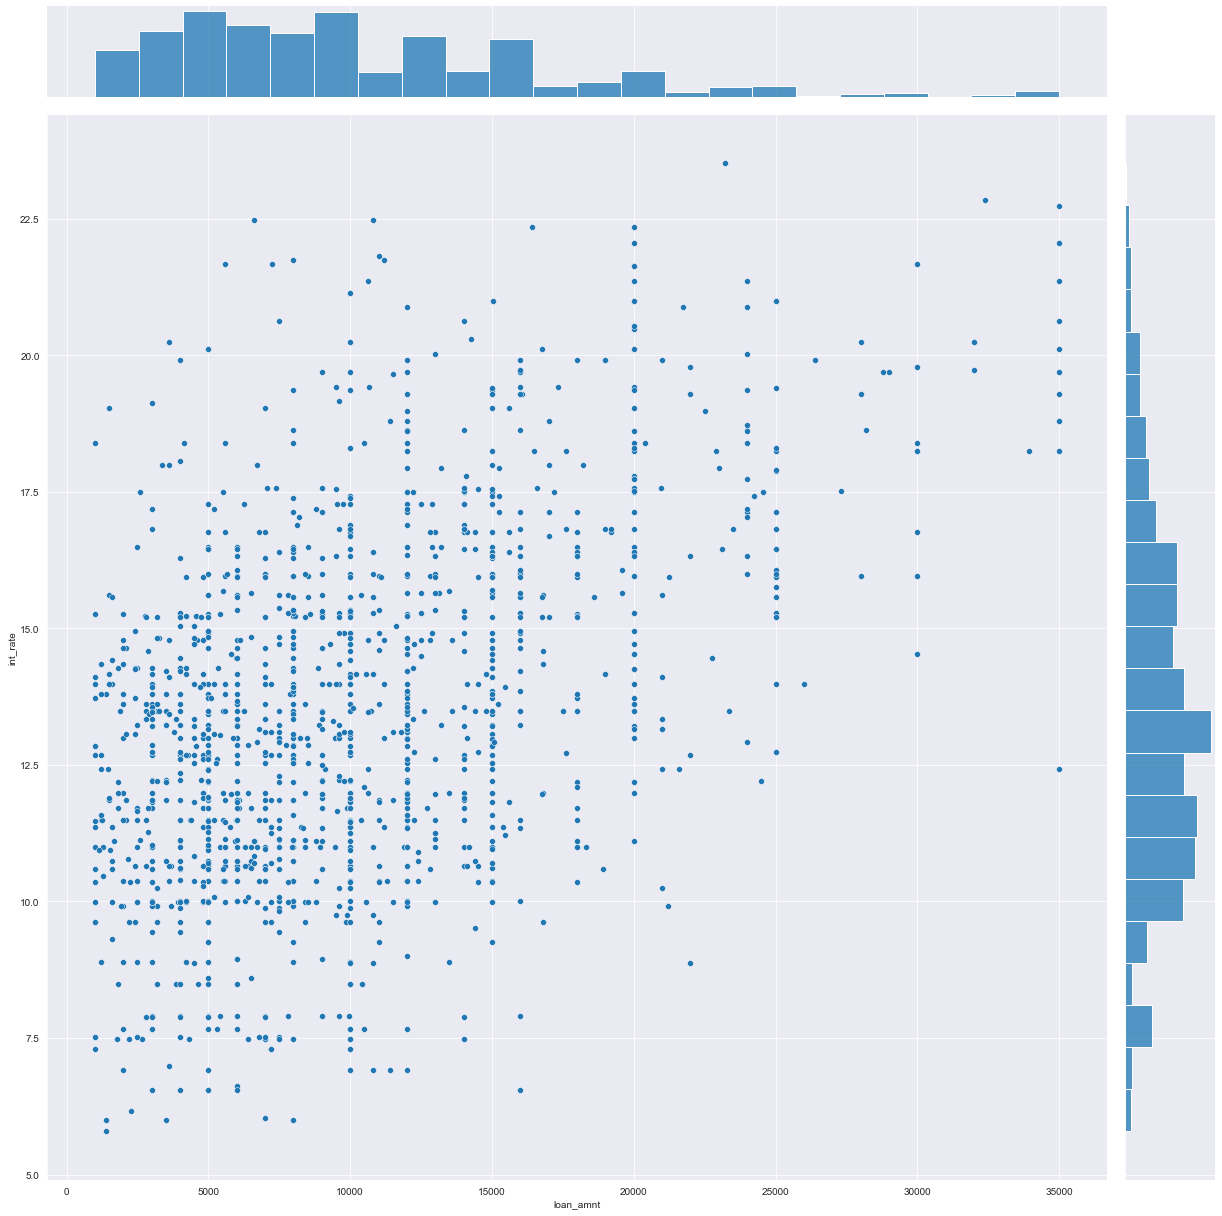

In [298]:
sns.jointplot('loan_amnt', 'int_rate', master.loc[master.pub_rec_bankruptcies > 0] ,height=17, ratio=10)

### loan_amt vs int_rate ( with people having public  record)

C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


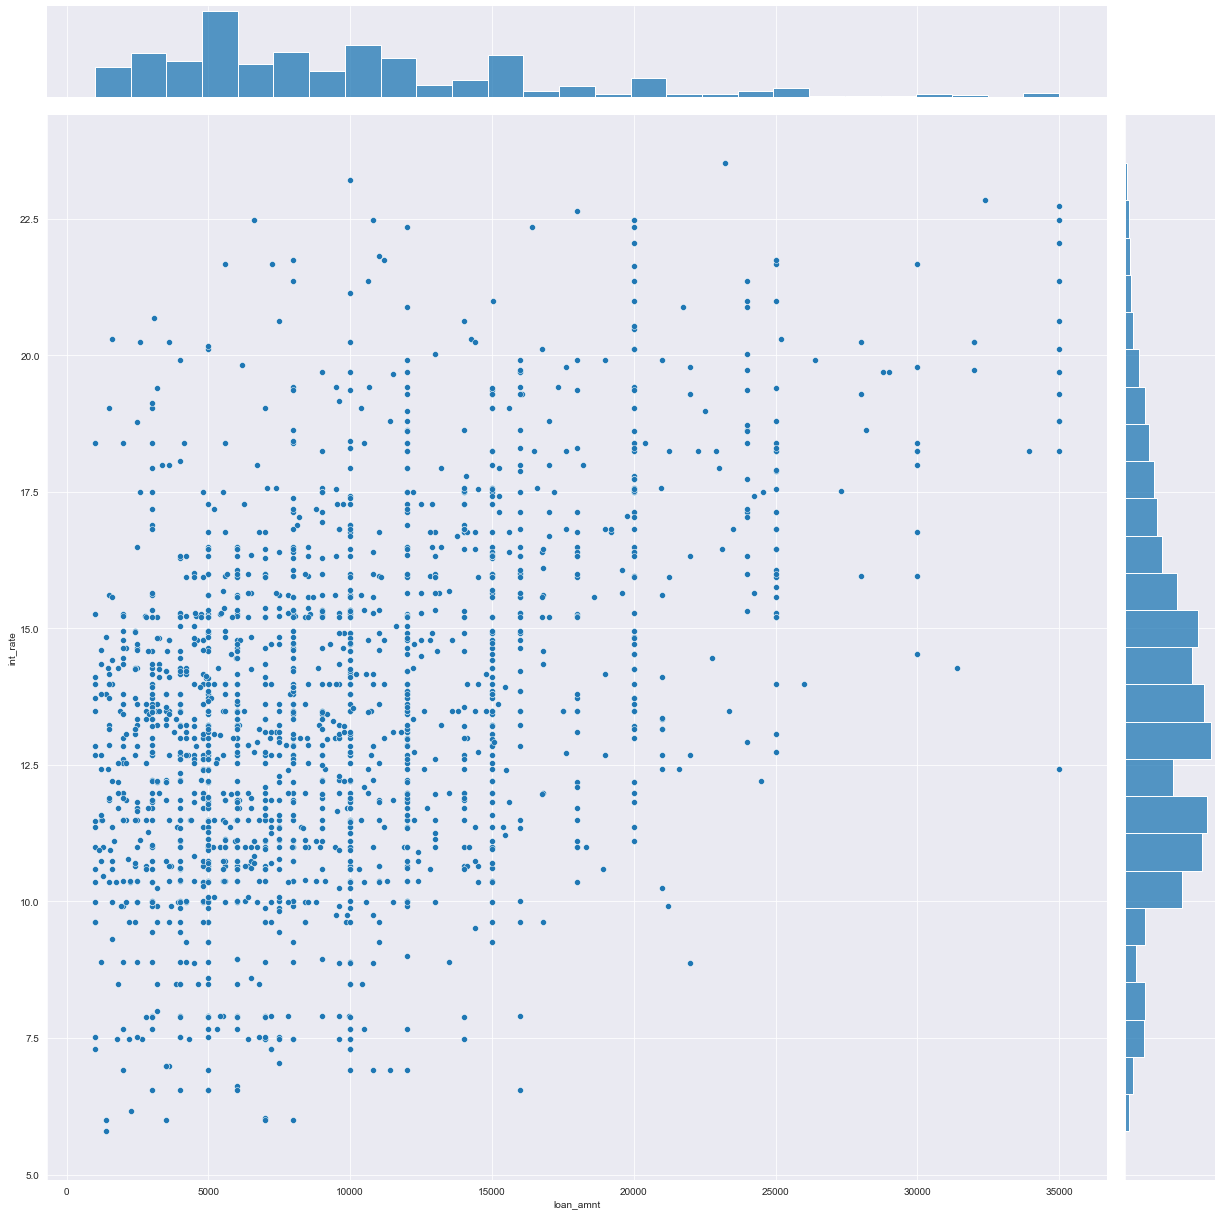

In [300]:
sns.jointplot('loan_amnt', 'int_rate', master.loc[master.pub_rec > 0] ,height=17, ratio=10)

### Dti vs int_rate 

C:\Users\sameer\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


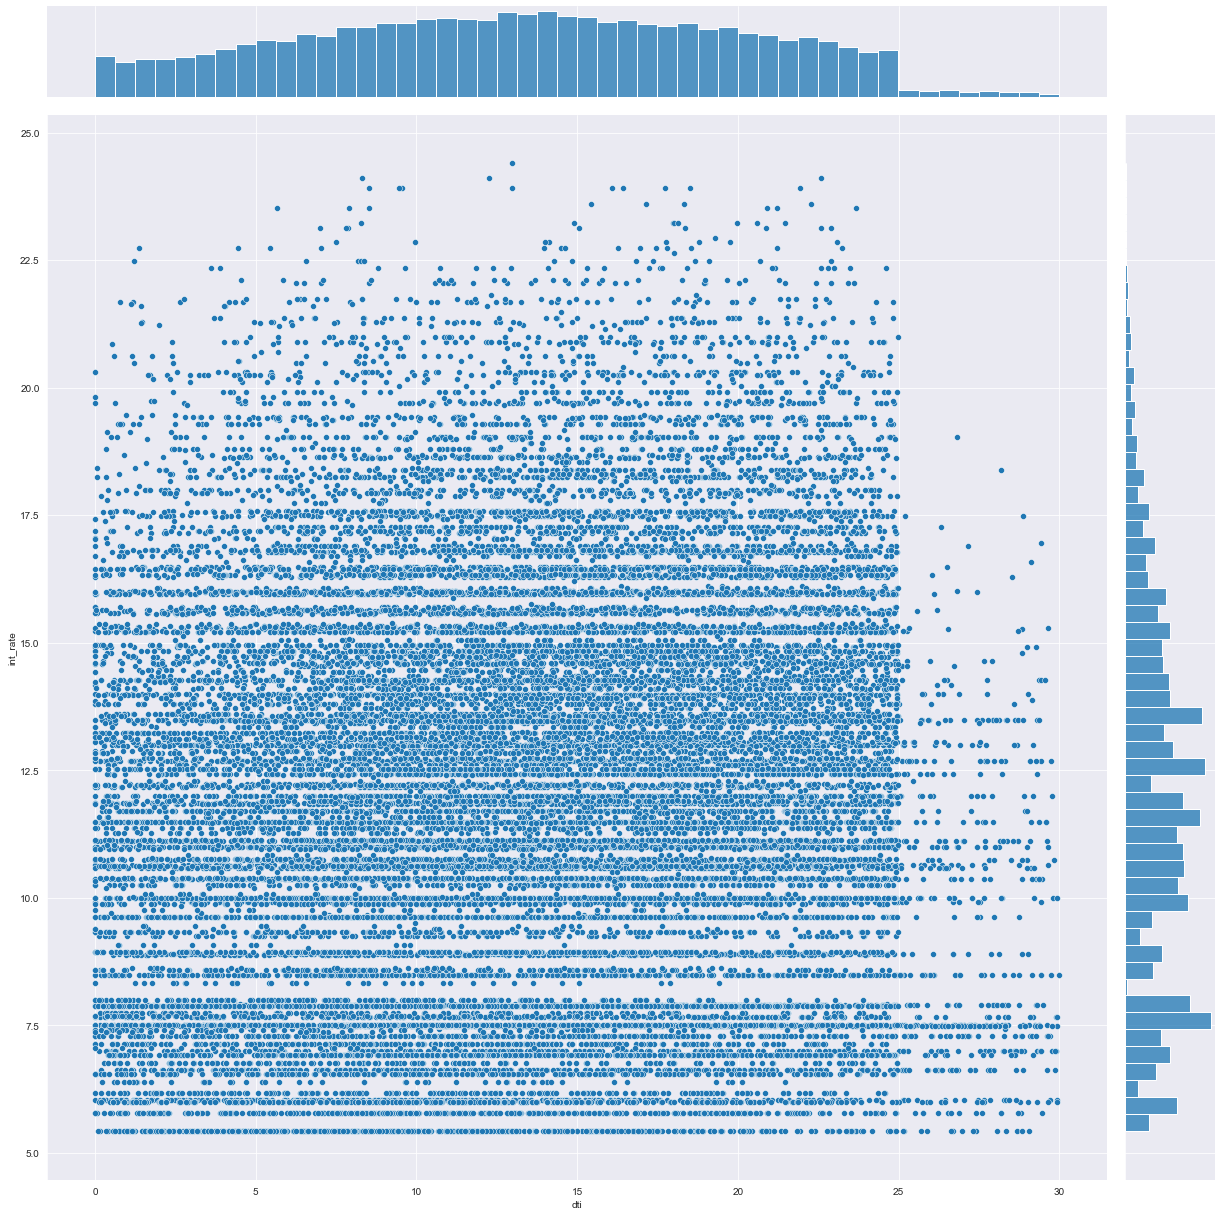

In [301]:
sns.jointplot('dti', 'int_rate', master ,height=17, ratio=10)

### revol_util vs Grade 

<AxesSubplot:title={'center':'revol_util'}, xlabel='grade'>

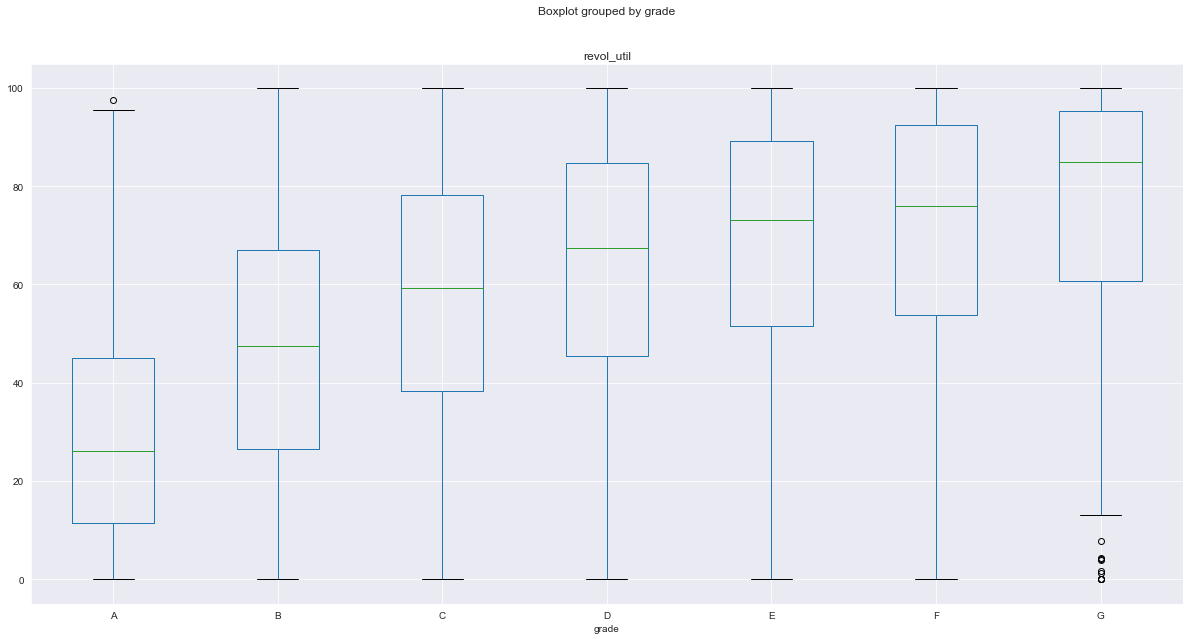

In [289]:
master.boxplot(column='revol_util', by = 'grade', figsize=[20,10])

### loan_amnt vs verification_status vs loan_status 

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

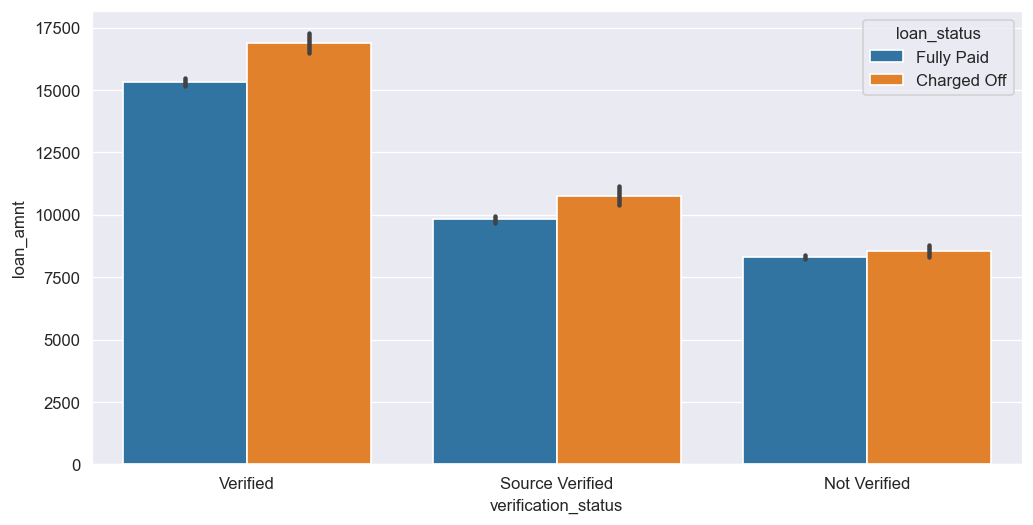

In [273]:
ax = plt.figure(figsize=[10,5], dpi=120)
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=master, estimator=np.mean)

1. We can clearly see that loans which are high, mostly are verified

### Loan amount vs Term vs Grade & Loan amount vs Term vs sub-Grade

<AxesSubplot:xlabel='sub_grade', ylabel='loan_amnt'>

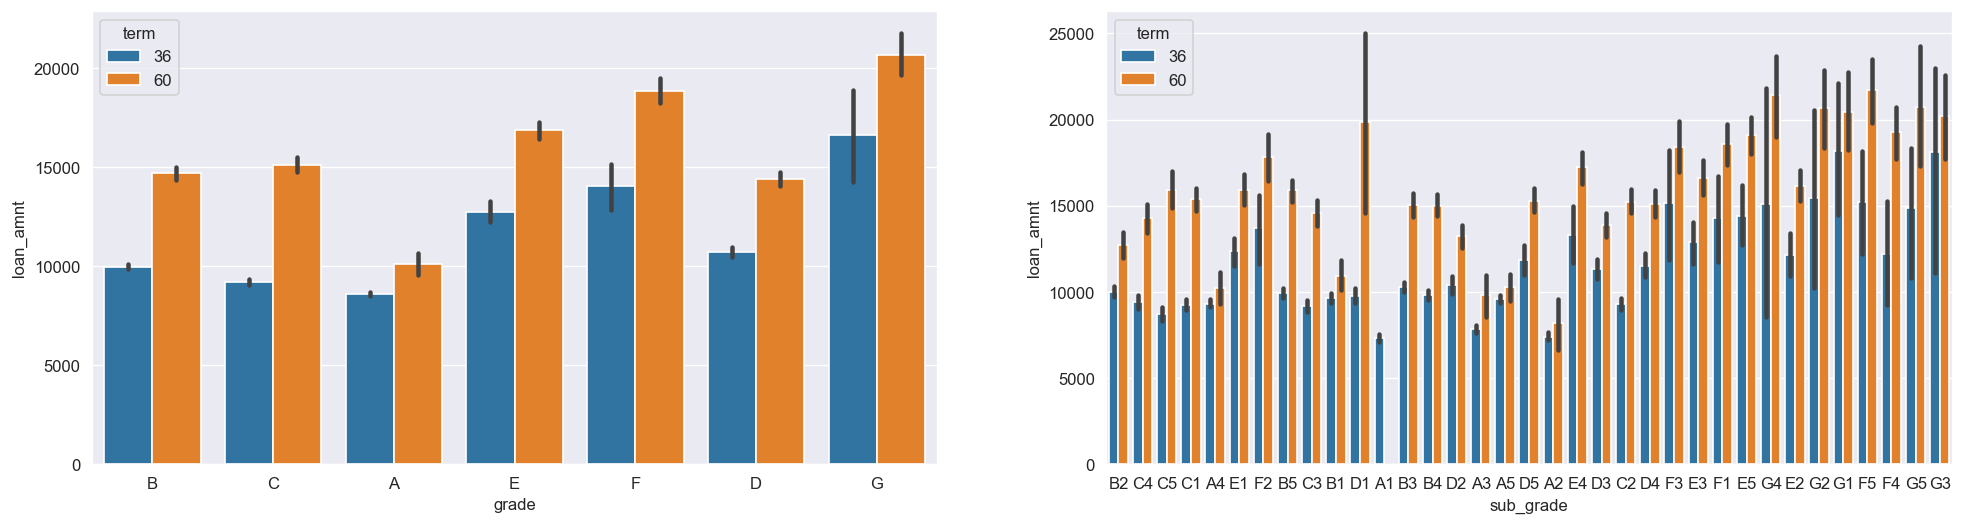

In [278]:
plt.figure(figsize=[20,5], dpi=120)
plt.subplot(1,2,1)
sns.barplot(x='grade', y='loan_amnt', hue="term", data=master, estimator=np.mean)
plt.subplot(1,2,2)
sns.barplot(x='sub_grade', y='loan_amnt', hue="term", data=master, estimator=np.mean)

1. We can clearly see that higher amount of loans are granter for worst grade for longer period of time

### Loan amount vs loan status vs term 

<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

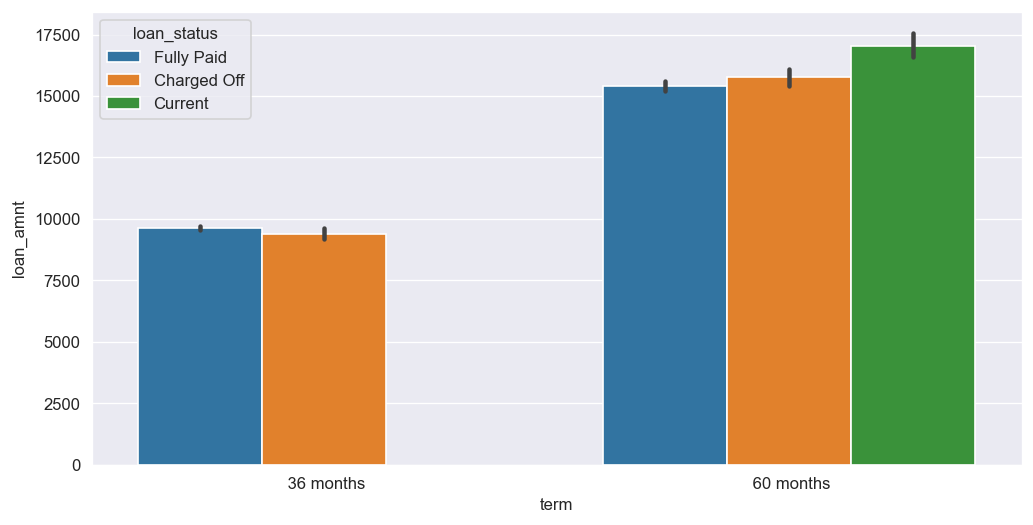

In [282]:
ax = plt.figure(figsize=[10,5], dpi=120)
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=data, estimator=np.mean)

1. we cam see that higher amount of loans are issued for longer period of time and see Fully paid rate and higher charged off rates

### Loan amount vs addr_state vs loan status 

<AxesSubplot:xlabel='addr_state', ylabel='loan_amnt'>

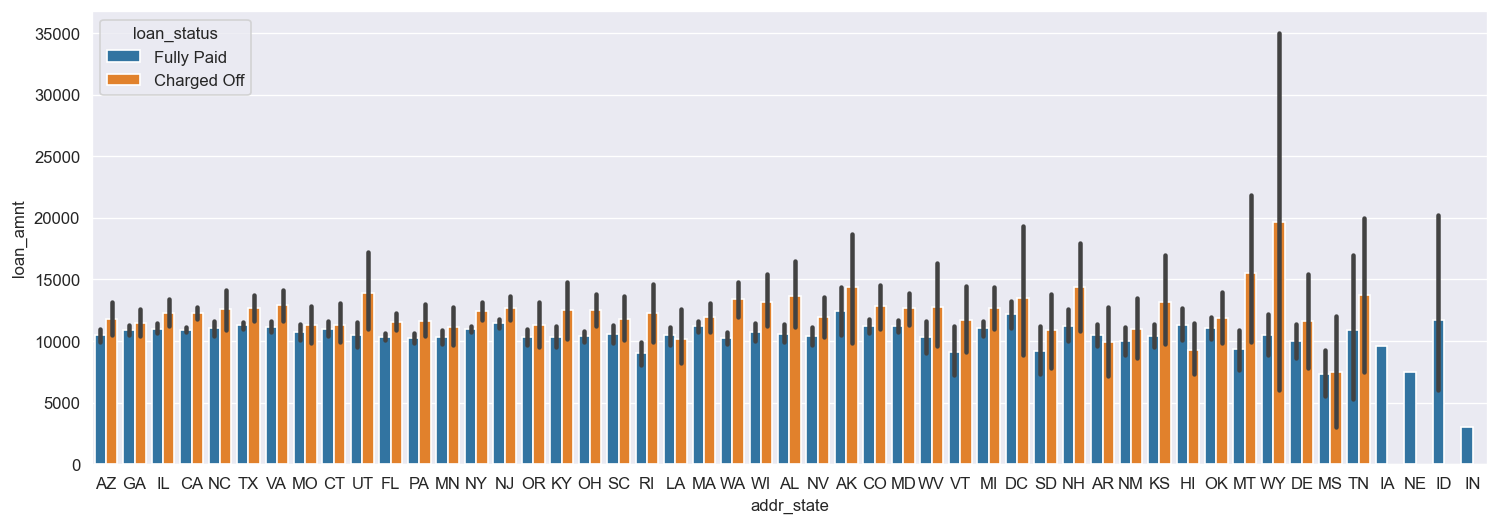

In [284]:
ax = plt.figure(figsize=[15,5], dpi=120)
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=master, estimator=np.mean)

1. WY has the highest charged off loan amount IN has lowest but the count there is also very low

### revol_util vs grade vs loan status 

<AxesSubplot:xlabel='grade', ylabel='revol_util'>

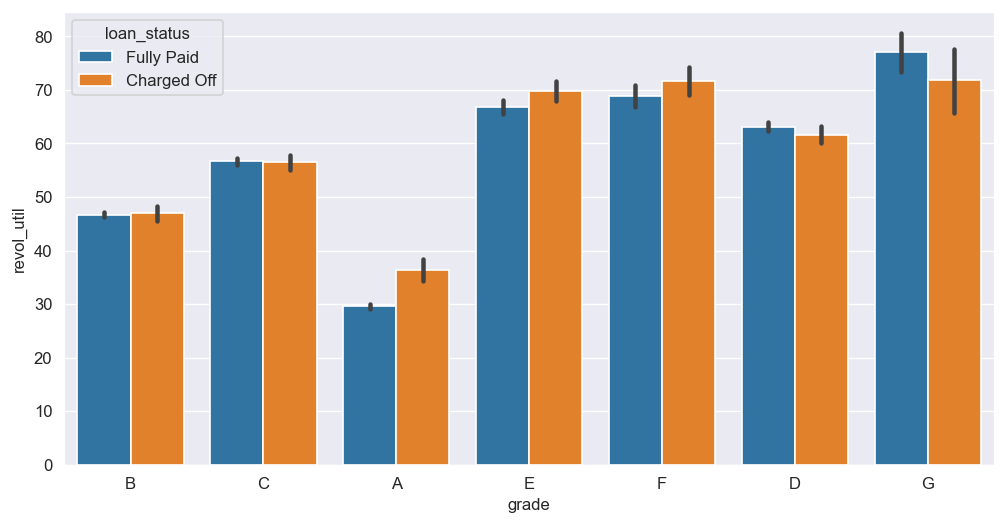

In [285]:
ax = plt.figure(figsize=[10,5], dpi=120)
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=master, estimator=np.mean)

1. revol_util and grade(and therefore int_rate) are correlated in some way. The revol_util is positivly correlated to the grade. As the grade goes from A to E the revol_util also increases. This may be because higer loan amounts are accosiated with higher grades.

<AxesSubplot:>

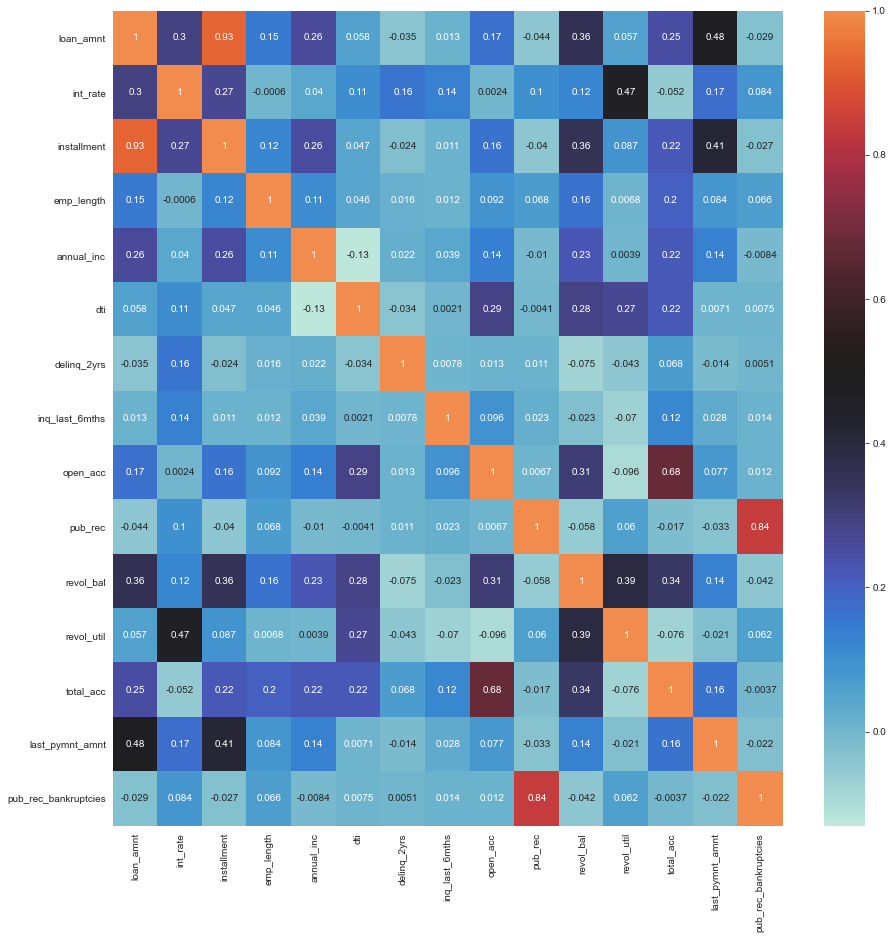

In [304]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = master[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)